In [1]:
import torch.nn as nn
import torch

import sys, os
import random
import numpy as np
from shutil import copy
import matplotlib.pyplot as plt
from copy import deepcopy

from omegaconf import OmegaConf
import shutil
import pickle
import random
from tqdm import tqdm

In [2]:
# run_path = '/home/harishbabu/projects/PIPNet/runs/010-CUB-27-imgnet_OOD_cnext26_img=224_nprotos=20'
# run_path = '/home/harishbabu/projects/PIPNet/runs/031-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = '/home/harishbabu/projects/PIPNet/runs/032-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/035-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/043-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = "/home/harishbabu/projects/PIPNet/runs/036-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel_uniformity"
# run_path = "/home/harishbabu/projects/PIPNet/runs/041-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/042-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/044-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20-or-4per-desc_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/046-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=10per-desc_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/047-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc"
# run_path = "/home/harishbabu/projects/PIPNet/runs/048-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc_unit-sphere"
# run_path = "/home/harishbabu/projects/PIPNet/runs/051-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/052-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/055-CUB-18_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/056-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/057-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/058-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"

# with unit sphere
# run_path = "/home/harishbabu/projects/PIPNet/runs/059-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# unit sphere with softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/065-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# original hpipnet with 20 protos per node no KO, no OOD, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/062-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD"

# original hpipnet with 20 protos per node no KO, no OOD, WITH tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/063-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD_tanh-desc"

# with unit sphere but no AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/066-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_no-align_no-uni_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc, INCORRECT
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-incorrect-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, no softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/068-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# 071 with bias
# run_path = "/home/harishbabu/projects/PIPNet/runs/071-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_with-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 072 gumbel softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/072-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 073 gumbel softmax, tau-1.0
# run_path = "/home/harishbabu/projects/PIPNet/runs/073-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax-tau=1_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 075 068 with focal loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/075-068-with-focal_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 076 cs followed by softmax. Uses align_pf along with align+uni
# run_path = "/home/harishbabu/projects/PIPNet/runs/076_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2-APW=5_batch=20"

# 074 multiply_cs_softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/074-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_multi-cs-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 077 unit sphere protopool with cosin no softmax constant 20 protos per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/077_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 082 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/082-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 083 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/083-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-align_no-uni_no-mm-loss_batch=48"

# 085 unit sphere cs followed by softmax-with-tau with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/085-notebook-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=12"

# 091 basic gaussian multiplier on stage 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/091-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 092 basic gaussian multiplier on stage 3, 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/092-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=3,4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 093 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/093-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 094 128 dim linear
run_path = "/home/harishbabu/projects/PIPNet/runs/094-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

try:
    sys.path.remove('/home/harishbabu/projects/PIPNet')
except:
    pass
sys.path.insert(0, os.path.join(run_path, 'source_clone'))


In [3]:
from pipnet.pipnet import PIPNet, get_network
from util.log import Log
from util.args import get_args, save_args, get_optimizer_nn
from util.data import get_dataloaders
from util.func import init_weights_xavier
from pipnet.train import train_pipnet, test_pipnet
# from pipnet.test import eval_pipnet, get_thresholds, eval_ood
from util.eval_cub_csv import eval_prototypes_cub_parts_csv, get_topk_cub, get_proto_patches_cub
from util.vis_pipnet import visualize, visualize_topk
from util.visualize_prediction import vis_pred, vis_pred_experiments
from util.node import Node
from util.phylo_utils import construct_phylo_tree, construct_discretized_phylo_tree
from util.func import get_patch_size
from util.data import ModifiedLabelLoader

Heatmaps showing where a prototype is found will not be generated because OpenCV is not installed.


In [4]:
from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

## Load Model

In [5]:
args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
args = pickle.load(args_file)

if args.phylo_config:
    phylo_config = OmegaConf.load(args.phylo_config)

if args.phylo_config:
    # construct the phylo tree
    if phylo_config.phyloDistances_string == 'None':
        if '031' in run_path: # this run uses a different phylogeny file that had an extra root node which is a mistake
            root = construct_phylo_tree('/home/harishbabu/data/phlyogenyCUB/18Species-with-extra-root-node/1_tree-consensus-Hacket-18Species-modified_cub-names_v1.phy')
        else:
            root = construct_phylo_tree(phylo_config.phylogeny_path)
        print('-'*25 + ' No discretization ' + '-'*25)
    else:
        root = construct_discretized_phylo_tree(phylo_config.phylogeny_path, phylo_config.phyloDistances_string)
        print('-'*25 + ' Discretized ' + '-'*25)
else:
    # construct the tree (original hierarchy as described in the paper)
    root = Node("root")
    root.add_children(['animal','vehicle','everyday_object','weapon','scuba_diver'])
    root.add_children_to('animal',['non_primate','primate'])
    root.add_children_to('non_primate',['African_elephant','giant_panda','lion'])
    root.add_children_to('primate',['capuchin','gibbon','orangutan'])
    root.add_children_to('vehicle',['ambulance','pickup','sports_car'])
    root.add_children_to('everyday_object',['laptop','sandal','wine_bottle'])
    root.add_children_to('weapon',['assault_rifle','rifle'])
    # flat root
    # root.add_children(['scuba_diver','African_elephant','giant_panda','lion','capuchin','gibbon','orangutan','ambulance','pickup','sports_car','laptop','sandal','wine_bottle','assault_rifle','rifle'])
root.assign_all_descendents()

exp_no = int(os.path.basename(run_path)[:3])

if exp_no < 77:
    if ('num_protos_per_descendant' in args) and (args.num_protos_per_descendant > 0):
        for node in root.nodes_with_children():
            node.set_num_protos(args.num_protos_per_descendant)
else:
    # update num of protos per node based on num_protos_per_descendant
    if args.num_features == 0 and args.num_protos_per_descendant == 0:
        raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
    for node in root.nodes_with_children():
        node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                            min_protos=args.num_features,\
                            split_protos=('protopool' in args) and (args.protopool == 'n'))

------------------------- No discretization -------------------------


In [6]:
args.batch_size = 1

print(args.batch_size)

1


In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    device_ids = [torch.cuda.current_device()]
else:
    device = torch.device('cpu')
    device_ids = []

# args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
# args = pickle.load(args_file)

# ckpt_file_name = 'net_overspecific_pruned_replaced_thresh=0.5_last'
ckpt_file_name = 'net_trained_last'
# ckpt_file_name = 'net_trained_10'
# ckpt_file_name = 'net_pretrained'
epoch = ckpt_file_name.split('_')[-1]

ckpt_path = os.path.join(run_path, 'checkpoints', ckpt_file_name)
checkpoint = torch.load(ckpt_path, map_location=device)

if ckpt_file_name != 'net_trained_last':
    print('\n', (10*'-')+'WARNING: Not using the final trained model'+(10*'-'), '\n')

# Obtain the dataset and dataloaders
trainloader, trainloader_pretraining, trainloader_normal, trainloader_normal_augment, projectloader, testloader, test_projectloader, classes = get_dataloaders(args, device)

print(args.batch_size, trainloader.batch_size)

if len(classes)<=20:
    if args.validation_size == 0.:
        print("Classes: ", testloader.dataset.class_to_idx, flush=True)
    else:
        print("Classes: ", str(classes), flush=True)

# Create a convolutional network based on arguments and add 1x1 conv layer
feature_net, add_on_layers, pool_layer, classification_layers, num_prototypes = get_network(len(classes), args, root=root)
   
# Create a PIP-Net
net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )
net = net.to(device=device)
net = nn.DataParallel(net, device_ids = device_ids)    
net.load_state_dict(checkpoint['model_state_dict'],strict=True)
print(net.eval())
criterion = nn.NLLLoss(reduction='mean').to(device)

# Forward one batch through the backbone to get the latent output size
# with torch.no_grad():
#     xs1, _, _ = next(iter(trainloader))
#     xs1 = xs1.to(device)
#     proto_features, _, _ = net(xs1)
#     wshape = proto_features['root'].shape[-1]
#     args.wshape = wshape #needed for calculating image patch size
#     print("Output shape: ", proto_features['root'].shape, flush=True)
    
args.wshape = 26

Dropping 0 samples from trainloader
Dropping 0 samples from trainloader_normal
Dropping 0 samples from trainloader_normal_augment
Num classes (k) =  18 ['cub_001_Black_footed_Albatross', 'cub_002_Laysan_Albatross', 'cub_003_Sooty_Albatross', 'cub_004_Groove_billed_Ani', 'cub_023_Brandt_Cormorant'] etc.
1 1
Classes:  {'cub_001_Black_footed_Albatross': 0, 'cub_002_Laysan_Albatross': 1, 'cub_003_Sooty_Albatross': 2, 'cub_004_Groove_billed_Ani': 3, 'cub_023_Brandt_Cormorant': 4, 'cub_024_Red_faced_Cormorant': 5, 'cub_025_Pelagic_Cormorant': 6, 'cub_031_Black_billed_Cuckoo': 7, 'cub_032_Mangrove_Cuckoo': 8, 'cub_033_Yellow_billed_Cuckoo': 9, 'cub_045_Northern_Fulmar': 10, 'cub_050_Eared_Grebe': 11, 'cub_051_Horned_Grebe': 12, 'cub_052_Pied_billed_Grebe': 13, 'cub_053_Western_Grebe': 14, 'cub_086_Pacific_Loon': 15, 'cub_100_Brown_Pelican': 16, 'cub_101_White_Pelican': 17}
stage 4
Added reducer stage4_reducer_0_conv 768 to 384
Added reducer stage4_reducer_0_gelu
Added reducer stage4_reducer_1

In [8]:
args.basic_cnext_gaussian_multiplier

'4|1.0|50'

# Proto activations on Grand children

In [20]:
# Proto activations on Grand children

from util.data import ModifiedLabelLoader
from collections import defaultdict
import pdb

for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> (mean_activation, num_images)
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: [0, 0]))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            pfs, pooled, _ = net(xs, inference=True)
            pooled = pooled[node.name].squeeze(0) 
            pfs = pfs[node.name].squeeze(0)

            

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    grand_child = child_node.closest_descendent_for(label2name[orig_y.item()])
                    proto_mean_activations[p][grand_child.name][0] = ((proto_mean_activations[p][grand_child.name][0] * \
                                                                      proto_mean_activations[p][grand_child.name][1]) + pooled[p]) / (proto_mean_activations[p][grand_child.name][1] + 1)
                    proto_mean_activations[p][grand_child.name][1] += 1

                if (len(relevant_proto_class_names) > 1) and (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    if child_node.is_leaf():
                        proto_mean_activations[p][child_node.name][0] = ((proto_mean_activations[p][child_node.name][0] * \
                                                                            proto_mean_activations[p][child_node.name][1]) + pooled[p]) / (proto_mean_activations[p][child_node.name][1] + 1)
                        proto_mean_activations[p][child_node.name][1] += 1
                    else:
                        grand_child = child_node.closest_descendent_for(label2name[orig_y.item()])
                        proto_mean_activations[p][grand_child.name][0] = ((proto_mean_activations[p][grand_child.name][0] * \
                                                                            proto_mean_activations[p][grand_child.name][1]) + pooled[p]) / (proto_mean_activations[p][grand_child.name][1] + 1)
                        proto_mean_activations[p][grand_child.name][1] += 1
                

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

            # class_and_prototypes = defaultdict(list)
            # for p in range(pooled.shape[0]):
            #     class_and_prototypes[', '.join(list(proto_mean_activations[p].keys()))].append(p)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            logstr = '\t'*2 + f'Proto:{p} '
            for grand_child_name in proto_mean_activations[p]:
                mean_activation = round(proto_mean_activations[p][grand_child_name][0].item(), 2)
                num_images = proto_mean_activations[p][grand_child_name][1]
                logstr += f'{grand_child_name}:{mean_activation}/{num_images} '
            print(logstr)


052+004
	 052+053
		Proto:0 053+051:0.42/90 cub_052_Pied_billed_Grebe:0.0/30 
		Proto:36 053+051:0.08/90 cub_052_Pied_billed_Grebe:0.29/30 
		Proto:5 053+051:0.17/90 cub_052_Pied_billed_Grebe:0.16/30 
		Proto:43 053+051:0.32/90 cub_052_Pied_billed_Grebe:0.37/30 
		Proto:13 053+051:0.38/90 cub_052_Pied_billed_Grebe:0.49/30 
		Proto:46 053+051:0.47/90 cub_052_Pied_billed_Grebe:0.01/30 
		Proto:16 053+051:0.46/90 cub_052_Pied_billed_Grebe:0.0/30 
		Proto:17 053+051:0.34/90 cub_052_Pied_billed_Grebe:0.03/30 
		Proto:23 053+051:0.03/90 cub_052_Pied_billed_Grebe:0.46/30 
		Proto:31 053+051:0.2/90 cub_052_Pied_billed_Grebe:0.06/30 
	 004+086
		Proto:2 086+045:0.18/300 004+032:0.12/120 
		Proto:3 086+045:0.19/300 004+032:0.16/120 
		Proto:4 086+045:0.32/300 004+032:0.18/120 
		Proto:7 086+045:0.19/300 004+032:0.35/120 
		Proto:8 086+045:0.12/300 004+032:0.24/120 
		Proto:10 086+045:0.0/300 004+032:0.51/120 
		Proto:11 086+045:0.27/300 004+032:0.06/120 
		Proto:12 086+045:0.03/300 004+032:0.35/

052+053
	 053+051
		Proto:2 051+050:0.49/60 cub_053_Western_Grebe:0.06/30 
		Proto:4 051+050:0.26/60 cub_053_Western_Grebe:0.39/30 
		Proto:5 051+050:0.11/60 cub_053_Western_Grebe:0.1/30 
		Proto:6 051+050:0.38/60 cub_053_Western_Grebe:0.72/30 
		Proto:7 051+050:0.17/60 cub_053_Western_Grebe:0.63/30 
		Proto:9 051+050:0.42/60 cub_053_Western_Grebe:0.83/30 
		Proto:10 051+050:0.14/60 cub_053_Western_Grebe:0.74/30 
		Proto:11 051+050:0.69/60 cub_053_Western_Grebe:0.67/30 
		Proto:15 051+050:0.4/60 cub_053_Western_Grebe:0.9/30 
		Proto:16 051+050:0.52/60 cub_053_Western_Grebe:0.43/30 
		Proto:17 051+050:0.74/60 cub_053_Western_Grebe:0.46/30 
		Proto:18 051+050:0.47/60 cub_053_Western_Grebe:0.24/30 
		Proto:20 051+050:0.18/60 cub_053_Western_Grebe:0.62/30 
		Proto:21 051+050:0.19/60 cub_053_Western_Grebe:0.26/30 
		Proto:22 051+050:0.35/60 cub_053_Western_Grebe:0.07/30 
		Proto:23 051+050:0.31/60 cub_053_Western_Grebe:0.01/30 
		Proto:24 051+050:0.41/60 cub_053_Western_Grebe:0.58/30 
		Pro

004+086
	 086+045
		Proto:1 045+100:0.18/270 cub_086_Pacific_Loon:0.48/30 
		Proto:4 045+100:0.4/270 cub_086_Pacific_Loon:0.33/30 
		Proto:5 045+100:0.13/270 cub_086_Pacific_Loon:0.0/30 
		Proto:10 045+100:0.46/270 cub_086_Pacific_Loon:0.53/30 
		Proto:11 045+100:0.31/270 cub_086_Pacific_Loon:0.01/30 
		Proto:13 045+100:0.31/270 cub_086_Pacific_Loon:0.0/30 
		Proto:14 045+100:0.16/270 cub_086_Pacific_Loon:0.27/30 
		Proto:17 045+100:0.45/270 cub_086_Pacific_Loon:0.08/30 
		Proto:19 045+100:0.24/270 cub_086_Pacific_Loon:0.0/30 
		Proto:21 045+100:0.12/270 cub_086_Pacific_Loon:0.25/30 
		Proto:28 045+100:0.23/270 cub_086_Pacific_Loon:0.35/30 
		Proto:29 045+100:0.15/270 cub_086_Pacific_Loon:0.28/30 
		Proto:32 045+100:0.32/270 cub_086_Pacific_Loon:0.6/30 
		Proto:38 045+100:0.21/270 cub_086_Pacific_Loon:0.01/30 
		Proto:39 045+100:0.29/270 cub_086_Pacific_Loon:0.03/30 
		Proto:40 045+100:0.16/270 cub_086_Pacific_Loon:0.2/30 
		Proto:41 045+100:0.15/270 cub_086_Pacific_Loon:0.28/30 
		Pro

053+051
	 051+050
		Proto:3 cub_050_Eared_Grebe:0.21/30 cub_051_Horned_Grebe:0.4/30 
		Proto:5 cub_050_Eared_Grebe:0.05/30 cub_051_Horned_Grebe:0.2/30 
		Proto:8 cub_050_Eared_Grebe:0.11/30 cub_051_Horned_Grebe:0.23/30 
		Proto:9 cub_050_Eared_Grebe:0.57/30 cub_051_Horned_Grebe:0.6/30 
		Proto:10 cub_050_Eared_Grebe:0.46/30 cub_051_Horned_Grebe:0.62/30 
		Proto:11 cub_050_Eared_Grebe:0.41/30 cub_051_Horned_Grebe:0.5/30 
		Proto:12 cub_050_Eared_Grebe:0.74/30 cub_051_Horned_Grebe:0.73/30 
		Proto:13 cub_050_Eared_Grebe:0.58/30 cub_051_Horned_Grebe:0.58/30 
		Proto:16 cub_050_Eared_Grebe:0.55/30 cub_051_Horned_Grebe:0.39/30 
		Proto:17 cub_050_Eared_Grebe:0.5/30 cub_051_Horned_Grebe:0.63/30 
		Proto:18 cub_050_Eared_Grebe:0.22/30 cub_051_Horned_Grebe:0.45/30 
		Proto:20 cub_050_Eared_Grebe:0.16/30 cub_051_Horned_Grebe:0.3/30 
		Proto:25 cub_050_Eared_Grebe:0.27/30 cub_051_Horned_Grebe:0.47/30 
		Proto:32 cub_050_Eared_Grebe:0.33/30 cub_051_Horned_Grebe:0.34/30 
		Proto:36 cub_050_Eared_G

004+032
	 032+031
		Proto:0 031+033:0.2/60 cub_032_Mangrove_Cuckoo:0.69/30 
		Proto:1 031+033:0.62/60 cub_032_Mangrove_Cuckoo:0.51/30 
		Proto:4 031+033:0.5/60 cub_032_Mangrove_Cuckoo:0.13/30 
		Proto:5 031+033:0.56/60 cub_032_Mangrove_Cuckoo:0.57/30 
		Proto:6 031+033:0.52/60 cub_032_Mangrove_Cuckoo:0.39/30 
		Proto:7 031+033:0.31/60 cub_032_Mangrove_Cuckoo:0.35/30 
		Proto:9 031+033:0.6/60 cub_032_Mangrove_Cuckoo:0.4/30 
		Proto:12 031+033:0.64/60 cub_032_Mangrove_Cuckoo:0.61/30 
		Proto:16 031+033:0.35/60 cub_032_Mangrove_Cuckoo:0.72/30 
		Proto:17 031+033:0.32/60 cub_032_Mangrove_Cuckoo:0.23/30 
		Proto:18 031+033:0.58/60 cub_032_Mangrove_Cuckoo:0.14/30 
		Proto:19 031+033:0.36/60 cub_032_Mangrove_Cuckoo:0.41/30 
		Proto:20 031+033:0.48/60 cub_032_Mangrove_Cuckoo:0.37/30 
		Proto:22 031+033:0.54/60 cub_032_Mangrove_Cuckoo:0.22/30 
		Proto:27 031+033:0.42/60 cub_032_Mangrove_Cuckoo:0.44/30 
		Proto:30 031+033:0.07/60 cub_032_Mangrove_Cuckoo:0.14/30 
		Proto:31 031+033:0.31/60 cub_03

086+045
	 045+100
		Proto:2 045+003:0.02/120 100+023:0.37/150 
		Proto:3 045+003:0.07/120 100+023:0.27/150 
		Proto:5 045+003:0.24/120 100+023:0.12/150 
		Proto:6 045+003:0.14/120 100+023:0.25/150 
		Proto:7 045+003:0.05/120 100+023:0.16/150 
		Proto:9 045+003:0.15/120 100+023:0.14/150 
		Proto:10 045+003:0.14/120 100+023:0.18/150 
		Proto:11 045+003:0.22/120 100+023:0.13/150 
		Proto:12 045+003:0.1/120 100+023:0.24/150 
		Proto:14 045+003:0.22/120 100+023:0.1/150 
		Proto:17 045+003:0.15/120 100+023:0.09/150 
		Proto:18 045+003:0.22/120 100+023:0.17/150 
		Proto:19 045+003:0.19/120 100+023:0.22/150 
		Proto:20 045+003:0.47/120 100+023:0.01/150 
		Proto:21 045+003:0.47/120 100+023:0.02/150 
		Proto:23 045+003:0.05/120 100+023:0.14/150 
		Proto:24 045+003:0.23/120 100+023:0.15/150 
		Proto:25 045+003:0.1/120 100+023:0.16/150 
		Proto:26 045+003:0.05/120 100+023:0.26/150 
		Proto:27 045+003:0.16/120 100+023:0.14/150 
		Proto:29 045+003:0.14/120 100+023:0.34/150 
		Proto:30 045+003:0.07/1

032+031
	 031+033
		Proto:1 cub_031_Black_billed_Cuckoo:0.28/30 cub_033_Yellow_billed_Cuckoo:0.44/30 
		Proto:33 cub_031_Black_billed_Cuckoo:0.39/30 cub_033_Yellow_billed_Cuckoo:0.7/30 
		Proto:35 cub_031_Black_billed_Cuckoo:0.67/30 cub_033_Yellow_billed_Cuckoo:0.51/30 
		Proto:4 cub_031_Black_billed_Cuckoo:0.85/30 cub_033_Yellow_billed_Cuckoo:0.3/30 
		Proto:36 cub_031_Black_billed_Cuckoo:0.67/30 cub_033_Yellow_billed_Cuckoo:0.48/30 
		Proto:37 cub_031_Black_billed_Cuckoo:0.39/30 cub_033_Yellow_billed_Cuckoo:0.35/30 
		Proto:43 cub_031_Black_billed_Cuckoo:0.64/30 cub_033_Yellow_billed_Cuckoo:0.39/30 
		Proto:13 cub_031_Black_billed_Cuckoo:0.55/30 cub_033_Yellow_billed_Cuckoo:0.44/30 
		Proto:14 cub_031_Black_billed_Cuckoo:0.8/30 cub_033_Yellow_billed_Cuckoo:0.54/30 
		Proto:15 cub_031_Black_billed_Cuckoo:0.59/30 cub_033_Yellow_billed_Cuckoo:0.46/30 
		Proto:46 cub_031_Black_billed_Cuckoo:0.61/30 cub_033_Yellow_billed_Cuckoo:0.43/30 
		Proto:47 cub_031_Black_billed_Cuckoo:0.36/30 cub_0

045+100
	 100+023
		Proto:32 023+024:0.1/90 100+101:0.6/60 
		Proto:2 023+024:0.56/90 100+101:0.03/60 
		Proto:35 023+024:0.03/90 100+101:0.81/60 
		Proto:6 023+024:0.22/90 100+101:0.4/60 
		Proto:7 023+024:0.68/90 100+101:0.01/60 
		Proto:8 023+024:0.36/90 100+101:0.01/60 
		Proto:40 023+024:0.49/90 100+101:0.21/60 
		Proto:41 023+024:0.21/90 100+101:0.3/60 
		Proto:11 023+024:0.29/90 100+101:0.14/60 
		Proto:44 023+024:0.49/90 100+101:0.0/60 
		Proto:14 023+024:0.25/90 100+101:0.05/60 
		Proto:46 023+024:0.3/90 100+101:0.18/60 
		Proto:19 023+024:0.26/90 100+101:0.19/60 
		Proto:22 023+024:0.4/90 100+101:0.57/60 
		Proto:25 023+024:0.42/90 100+101:0.03/60 
		Proto:27 023+024:0.38/90 100+101:0.68/60 
	 045+003
		Proto:33 003+001:0.25/90 cub_045_Northern_Fulmar:0.46/30 
		Proto:34 003+001:0.13/90 cub_045_Northern_Fulmar:0.27/30 
		Proto:3 003+001:0.23/90 cub_045_Northern_Fulmar:0.47/30 
		Proto:36 003+001:0.5/90 cub_045_Northern_Fulmar:0.53/30 
		Proto:5 003+001:0.39/90 cub_045_Norther

045+003
	 003+001
		Proto:0 001+002:0.57/60 cub_003_Sooty_Albatross:0.4/30 
		Proto:1 001+002:0.7/60 cub_003_Sooty_Albatross:0.24/30 
		Proto:6 001+002:0.25/60 cub_003_Sooty_Albatross:0.73/30 
		Proto:8 001+002:0.31/60 cub_003_Sooty_Albatross:0.46/30 
		Proto:10 001+002:0.62/60 cub_003_Sooty_Albatross:0.38/30 
		Proto:13 001+002:0.37/60 cub_003_Sooty_Albatross:0.51/30 
		Proto:14 001+002:0.34/60 cub_003_Sooty_Albatross:0.49/30 
		Proto:17 001+002:0.58/60 cub_003_Sooty_Albatross:0.35/30 
		Proto:21 001+002:0.32/60 cub_003_Sooty_Albatross:0.67/30 
		Proto:24 001+002:0.31/60 cub_003_Sooty_Albatross:0.51/30 
		Proto:27 001+002:0.52/60 cub_003_Sooty_Albatross:0.34/30 
		Proto:28 001+002:0.65/60 cub_003_Sooty_Albatross:0.3/30 
		Proto:29 001+002:0.4/60 cub_003_Sooty_Albatross:0.17/30 
		Proto:30 001+002:0.71/60 cub_003_Sooty_Albatross:0.41/30 
		Proto:31 001+002:0.49/60 cub_003_Sooty_Albatross:0.28/30 
		Proto:37 001+002:0.43/60 cub_003_Sooty_Albatross:0.32/30 
		Proto:40 001+002:0.48/60 cub

100+023
	 023+024
		Proto:0 cub_023_Brandt_Cormorant:0.11/30 024+025:0.62/60 
		Proto:2 cub_023_Brandt_Cormorant:0.56/30 024+025:0.55/60 
		Proto:3 cub_023_Brandt_Cormorant:0.51/30 024+025:0.62/60 
		Proto:4 cub_023_Brandt_Cormorant:0.5/30 024+025:0.58/60 
		Proto:35 cub_023_Brandt_Cormorant:0.27/30 024+025:0.66/60 
		Proto:7 cub_023_Brandt_Cormorant:0.56/30 024+025:0.71/60 
		Proto:41 cub_023_Brandt_Cormorant:0.47/30 024+025:0.57/60 
		Proto:42 cub_023_Brandt_Cormorant:0.13/30 024+025:0.54/60 
		Proto:43 cub_023_Brandt_Cormorant:0.47/30 024+025:0.52/60 
		Proto:12 cub_023_Brandt_Cormorant:0.32/30 024+025:0.32/60 
		Proto:46 cub_023_Brandt_Cormorant:0.39/30 024+025:0.54/60 
		Proto:16 cub_023_Brandt_Cormorant:0.51/30 024+025:0.53/60 
		Proto:48 cub_023_Brandt_Cormorant:0.4/30 024+025:0.46/60 
		Proto:18 cub_023_Brandt_Cormorant:0.27/30 024+025:0.31/60 
		Proto:20 cub_023_Brandt_Cormorant:0.56/30 024+025:0.49/60 
		Proto:24 cub_023_Brandt_Cormorant:0.67/30 024+025:0.4/60 
		Proto:28 cub

003+001
	 001+002
		Proto:0 cub_001_Black_footed_Albatross:0.71/30 cub_002_Laysan_Albatross:0.68/30 
		Proto:33 cub_001_Black_footed_Albatross:0.55/30 cub_002_Laysan_Albatross:0.42/30 
		Proto:3 cub_001_Black_footed_Albatross:0.46/30 cub_002_Laysan_Albatross:0.54/30 
		Proto:36 cub_001_Black_footed_Albatross:0.66/30 cub_002_Laysan_Albatross:0.43/30 
		Proto:6 cub_001_Black_footed_Albatross:0.47/30 cub_002_Laysan_Albatross:0.52/30 
		Proto:7 cub_001_Black_footed_Albatross:0.46/30 cub_002_Laysan_Albatross:0.63/30 
		Proto:40 cub_001_Black_footed_Albatross:0.37/30 cub_002_Laysan_Albatross:0.63/30 
		Proto:9 cub_001_Black_footed_Albatross:0.57/30 cub_002_Laysan_Albatross:0.65/30 
		Proto:42 cub_001_Black_footed_Albatross:0.68/30 cub_002_Laysan_Albatross:0.46/30 
		Proto:12 cub_001_Black_footed_Albatross:0.76/30 cub_002_Laysan_Albatross:0.78/30 
		Proto:17 cub_001_Black_footed_Albatross:0.8/30 cub_002_Laysan_Albatross:0.57/30 
		Proto:24 cub_001_Black_footed_Albatross:0.64/30 cub_002_Laysan

023+024
	 024+025
		Proto:33 cub_024_Red_faced_Cormorant:0.64/30 cub_025_Pelagic_Cormorant:0.31/30 
		Proto:35 cub_024_Red_faced_Cormorant:0.32/30 cub_025_Pelagic_Cormorant:0.48/30 
		Proto:37 cub_024_Red_faced_Cormorant:0.67/30 cub_025_Pelagic_Cormorant:0.52/30 
		Proto:38 cub_024_Red_faced_Cormorant:0.69/30 cub_025_Pelagic_Cormorant:0.41/30 
		Proto:7 cub_024_Red_faced_Cormorant:0.84/30 cub_025_Pelagic_Cormorant:0.32/30 
		Proto:9 cub_024_Red_faced_Cormorant:0.85/30 cub_025_Pelagic_Cormorant:0.15/30 
		Proto:10 cub_024_Red_faced_Cormorant:0.48/30 cub_025_Pelagic_Cormorant:0.44/30 
		Proto:12 cub_024_Red_faced_Cormorant:0.84/30 cub_025_Pelagic_Cormorant:0.5/30 
		Proto:13 cub_024_Red_faced_Cormorant:0.48/30 cub_025_Pelagic_Cormorant:0.26/30 
		Proto:14 cub_024_Red_faced_Cormorant:0.45/30 cub_025_Pelagic_Cormorant:0.55/30 
		Proto:47 cub_024_Red_faced_Cormorant:0.5/30 cub_025_Pelagic_Cormorant:0.32/30 
		Proto:18 cub_024_Red_faced_Cormorant:0.76/30 cub_025_Pelagic_Cormorant:0.26/30 
		

# Proto activations on leaf descendents - all image-activations

In [24]:
# Proto activations on leaf descendents - all image-activations

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb


for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> (mean_activation, num_images)
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: [0, 0]))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            pfs, pooled, _ = net(xs, inference=True)
            pooled = pooled[node.name].squeeze(0) 
            pfs = pfs[node.name].squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    proto_mean_activations[p][leaf_descendent][0] = ((proto_mean_activations[p][leaf_descendent][0] * \
                                                                      proto_mean_activations[p][leaf_descendent][1]) + pooled[p]) / (proto_mean_activations[p][leaf_descendent][1] + 1)
                    proto_mean_activations[p][leaf_descendent][1] += 1                

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(proto_mean_activations[p][leaf_descendent][0].item(), 2)
#                 num_images = proto_mean_activations[p][leaf_descendent][1]
#                 logstr += f'{leaf_descendent}:{mean_activation}/{num_images} '
                num_images = proto_mean_activations[p][leaf_descendent][1]
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)


Node 052+004
	 Child: 052+053
		Proto:0 050:(0.23) 051:(0.57) 052:(0.0) 053:(0.45) 
		Proto:36 050:(0.16) 051:(0.15) 052:(0.31) 053:(0.0) 
		Proto:5 050:(0.12) 051:(0.4) 052:(0.14) 053:(0.0) 
		Proto:43 050:(0.2) 051:(0.52) 052:(0.35) 053:(0.18) 
		Proto:13 050:(0.36) 051:(0.46) 052:(0.54) 053:(0.3) 
		Proto:46 050:(0.43) 051:(0.46) 052:(0.02) 053:(0.49) 
		Proto:16 050:(0.17) 051:(0.52) 052:(0.0) 053:(0.64) 
		Proto:17 050:(0.12) 051:(0.44) 052:(0.03) 053:(0.48) 
		Proto:23 050:(0.01) 051:(0.04) 052:(0.42) 053:(0.06) 
		Proto:31 050:(0.16) 051:(0.38) 052:(0.06) 053:(0.0) 
	 Child: 004+086
		Proto:2 001:(0.15) 002:(0.27) 003:(0.23) 004:(0.23) 023:(0.16) 024:(0.18) 025:(0.34) 031:(0.13) 032:(0.07) 033:(0.06) 045:(0.11) 086:(0.12) 100:(0.11) 101:(0.11) 
		Proto:3 001:(0.2) 002:(0.47) 003:(0.64) 004:(0.03) 023:(0.0) 024:(0.01) 025:(0.03) 031:(0.34) 032:(0.07) 033:(0.28) 045:(0.43) 086:(0.01) 100:(0.03) 101:(0.09) 
		Proto:4 001:(0.66) 002:(0.03) 003:(0.31) 004:(0.03) 023:(0.56) 024:(0.13)

Node 052+053
	 Child: 053+051
		Proto:2 050:(0.5) 051:(0.54) 053:(0.04) 
		Proto:4 050:(0.17) 051:(0.33) 053:(0.36) 
		Proto:5 050:(0.08) 051:(0.12) 053:(0.1) 
		Proto:6 050:(0.35) 051:(0.34) 053:(0.7) 
		Proto:7 050:(0.01) 051:(0.31) 053:(0.66) 
		Proto:9 050:(0.38) 051:(0.44) 053:(0.81) 
		Proto:10 050:(0.12) 051:(0.21) 053:(0.68) 
		Proto:11 050:(0.68) 051:(0.71) 053:(0.62) 
		Proto:15 050:(0.49) 051:(0.3) 053:(0.87) 
		Proto:16 050:(0.52) 051:(0.54) 053:(0.36) 
		Proto:17 050:(0.72) 051:(0.8) 053:(0.38) 
		Proto:18 050:(0.39) 051:(0.47) 053:(0.22) 
		Proto:20 050:(0.01) 051:(0.35) 053:(0.57) 
		Proto:21 050:(0.23) 051:(0.16) 053:(0.22) 
		Proto:22 050:(0.36) 051:(0.4) 053:(0.08) 
		Proto:23 050:(0.18) 051:(0.41) 053:(0.01) 
		Proto:24 050:(0.4) 051:(0.44) 053:(0.55) 
		Proto:26 050:(0.31) 051:(0.39) 053:(0.45) 
		Proto:27 050:(0.35) 051:(0.46) 053:(0.5) 
		Proto:34 050:(0.43) 051:(0.47) 053:(0.18) 
		Proto:36 050:(0.5) 051:(0.44) 053:(0.77) 
		Proto:38 050:(0.01) 051:(0.24) 053:(0.

Node 004+086
	 Child: 086+045
		Proto:1 001:(0.0) 002:(0.0) 003:(0.05) 023:(0.59) 024:(0.12) 025:(0.47) 045:(0.0) 086:(0.51) 100:(0.26) 101:(0.02) 
		Proto:4 001:(0.49) 002:(0.65) 003:(0.23) 023:(0.15) 024:(0.74) 025:(0.23) 045:(0.04) 086:(0.31) 100:(0.49) 101:(0.71) 
		Proto:5 001:(0.04) 002:(0.0) 003:(0.14) 023:(0.11) 024:(0.59) 025:(0.18) 045:(0.0) 086:(0.0) 100:(0.05) 101:(0.0) 
		Proto:10 001:(0.49) 002:(0.68) 003:(0.25) 023:(0.39) 024:(0.56) 025:(0.32) 045:(0.01) 086:(0.41) 100:(0.64) 101:(0.6) 
		Proto:11 001:(0.3) 002:(0.66) 003:(0.3) 023:(0.08) 024:(0.12) 025:(0.15) 045:(0.36) 086:(0.01) 100:(0.07) 101:(0.59) 
		Proto:13 001:(0.06) 002:(0.55) 003:(0.06) 023:(0.02) 024:(0.38) 025:(0.0) 045:(0.28) 086:(0.0) 100:(0.66) 101:(0.75) 
		Proto:14 001:(0.24) 002:(0.13) 003:(0.33) 023:(0.3) 024:(0.15) 025:(0.19) 045:(0.03) 086:(0.32) 100:(0.0) 101:(0.0) 
		Proto:17 001:(0.17) 002:(0.69) 003:(0.11) 023:(0.17) 024:(0.84) 025:(0.21) 045:(0.48) 086:(0.08) 100:(0.81) 101:(0.66) 
		Proto:19 0

Node 053+051
	 Child: 051+050
		Proto:3 050:(0.19) 051:(0.38) 
		Proto:5 050:(0.06) 051:(0.22) 
		Proto:8 050:(0.09) 051:(0.25) 
		Proto:9 050:(0.55) 051:(0.62) 
		Proto:10 050:(0.46) 051:(0.59) 
		Proto:11 050:(0.38) 051:(0.49) 
		Proto:12 050:(0.73) 051:(0.73) 
		Proto:13 050:(0.59) 051:(0.58) 
		Proto:16 050:(0.56) 051:(0.35) 
		Proto:17 050:(0.46) 051:(0.61) 
		Proto:18 050:(0.28) 051:(0.45) 
		Proto:20 050:(0.17) 051:(0.28) 
		Proto:25 050:(0.26) 051:(0.46) 
		Proto:32 050:(0.32) 051:(0.32) 
		Proto:36 050:(0.39) 051:(0.48) 
		Proto:38 050:(0.37) 051:(0.47) 
		Proto:42 050:(0.39) 051:(0.35) 
		Proto:43 050:(0.36) 051:(0.41) 
		Proto:45 050:(0.2) 051:(0.45) 
		Proto:47 050:(0.51) 051:(0.62) 
		Proto:48 050:(0.29) 051:(0.34) 
		Proto:49 050:(0.57) 051:(0.64) 


Node 004+032
	 Child: 032+031
		Proto:0 031:(0.28) 032:(0.65) 033:(0.22) 
		Proto:1 031:(0.77) 032:(0.49) 033:(0.52) 
		Proto:4 031:(0.48) 032:(0.13) 033:(0.54) 
		Proto:5 031:(0.36) 032:(0.49) 033:(0.75) 
		Proto:6 031:(0.52) 032:(0.38) 033:(0.5) 
		Proto:7 031:(0.0) 032:(0.36) 033:(0.67) 
		Proto:9 031:(0.61) 032:(0.4) 033:(0.62) 
		Proto:12 031:(0.34) 032:(0.59) 033:(0.82) 
		Proto:16 031:(0.21) 032:(0.72) 033:(0.54) 
		Proto:17 031:(0.38) 032:(0.23) 033:(0.24) 
		Proto:18 031:(0.69) 032:(0.16) 033:(0.52) 
		Proto:19 031:(0.43) 032:(0.4) 033:(0.3) 
		Proto:20 031:(0.44) 032:(0.36) 033:(0.46) 
		Proto:22 031:(0.65) 032:(0.23) 033:(0.46) 
		Proto:27 031:(0.39) 032:(0.41) 033:(0.4) 
		Proto:30 031:(0.13) 032:(0.12) 033:(0.09) 
		Proto:31 031:(0.2) 032:(0.34) 033:(0.4) 
		Proto:32 031:(0.73) 032:(0.39) 033:(0.63) 
		Proto:36 031:(0.46) 032:(0.08) 033:(0.35) 
		Proto:37 031:(0.12) 032:(0.27) 033:(0.63) 
		Proto:38 031:(0.42) 032:(0.51) 033:(0.46) 
		Proto:40 031:(0.88) 032:(0.43) 033:(0.

Node 086+045
	 Child: 045+100
		Proto:2 001:(0.02) 002:(0.03) 003:(0.02) 023:(0.71) 024:(0.73) 025:(0.37) 045:(0.0) 100:(0.02) 101:(0.02) 
		Proto:3 001:(0.12) 002:(0.08) 003:(0.08) 023:(0.11) 024:(0.84) 025:(0.27) 045:(0.04) 100:(0.01) 101:(0.05) 
		Proto:5 001:(0.17) 002:(0.24) 003:(0.09) 023:(0.04) 024:(0.22) 025:(0.21) 045:(0.43) 100:(0.02) 101:(0.12) 
		Proto:6 001:(0.18) 002:(0.32) 003:(0.1) 023:(0.0) 024:(0.01) 025:(0.01) 045:(0.04) 100:(0.87) 101:(0.4) 
		Proto:7 001:(0.04) 002:(0.02) 003:(0.03) 023:(0.1) 024:(0.28) 025:(0.3) 045:(0.09) 100:(0.12) 101:(0.06) 
		Proto:9 001:(0.22) 002:(0.26) 003:(0.17) 023:(0.11) 024:(0.06) 025:(0.09) 045:(0.02) 100:(0.25) 101:(0.28) 
		Proto:10 001:(0.22) 002:(0.16) 003:(0.18) 023:(0.09) 024:(0.33) 025:(0.42) 045:(0.04) 100:(0.01) 101:(0.03) 
		Proto:11 001:(0.02) 002:(0.4) 003:(0.0) 023:(0.02) 024:(0.22) 025:(0.0) 045:(0.42) 100:(0.01) 101:(0.48) 
		Proto:12 001:(0.06) 002:(0.21) 003:(0.12) 023:(0.0) 024:(0.08) 025:(0.03) 045:(0.02) 100:(0.55)

Node 032+031
	 Child: 031+033
		Proto:1 031:(0.33) 033:(0.48) 
		Proto:33 031:(0.47) 033:(0.71) 
		Proto:35 031:(0.67) 033:(0.54) 
		Proto:4 031:(0.85) 033:(0.32) 
		Proto:36 031:(0.75) 033:(0.53) 
		Proto:37 031:(0.37) 033:(0.37) 
		Proto:43 031:(0.69) 033:(0.4) 
		Proto:13 031:(0.61) 033:(0.43) 
		Proto:14 031:(0.85) 033:(0.57) 
		Proto:15 031:(0.63) 033:(0.42) 
		Proto:46 031:(0.62) 033:(0.48) 
		Proto:47 031:(0.39) 033:(0.25) 
		Proto:24 031:(0.79) 033:(0.31) 
		Proto:28 031:(0.74) 033:(0.64) 


Node 045+100
	 Child: 100+023
		Proto:32 023:(0.01) 024:(0.16) 025:(0.08) 100:(0.63) 101:(0.6) 
		Proto:2 023:(0.4) 024:(0.83) 025:(0.43) 100:(0.02) 101:(0.04) 
		Proto:35 023:(0.03) 024:(0.0) 025:(0.05) 100:(0.85) 101:(0.81) 
		Proto:6 023:(0.0) 024:(0.69) 025:(0.02) 100:(0.44) 101:(0.4) 
		Proto:7 023:(0.67) 024:(0.74) 025:(0.64) 100:(0.01) 101:(0.02) 
		Proto:8 023:(0.31) 024:(0.41) 025:(0.35) 100:(0.06) 101:(0.0) 
		Proto:40 023:(0.24) 024:(0.77) 025:(0.5) 100:(0.2) 101:(0.17) 
		Proto:41 023:(0.0) 024:(0.57) 025:(0.08) 100:(0.09) 101:(0.5) 
		Proto:11 023:(0.04) 024:(0.81) 025:(0.0) 100:(0.08) 101:(0.17) 
		Proto:44 023:(0.61) 024:(0.63) 025:(0.2) 100:(0.02) 101:(0.0) 
		Proto:14 023:(0.45) 024:(0.18) 025:(0.11) 100:(0.12) 101:(0.0) 
		Proto:46 023:(0.45) 024:(0.04) 025:(0.46) 100:(0.4) 101:(0.03) 
		Proto:19 023:(0.01) 024:(0.73) 025:(0.04) 100:(0.07) 101:(0.31) 
		Proto:22 023:(0.47) 024:(0.24) 025:(0.52) 100:(0.42) 101:(0.72) 
		Proto:25 023:(0.18) 024:(0.38) 025:(0.7) 100:(0.0

Node 045+003
	 Child: 003+001
		Proto:0 001:(0.64) 002:(0.51) 003:(0.45) 
		Proto:1 001:(0.73) 002:(0.6) 003:(0.29) 
		Proto:6 001:(0.18) 002:(0.23) 003:(0.81) 
		Proto:8 001:(0.39) 002:(0.29) 003:(0.44) 
		Proto:10 001:(0.53) 002:(0.6) 003:(0.34) 
		Proto:13 001:(0.35) 002:(0.32) 003:(0.55) 
		Proto:14 001:(0.45) 002:(0.18) 003:(0.44) 
		Proto:17 001:(0.62) 002:(0.55) 003:(0.33) 
		Proto:21 001:(0.12) 002:(0.59) 003:(0.67) 
		Proto:24 001:(0.25) 002:(0.34) 003:(0.46) 
		Proto:27 001:(0.57) 002:(0.49) 003:(0.33) 
		Proto:28 001:(0.46) 002:(0.75) 003:(0.34) 
		Proto:29 001:(0.36) 002:(0.36) 003:(0.2) 
		Proto:30 001:(0.77) 002:(0.62) 003:(0.34) 
		Proto:31 001:(0.42) 002:(0.52) 003:(0.27) 
		Proto:37 001:(0.38) 002:(0.45) 003:(0.34) 
		Proto:40 001:(0.45) 002:(0.55) 003:(0.33) 
		Proto:41 001:(0.3) 002:(0.83) 003:(0.22) 
		Proto:46 001:(0.43) 002:(0.54) 003:(0.13) 
		Proto:47 001:(0.71) 002:(0.16) 003:(0.13) 


Node 100+023
	 Child: 023+024
		Proto:0 023:(0.09) 024:(0.8) 025:(0.35) 
		Proto:2 023:(0.54) 024:(0.54) 025:(0.56) 
		Proto:3 023:(0.49) 024:(0.67) 025:(0.6) 
		Proto:4 023:(0.47) 024:(0.52) 025:(0.6) 
		Proto:35 023:(0.29) 024:(0.8) 025:(0.49) 
		Proto:7 023:(0.58) 024:(0.9) 025:(0.56) 
		Proto:41 023:(0.44) 024:(0.62) 025:(0.49) 
		Proto:42 023:(0.13) 024:(0.51) 025:(0.55) 
		Proto:43 023:(0.46) 024:(0.47) 025:(0.53) 
		Proto:12 023:(0.32) 024:(0.58) 025:(0.07) 
		Proto:46 023:(0.37) 024:(0.6) 025:(0.5) 
		Proto:16 023:(0.48) 024:(0.83) 025:(0.27) 
		Proto:48 023:(0.43) 024:(0.36) 025:(0.58) 
		Proto:18 023:(0.24) 024:(0.43) 025:(0.21) 
		Proto:20 023:(0.56) 024:(0.37) 025:(0.61) 
		Proto:24 023:(0.64) 024:(0.37) 025:(0.47) 
		Proto:28 023:(0.3) 024:(0.65) 025:(0.32) 
		Proto:31 023:(0.67) 024:(0.73) 025:(0.3) 
	 Child: 100+101
		Proto:1 100:(0.57) 101:(0.49) 
		Proto:33 100:(0.47) 101:(0.51) 
		Proto:36 100:(0.78) 101:(0.6) 
		Proto:6 100:(0.56) 101:(0.54) 
		Proto:8 100:(0.81) 101

Node 003+001
	 Child: 001+002
		Proto:0 001:(0.71) 002:(0.65) 
		Proto:33 001:(0.56) 002:(0.48) 
		Proto:3 001:(0.46) 002:(0.59) 
		Proto:36 001:(0.66) 002:(0.42) 
		Proto:6 001:(0.5) 002:(0.5) 
		Proto:7 001:(0.43) 002:(0.66) 
		Proto:40 001:(0.35) 002:(0.66) 
		Proto:9 001:(0.54) 002:(0.65) 
		Proto:42 001:(0.6) 002:(0.45) 
		Proto:12 001:(0.77) 002:(0.81) 
		Proto:17 001:(0.78) 002:(0.58) 
		Proto:24 001:(0.6) 002:(0.61) 
		Proto:25 001:(0.47) 002:(0.35) 
		Proto:30 001:(0.55) 002:(0.56) 
		Proto:31 001:(0.67) 002:(0.65) 


Node 023+024
	 Child: 024+025
		Proto:33 024:(0.61) 025:(0.29) 
		Proto:35 024:(0.28) 025:(0.47) 
		Proto:37 024:(0.68) 025:(0.47) 
		Proto:38 024:(0.63) 025:(0.44) 
		Proto:7 024:(0.78) 025:(0.28) 
		Proto:9 024:(0.81) 025:(0.17) 
		Proto:10 024:(0.51) 025:(0.41) 
		Proto:12 024:(0.83) 025:(0.49) 
		Proto:13 024:(0.45) 025:(0.3) 
		Proto:14 024:(0.46) 025:(0.57) 
		Proto:47 024:(0.48) 025:(0.32) 
		Proto:18 024:(0.77) 025:(0.25) 
		Proto:26 024:(0.44) 025:(0.52) 
		Proto:27 024:(0.35) 025:(0.27) 
		Proto:31 024:(0.51) 025:(0.19) 


# Proto activations on leaf descendents - topk image-activations

In [24]:
# Proto activations on leaf descendents - topk image-activations

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb

topk = 10

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_


for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            pfs, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            pfs = pfs[node.name].squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], pooled[p].item())
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], pooled[p].item())

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean(proto_mean_activations[p][leaf_descendent]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)


Node 052+053
	 Child: 053+050
		Proto:2 050:(0.9812) 051:(0.9933) 053:(0.6588) 
		Proto:3 050:(0.9053) 051:(0.9843) 053:(0.9648) 
		Proto:4 050:(0.9931) 051:(0.9978) 053:(0.9978) 
		Proto:6 050:(0.8988) 051:(0.9403) 053:(0.4896) 
		Proto:7 050:(0.8993) 051:(0.9874) 053:(0.9988) 
		Proto:9 050:(0.8468) 051:(0.9909) 053:(0.0168) 
		Proto:10 050:(0.9056) 051:(0.9806) 053:(0.8222) 
		Proto:12 050:(0.7841) 051:(0.8298) 053:(0.9349) 
		Proto:13 050:(0.9223) 051:(0.9959) 053:(0.8779) 
		Proto:14 050:(0.8708) 051:(0.9791) 053:(0.6037) 
		Proto:16 050:(0.9934) 051:(0.9977) 053:(0.9877) 
		Proto:17 050:(0.0105) 051:(0.8373) 053:(0.9993) 
		Proto:19 050:(0.9081) 051:(0.9834) 053:(0.9472) 


Node 004+086
	 Child: 086+045
		Proto:0 001:(0.2513) 002:(0.872) 003:(0.9815) 023:(0.0043) 024:(0.0563) 025:(0.0958) 045:(0.9137) 086:(0.0388) 100:(0.002) 101:(0.0415) 
		Proto:1 001:(0.997) 002:(0.9983) 003:(0.9886) 023:(0.9976) 024:(0.9997) 025:(0.9988) 045:(0.9967) 086:(0.7949) 100:(0.9998) 101:(0.9998) 
		Proto:2 001:(0.6493) 002:(0.3787) 003:(0.6034) 023:(0.604) 024:(0.2477) 025:(0.6089) 045:(0.427) 086:(0.0314) 100:(0.6685) 101:(0.5068) 
		Proto:7 001:(0.1635) 002:(0.1849) 003:(0.0658) 023:(0.959) 024:(0.9885) 025:(0.9941) 045:(0.0094) 086:(0.1931) 100:(0.0586) 101:(0.0265) 
		Proto:10 001:(0.148) 002:(0.2155) 003:(0.1924) 023:(0.9361) 024:(0.7214) 025:(0.9685) 045:(0.0453) 086:(0.0569) 100:(0.0128) 101:(0.0163) 
		Proto:11 001:(0.9187) 002:(0.8502) 003:(0.8027) 023:(0.9992) 024:(0.9982) 025:(0.9962) 045:(0.3905) 086:(0.9992) 100:(0.0569) 101:(0.1555) 
		Proto:15 001:(0.8459) 002:(0.9892) 003:(0.933) 023:(0.3663) 024:(0.2743) 025:(0.7468) 045:(0.8844) 086:(0.5302) 100:(0.4635) 10

Node 053+050
	 Child: 050+051
		Proto:0 050:(0.521) 051:(0.683) 
		Proto:1 050:(0.9178) 051:(0.9853) 
		Proto:3 050:(0.9916) 051:(0.9992) 
		Proto:6 050:(0.9391) 051:(0.9883) 
		Proto:12 050:(0.9874) 051:(0.9838) 
		Proto:13 050:(0.9458) 051:(0.975) 
		Proto:16 050:(0.6865) 051:(0.9197) 
		Proto:17 050:(0.7028) 051:(0.9495) 
		Proto:18 050:(0.1909) 051:(0.9628) 
		Proto:19 050:(0.9987) 051:(0.9997) 


Node 004+032
	 Child: 032+033
		Proto:0 031:(0.64) 032:(0.9861) 033:(0.9767) 
		Proto:1 031:(0.955) 032:(0.9973) 033:(0.9998) 
		Proto:2 031:(0.9066) 032:(0.6783) 033:(0.6539) 
		Proto:4 031:(0.9999) 032:(0.9999) 033:(0.9947) 
		Proto:6 031:(0.9708) 032:(0.9904) 033:(0.997) 
		Proto:7 031:(0.9678) 032:(0.9882) 033:(0.9882) 
		Proto:8 031:(0.8236) 032:(0.9993) 033:(0.994) 
		Proto:10 031:(0.6821) 032:(0.429) 033:(0.5492) 
		Proto:12 031:(0.1021) 032:(0.9885) 033:(0.9915) 
		Proto:17 031:(0.9986) 032:(0.4277) 033:(0.7704) 
		Proto:18 031:(0.9996) 032:(0.884) 033:(0.9976) 
		Proto:19 031:(0.9998) 032:(0.3546) 033:(0.9992) 


Node 086+045
	 Child: 045+101
		Proto:1 001:(0.9327) 002:(0.941) 003:(0.6165) 023:(0.1006) 024:(0.0545) 025:(0.1164) 045:(0.0277) 100:(0.9982) 101:(0.9943) 
		Proto:3 001:(0.9871) 002:(0.9961) 003:(0.9793) 023:(0.006) 024:(0.0688) 025:(0.0848) 045:(0.9348) 100:(0.1786) 101:(0.5683) 
		Proto:4 001:(0.2581) 002:(0.1579) 003:(0.0572) 023:(0.9996) 024:(1.0) 025:(0.9996) 045:(0.0904) 100:(0.8984) 101:(0.9998) 
		Proto:5 001:(0.9754) 002:(0.5064) 003:(0.0269) 023:(0.8366) 024:(0.9513) 025:(0.2006) 045:(0.1196) 100:(0.6982) 101:(0.9986) 
		Proto:6 001:(0.8895) 002:(0.8011) 003:(0.6659) 023:(0.9614) 024:(0.9995) 025:(0.9979) 045:(0.446) 100:(0.0988) 101:(0.1436) 
		Proto:7 001:(0.6331) 002:(0.1676) 003:(0.1906) 023:(0.8305) 024:(0.9333) 025:(0.9915) 045:(0.2363) 100:(0.0119) 101:(0.0267) 
		Proto:8 001:(0.44) 002:(0.6423) 003:(0.9982) 023:(0.08) 024:(0.0763) 025:(0.2964) 045:(0.9822) 100:(0.0187) 101:(0.1119) 
		Proto:10 001:(0.984) 002:(0.7038) 003:(0.827) 023:(0.1629) 024:(0.0555) 025:(0.137

Node 032+033
	 Child: 033+031
		Proto:0 031:(0.9866) 033:(0.9539) 
		Proto:1 031:(0.9551) 033:(0.9908) 
		Proto:3 031:(0.9999) 033:(0.9987) 
		Proto:6 031:(0.9949) 033:(0.9947) 
		Proto:15 031:(0.9619) 033:(0.9306) 
		Proto:17 031:(0.9817) 033:(0.9623) 
		Proto:18 031:(0.8603) 033:(0.6436) 
		Proto:19 031:(0.9826) 033:(0.9972) 


Node 045+101
	 Child: 101+023
		Proto:0 023:(0.0884) 024:(0.1109) 025:(0.1002) 100:(0.9923) 101:(1.0) 
		Proto:1 023:(0.9936) 024:(0.9795) 025:(0.9858) 100:(0.7331) 101:(0.0788) 
		Proto:2 023:(0.5907) 024:(0.0124) 025:(0.2712) 100:(0.9996) 101:(0.9977) 
		Proto:3 023:(0.9828) 024:(0.9984) 025:(0.9839) 100:(0.0434) 101:(0.1284) 
		Proto:4 023:(0.7218) 024:(0.936) 025:(0.944) 100:(0.0027) 101:(0.0117) 
		Proto:6 023:(0.5329) 024:(0.9976) 025:(0.1815) 100:(0.9976) 101:(0.9987) 
		Proto:7 023:(0.9738) 024:(0.9996) 025:(0.9996) 100:(0.0839) 101:(0.0534) 
		Proto:8 023:(0.9964) 024:(0.9385) 025:(0.977) 100:(0.9199) 101:(0.9903) 
		Proto:17 023:(0.9531) 024:(0.9808) 025:(0.9845) 100:(0.4185) 101:(0.0421) 
		Proto:19 023:(0.9837) 024:(0.7099) 025:(0.9314) 100:(0.1956) 101:(0.6811) 
	 Child: 045+003
		Proto:5 001:(0.9969) 002:(0.9802) 003:(0.9992) 045:(0.9575) 
		Proto:9 001:(0.9813) 002:(0.973) 003:(0.5236) 045:(0.7514) 
		Proto:10 001:(0.5372) 002:(0.9549) 003:(0.9987) 045:(0.9757) 
		Proto:

Node 045+003
	 Child: 003+002
		Proto:1 001:(0.9996) 002:(0.9999) 003:(0.9901) 
		Proto:2 001:(0.9988) 002:(0.3342) 003:(0.9992) 
		Proto:6 001:(0.9782) 002:(0.9997) 003:(0.5232) 
		Proto:8 001:(0.9862) 002:(0.9897) 003:(0.7589) 
		Proto:9 001:(0.9983) 002:(0.9504) 003:(0.9744) 
		Proto:10 001:(0.8371) 002:(0.769) 003:(0.8623) 
		Proto:12 001:(0.4241) 002:(0.9991) 003:(0.9808) 
		Proto:13 001:(0.9967) 002:(0.9814) 003:(0.8451) 
		Proto:17 001:(0.951) 002:(0.8812) 003:(0.989) 
		Proto:18 001:(0.9991) 002:(0.9703) 003:(0.9935) 
		Proto:19 001:(0.5967) 002:(0.9663) 003:(0.8627) 


Node 101+023
	 Child: 023+025
		Proto:2 023:(0.9925) 024:(0.9999) 025:(0.994) 
		Proto:4 023:(0.6459) 024:(0.9943) 025:(0.9398) 
		Proto:9 023:(0.9866) 024:(0.9997) 025:(0.9869) 
		Proto:10 023:(0.9657) 024:(0.8642) 025:(0.999) 
		Proto:11 023:(0.9872) 024:(0.9962) 025:(0.9848) 
		Proto:13 023:(0.9906) 024:(0.998) 025:(0.9948) 
		Proto:16 023:(0.9859) 024:(0.9008) 025:(0.9961) 
		Proto:17 023:(0.9868) 024:(0.9455) 025:(0.9972) 
		Proto:18 023:(0.9992) 024:(0.9999) 025:(0.9904) 
		Proto:19 023:(0.9889) 024:(0.9981) 025:(0.983) 
	 Child: 101+100
		Proto:5 100:(0.9682) 101:(0.963) 
		Proto:6 100:(0.9994) 101:(0.9997) 
		Proto:7 100:(0.9998) 101:(0.9992) 
		Proto:14 100:(0.9957) 101:(0.9989) 
		Proto:15 100:(0.973) 101:(1.0) 


Node 003+002
	 Child: 002+001
		Proto:0 001:(0.9997) 002:(0.9968) 
		Proto:3 001:(0.9994) 002:(0.9977) 
		Proto:8 001:(0.9884) 002:(0.9832) 
		Proto:9 001:(0.9913) 002:(0.9616) 
		Proto:12 001:(0.9986) 002:(0.9928) 
		Proto:13 001:(0.9929) 002:(0.9881) 
		Proto:17 001:(0.9883) 002:(0.9697) 
		Proto:18 001:(0.967) 002:(0.9936) 


Node 023+025
	 Child: 025+024
		Proto:5 024:(0.8877) 025:(0.9721) 
		Proto:7 024:(0.9997) 025:(0.9806) 
		Proto:9 024:(0.9961) 025:(0.9071) 
		Proto:10 024:(0.9947) 025:(0.9869) 
		Proto:14 024:(0.9997) 025:(0.9982) 
		Proto:15 024:(0.9834) 025:(0.8558) 
		Proto:16 024:(0.9996) 025:(0.9967) 


# Proto activations on leaf descendents - topk image-activations for descendants AND non-descendants

In [19]:
# Proto activations on leaf descendents - topk image-activations for descendants AND non-descendants

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb

topk = 10

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_


for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))
    
    # maps proto_number -> non-descendant leaf name -> list of top-k activations
    proto_mean_activations_non_descendants = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            pfs, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            pfs = pfs[node.name].squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                    
                # top-k for all the leaf nodes that are descendant to a particular prototype
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], pooled[p].item())
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], pooled[p].item())
                
                # top-k for all the leaf nodes that are NOT descendant to a particular prototype
                if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                    leaf_non_descendent = label2name[orig_y.item()][4:7]
                    if topk and (len(proto_mean_activations_non_descendants[p][leaf_non_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations_non_descendants[p][leaf_non_descendent], pooled[p].item())
                    else:
                        heapq.heappush(proto_mean_activations_non_descendants[p][leaf_non_descendent], pooled[p].item())

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean(proto_mean_activations[p][leaf_descendent]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
    print(('-'*10)+'Non-descendants'+('-'*10))
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_non_descendent in proto_mean_activations_non_descendants[p]:
                mean_activation = round(np.mean(proto_mean_activations_non_descendants[p][leaf_non_descendent]), 4)
                num_images = len(proto_mean_activations_non_descendants[p][leaf_non_descendent])
                logstr += f'{leaf_non_descendent}:({mean_activation}) '
            print(logstr)


Node 052+053
	 Child: cub_052_Pied_billed_Grebe
		Proto:8 
		Proto:1 
		Proto:15 
	 Child: 053+050
		Proto:3 050:(0.3463) 051:(0.6158) 053:(0.9803) 
		Proto:4 050:(0.4718) 051:(0.9665) 053:(0.7302) 
		Proto:9 050:(0.9336) 051:(0.9558) 053:(0.869) 
		Proto:13 050:(0.8445) 051:(0.8138) 053:(0.9754) 
		Proto:16 050:(0.5757) 051:(0.9762) 053:(0.3438) 
		Proto:17 050:(0.3428) 051:(0.6701) 053:(0.9977) 
		Proto:19 050:(0.8314) 051:(0.9786) 053:(0.9491) 
----------Non-descendants----------
	 Child: cub_052_Pied_billed_Grebe
		Proto:8 050:(0.1338) 051:(0.238) 053:(0.2051) 
		Proto:1 050:(0.1159) 051:(0.1206) 053:(0.1753) 
		Proto:15 050:(0.1034) 051:(0.075) 053:(0.0543) 
	 Child: 053+050
		Proto:3 
		Proto:4 
		Proto:9 
		Proto:13 
		Proto:16 
		Proto:17 
		Proto:19 


Node 004+086
	 Child: 086+045
		Proto:1 001:(0.997) 002:(0.9861) 003:(0.9936) 023:(0.9999) 024:(0.9999) 025:(0.9987) 045:(0.2215) 086:(0.9653) 100:(0.9999) 101:(0.9995) 
		Proto:18 001:(0.9511) 002:(0.9459) 003:(0.8654) 023:(0.0905) 024:(0.9998) 025:(0.0609) 045:(0.9785) 086:(0.1054) 100:(0.2469) 101:(0.9468) 
		Proto:11 001:(0.8842) 002:(0.9047) 003:(0.7591) 023:(0.9984) 024:(0.9844) 025:(0.9582) 045:(0.0544) 086:(0.9767) 100:(0.9973) 101:(0.9909) 
		Proto:17 001:(0.9986) 002:(0.9951) 003:(0.9996) 023:(0.995) 024:(0.9407) 025:(0.9991) 045:(0.9894) 086:(0.999) 100:(0.9932) 101:(0.9898) 
	 Child: 004+032
		Proto:3 004:(0.936) 031:(0.9947) 032:(0.9794) 033:(0.9955) 
		Proto:6 004:(0.0015) 031:(0.9117) 032:(0.0052) 033:(0.5999) 
		Proto:8 004:(0.2968) 031:(0.9245) 032:(0.9603) 033:(0.9758) 
		Proto:9 004:(0.8504) 031:(0.9794) 032:(0.996) 033:(0.9823) 
		Proto:14 004:(0.0786) 031:(0.8892) 032:(0.8984) 033:(0.8613) 
----------Non-descendants----------
	 Child: 086+045
		Proto:1 004:(0.0112)

Node 053+050
	 Child: 050+051
		Proto:0 050:(0.5433) 051:(0.8272) 
		Proto:3 050:(0.6736) 051:(0.873) 
		Proto:6 050:(0.9504) 051:(0.9439) 
		Proto:16 050:(0.4021) 051:(0.7833) 
		Proto:18 050:(0.8933) 051:(0.9743) 
		Proto:19 050:(0.64) 051:(0.9804) 
	 Child: cub_053_Western_Grebe
		Proto:2 
		Proto:10 
		Proto:5 
		Proto:7 
----------Non-descendants----------
	 Child: 050+051
		Proto:0 
		Proto:3 
		Proto:6 
		Proto:16 
		Proto:18 
		Proto:19 
	 Child: cub_053_Western_Grebe
		Proto:2 050:(0.108) 051:(0.1042) 
		Proto:10 050:(0.1707) 051:(0.3143) 
		Proto:5 050:(0.0824) 051:(0.2149) 
		Proto:7 050:(0.163) 051:(0.262) 


Node 004+032
	 Child: 032+033
		Proto:0 031:(0.9946) 032:(0.2255) 033:(0.9786) 
		Proto:2 031:(0.6317) 032:(0.9211) 033:(0.891) 
		Proto:4 031:(0.3885) 032:(0.9971) 033:(0.9556) 
		Proto:6 031:(0.9643) 032:(0.9706) 033:(0.9453) 
		Proto:8 031:(0.9422) 032:(0.9908) 033:(0.5563) 
		Proto:12 031:(0.9927) 032:(0.2122) 033:(0.9494) 
		Proto:18 031:(0.999) 032:(0.9799) 033:(0.9909) 
		Proto:19 031:(0.951) 032:(0.9913) 033:(0.994) 
	 Child: cub_004_Groove_billed_Ani
		Proto:17 
		Proto:3 
		Proto:15 
----------Non-descendants----------
	 Child: 032+033
		Proto:0 
		Proto:2 
		Proto:4 
		Proto:6 
		Proto:8 
		Proto:12 
		Proto:18 
		Proto:19 
	 Child: cub_004_Groove_billed_Ani
		Proto:17 031:(0.3437) 032:(0.8141) 033:(0.6763) 
		Proto:3 031:(0.0507) 032:(0.0751) 033:(0.1081) 
		Proto:15 031:(0.0258) 032:(0.0101) 033:(0.0146) 


Node 086+045
	 Child: 045+101
		Proto:1 001:(0.9694) 002:(0.9954) 003:(0.4556) 023:(0.1847) 024:(0.1629) 025:(0.1749) 045:(0.0118) 100:(0.9997) 101:(0.9998) 
		Proto:3 001:(0.9738) 002:(0.6426) 003:(0.8053) 023:(0.0736) 024:(0.0238) 025:(0.3744) 045:(0.9204) 100:(0.0618) 101:(0.1105) 
		Proto:5 001:(0.9981) 002:(0.9853) 003:(0.9952) 023:(0.0175) 024:(0.0031) 025:(0.019) 045:(0.9933) 100:(0.1009) 101:(0.0401) 
		Proto:7 001:(0.1499) 002:(0.7044) 003:(0.2562) 023:(0.0846) 024:(0.0271) 025:(0.0557) 045:(0.192) 100:(0.9525) 101:(0.9796) 
		Proto:8 001:(0.4192) 002:(0.3736) 003:(0.5578) 023:(0.981) 024:(0.9617) 025:(0.9983) 045:(0.2218) 100:(0.1904) 101:(0.0393) 
		Proto:10 001:(0.0179) 002:(0.0211) 003:(0.114) 023:(0.9985) 024:(0.9984) 025:(0.9936) 045:(0.0038) 100:(0.8938) 101:(0.1344) 
		Proto:12 001:(0.9929) 002:(0.986) 003:(0.9209) 023:(0.8328) 024:(0.4865) 025:(0.7231) 045:(0.1526) 100:(0.2511) 101:(0.0645) 
		Proto:13 001:(0.1469) 002:(0.019) 003:(0.0367) 023:(0.9996) 024:(0.9982) 02

Node 032+033
	 Child: 033+031
		Proto:0 031:(0.9944) 033:(0.9712) 
		Proto:1 031:(0.9883) 033:(0.9595) 
		Proto:3 031:(0.9997) 033:(0.9985) 
		Proto:19 031:(0.9955) 033:(0.9681) 
	 Child: cub_032_Mangrove_Cuckoo
		Proto:9 
		Proto:10 
		Proto:11 
		Proto:4 
----------Non-descendants----------
	 Child: 033+031
		Proto:0 
		Proto:1 
		Proto:3 
		Proto:19 
	 Child: cub_032_Mangrove_Cuckoo
		Proto:9 031:(0.196) 033:(0.0662) 
		Proto:10 031:(0.3857) 033:(0.8574) 
		Proto:11 031:(0.1348) 033:(0.2112) 
		Proto:4 031:(0.0741) 033:(0.0568) 


Node 045+101
	 Child: 101+023
		Proto:1 023:(0.9774) 024:(0.9969) 025:(0.9851) 100:(0.9916) 101:(0.9987) 
		Proto:2 023:(0.206) 024:(0.0357) 025:(0.4072) 100:(0.9884) 101:(0.9857) 
		Proto:6 023:(0.9972) 024:(0.9954) 025:(0.9729) 100:(0.9892) 101:(0.997) 
		Proto:7 023:(0.0921) 024:(0.1993) 025:(0.087) 100:(0.9921) 101:(0.9981) 
		Proto:8 023:(0.9961) 024:(0.9862) 025:(0.9989) 100:(0.9986) 101:(0.9994) 
		Proto:19 023:(0.9874) 024:(0.9995) 025:(0.9948) 100:(0.0276) 101:(0.0021) 
	 Child: 045+003
		Proto:5 001:(0.9985) 002:(0.9964) 003:(0.9994) 045:(0.992) 
		Proto:9 001:(0.9865) 002:(0.7352) 003:(0.9954) 045:(0.9458) 
		Proto:10 001:(0.979) 002:(0.9684) 003:(0.9944) 045:(0.8819) 
		Proto:13 001:(0.9649) 002:(0.9965) 003:(0.9903) 045:(0.9912) 
		Proto:16 001:(0.9965) 002:(0.9996) 003:(0.9149) 045:(0.7945) 
----------Non-descendants----------
	 Child: 101+023
		Proto:1 001:(0.0055) 002:(0.0047) 003:(0.0177) 045:(0.0038) 
		Proto:2 001:(0.0161) 002:(0.0012) 003:(0.0085) 045:(0.0231) 
		Pr

Node 045+003
	 Child: 003+002
		Proto:1 001:(0.8834) 002:(0.9829) 003:(0.9798) 
		Proto:2 001:(0.9785) 002:(0.8876) 003:(0.8433) 
		Proto:6 001:(0.7034) 002:(0.8691) 003:(0.8957) 
		Proto:7 001:(0.8719) 002:(0.9192) 003:(0.7221) 
		Proto:9 001:(0.9802) 002:(0.9616) 003:(0.8612) 
		Proto:11 001:(0.7904) 002:(0.8737) 003:(0.9919) 
		Proto:13 001:(0.9946) 002:(0.6872) 003:(0.912) 
		Proto:17 001:(0.9968) 002:(0.9975) 003:(0.9804) 
		Proto:18 001:(0.9768) 002:(0.9807) 003:(0.9698) 
	 Child: cub_045_Northern_Fulmar
		Proto:3 
		Proto:15 
----------Non-descendants----------
	 Child: 003+002
		Proto:1 
		Proto:2 
		Proto:6 
		Proto:7 
		Proto:9 
		Proto:11 
		Proto:13 
		Proto:17 
		Proto:18 
	 Child: cub_045_Northern_Fulmar
		Proto:3 001:(0.156) 002:(0.0251) 003:(0.074) 
		Proto:15 001:(0.0878) 002:(0.1552) 003:(0.0586) 


Node 101+023
	 Child: 023+025
		Proto:4 023:(0.9786) 024:(0.9956) 025:(0.9881) 
		Proto:9 023:(0.9653) 024:(0.9989) 025:(0.9683) 
		Proto:10 023:(0.9862) 024:(0.9992) 025:(0.9704) 
		Proto:11 023:(0.9759) 024:(0.9829) 025:(0.9649) 
		Proto:12 023:(0.8701) 024:(0.8798) 025:(0.9418) 
		Proto:13 023:(0.9865) 024:(0.9798) 025:(0.9961) 
		Proto:18 023:(0.9989) 024:(0.9985) 025:(0.9949) 
	 Child: 101+100
		Proto:15 100:(0.9955) 101:(0.999) 
		Proto:5 100:(0.9992) 101:(0.9994) 
		Proto:6 100:(0.9998) 101:(1.0) 
		Proto:7 100:(0.9996) 101:(0.9992) 
----------Non-descendants----------
	 Child: 023+025
		Proto:4 100:(0.028) 101:(0.0128) 
		Proto:9 100:(0.0203) 101:(0.006) 
		Proto:10 100:(0.0663) 101:(0.0066) 
		Proto:11 100:(0.0059) 101:(0.0026) 
		Proto:12 100:(0.0696) 101:(0.0711) 
		Proto:13 100:(0.0197) 101:(0.0056) 
		Proto:18 100:(0.13) 101:(0.0263) 
	 Child: 101+100
		Proto:15 023:(0.0354) 024:(0.0341) 025:(0.0232) 
		Proto:5 023:(0.0334) 024:(0.0067) 025:(0.0232) 
		Proto:6 023:(0.0085)

Node 003+002
	 Child: 002+001
		Proto:0 001:(0.9903) 002:(0.9978) 
		Proto:9 001:(0.9635) 002:(0.9451) 
		Proto:12 001:(0.9817) 002:(0.9971) 
		Proto:13 001:(0.9974) 002:(0.9977) 
		Proto:17 001:(0.9991) 002:(0.9098) 
	 Child: cub_003_Sooty_Albatross
		Proto:16 
		Proto:5 
		Proto:6 
----------Non-descendants----------
	 Child: 002+001
		Proto:0 
		Proto:9 
		Proto:12 
		Proto:13 
		Proto:17 
	 Child: cub_003_Sooty_Albatross
		Proto:16 001:(0.7956) 002:(0.8146) 
		Proto:5 001:(0.1535) 002:(0.1556) 
		Proto:6 001:(0.2791) 002:(0.1938) 


Node 023+025
	 Child: 025+024
		Proto:0 024:(0.9801) 025:(0.9024) 
		Proto:6 024:(0.9964) 025:(0.9902) 
		Proto:7 024:(0.9901) 025:(0.8847) 
		Proto:9 024:(0.9991) 025:(0.9839) 
		Proto:10 024:(0.9988) 025:(0.7856) 
		Proto:11 024:(0.9925) 025:(0.9013) 
		Proto:14 024:(0.9985) 025:(0.9131) 
	 Child: cub_023_Brandt_Cormorant
		Proto:8 
		Proto:1 
		Proto:2 
		Proto:12 
----------Non-descendants----------
	 Child: 025+024
		Proto:0 
		Proto:6 
		Proto:7 
		Proto:9 
		Proto:10 
		Proto:11 
		Proto:14 
	 Child: cub_023_Brandt_Cormorant
		Proto:8 024:(0.1691) 025:(0.2864) 
		Proto:1 024:(0.2193) 025:(0.4973) 
		Proto:2 024:(0.0297) 025:(0.1892) 
		Proto:12 024:(0.6795) 025:(0.2621) 


# Proto activations on leaf descendents - topk images

In [8]:
# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            softmaxes, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            

AttributeError: 'PIPNet' object has no attribute '_root_classification'

# Proto activations on leaf descendents - topk images using either NAIVE-HPIPNET or UNIT-SPACE-PROTOPOOL with HEATMAP

In [9]:
# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision
import torch.nn.functional as F

find_non_descendants = False # True, False # param

def find_top_percentile_bbox(image, percentile=95):
    threshold = np.percentile(image.flatten(), percentile)
    mask = image >= threshold
    coords = np.argwhere(mask)
    if coords.size == 0:
        return None, None, None, None
    h_min, w_min = coords.min(axis=0)
    h_max, w_max = coords.max(axis=0)
    h_min, h_max, w_min, w_max = map(int, [h_min, h_max, w_min, w_max])
    return h_min, h_max, w_min, w_max

def find_high_activation_crop(activation_map, percentile=95):
    threshold = np.percentile(activation_map, percentile)
    mask = np.ones(activation_map.shape)
    mask[activation_map < threshold] = 0
    lower_y, upper_y, lower_x, upper_x = 0, 0, 0, 0
    for i in range(mask.shape[0]):
        if np.amax(mask[i]) > 0.5:
            lower_y = i
            break
    for i in reversed(range(mask.shape[0])):
        if np.amax(mask[i]) > 0.5:
            upper_y = i
            break
    for j in range(mask.shape[1]):
        if np.amax(mask[:,j]) > 0.5:
            lower_x = j
            break
    for j in reversed(range(mask.shape[1])):
        if np.amax(mask[:,j]) > 0.5:
            upper_x = j
            break
    return lower_y, upper_y+1, lower_x, upper_x+1

def get_upscaled_activation_uninterpolated(latent_activation, image_size):
    image_a = latent_activation.cpu().numpy()
    min_image_a = image_a.min()
    max_image_a = image_a.max()
    image_a = (image_a - min_image_a) / (max_image_a - min_image_a)
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((image_size[-1], \
                                                                                            image_size[-2]), \
                                                                                          resample=Image.NEAREST ))
    
    reshaped_image_a = (reshaped_image_a / 255).astype('float16')
    reshaped_image_a = (reshaped_image_a * (max_image_a - min_image_a)) + min_image_a
    return reshaped_image_a

def functional_UnitConv2D(in_features, weight, bias, stride = 1, padding=0):
    normalized_weight = F.normalize(weight.data, p=2, dim=(1, 2, 3)) # Normalize the kernels to unit vectors
    normalized_input = F.normalize(in_features, p=2, dim=1) # Normalize the input to unit vectors
    if bias is not None:
        normalized_bias = F.normalize(bias.data, p=2, dim=0) # Normalize the kernels to unit vectors
    else:
        normalized_bias = None
    return F.conv2d(normalized_input, normalized_weight, normalized_bias, stride=stride, padding=padding)

def findCorrespondingToMax(base, target):
    output, indices = F.max_pool2d(base, kernel_size=(26, 26), return_indices=True)# these are logits
    tensor_flattened = target.view(target.shape[0], target.shape[1], -1)
    indices_flattened = indices.view(target.shape[0], target.shape[1], -1)
    corresponding_values_in_target = torch.gather(tensor_flattened, 2, indices_flattened)
    corresponding_values_in_target = corresponding_values_in_target.view(target.shape[0],\
                                     target.shape[1], 1, 1)
    pooled_target = corresponding_values_in_target
    return pooled_target

def customForwardWithCSandSoftmax(net, xs,  inference=False):
    features = net.module._net(xs) 
    proto_features = {}
    proto_features_cs = {}
    proto_features_softmaxed = {}
    pooled = {}
    pooled_cs = {}
    pooled_softmaxed = {}
    out = {}
    for node in net.module.root.nodes_with_children():
        # this may or may not be cosine similarity based on UniConv2D or Conv2d
        proto_features[node.name] = getattr(net.module, '_'+node.name+'_add_on')(features)
        
        #calculating cosine similarity
        prototypes = getattr(net.module, '_'+node.name+'_add_on')
        proto_features_cs[node.name] = functional_UnitConv2D(features, prototypes.weight, prototypes.bias)

        if net.module.args.softmax == 'y':
            softmax_tau = 0.2
            proto_features[node.name] = proto_features[node.name] / softmax_tau
            proto_features_softmaxed[node.name] = net.module._softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'
        elif net.module.args.gumbel_softmax == 'y':
            proto_features_softmaxed[node.name] = net.module._gumbel_softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'

        if net.module.args.multiply_cs_softmax == 'y':
            proto_features[node.name] = proto_features_cs[node.name] * proto_features_softmaxed[node.name]
        pooled[node.name] = net.module._pool(proto_features[node.name])
        
        # this could be softmax or cosine similarity
        pooled_cs[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                     target=proto_features_cs[node.name])
        
        pooled_softmaxed[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                     target=proto_features_softmaxed[node.name])

        if inference:
            pooled[node.name] = torch.where(pooled[node.name] < 0.1, 0., pooled[node.name])  #during inference, ignore all prototypes that have 0.1 similarity or lower
        out[node.name] = getattr(net.module, '_'+node.name+'_classification')(pooled[node.name]) #shape (bs*2, num_classes) # these are logits

    return features, proto_features, pooled, pooled_cs, pooled_softmaxed, out

topk = 10 # param, args param
save_images = True
font = ImageFont.truetype("arial.ttf", 50)
font2 = ImageFont.truetype("arial.ttf", 20)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx # param
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if not find_non_descendants: 
            # do only when finding descendants
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = customForwardWithCSandSoftmax(net, xs, inference=False)
            _, softmaxes, pooled, pooled_ip, pooled_softmax, _ = model_output
#             model_output = net(xs, inference=False)
#             if len(model_output) == 3:
#                 softmaxes, pooled, _ = model_output
#             elif len(model_output) == 4:
#                 _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            pooled_ip = pooled_ip[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                if not find_non_descendants:
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                else:
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            # have this for NON descendants
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 2)
                    least_activation = min([round(activation, 2) for activation, *_ in proto_mean_activations[p][leaf_descendent]])
                    most_activation = max([round(activation, 2) for activation, *_ in proto_mean_activations[p][leaf_descendent]])
                    mean_cosine_similarity = round(np.mean([activation_inner_product for _, activation_inner_product, *_ in proto_mean_activations[p][leaf_descendent]]), 2)
                    for ele in heap:
                        activation, activation_inner_product, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
#                         overlayed_image_np = get_heatmap(latent_activation, img_tensor)
#                         overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
#                         patches.append(overlayed_image)
                        
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        
                        overlayed_image_pil = Image.fromarray(overlayed_image_np)
                        draw = D.Draw(overlayed_image_pil)
                        text = f"{round(activation, 2), round(activation_inner_product, 2)}"
#                         text_width, text_height = draw.textsize(text, font2)
                        bbox = draw.textbbox((0, 0), text, font2)
                        text_width = bbox[2] - bbox[0]
                        text_height = bbox[3] - bbox[1]
                        x, y = 224 - text_width - 5, 5  # 10 pixels padding from right
                        draw.text((x, y), text, font=font2, fill=(255, 255, 255))
                        overlayed_image_np = np.array(overlayed_image_pil)
                        
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        
#                         pdb.set_trace()
                        upscaled_similarity = get_upscaled_activation_uninterpolated(latent_activation, image_size=(args.image_size, args.image_size))
                        h_min, h_max, w_min, w_max = find_top_percentile_bbox(upscaled_similarity)
#                         h_min, h_max, w_min, w_max = find_high_activation_crop(upscaled_similarity)
                        h_min, h_max, w_min, w_max
                        bbox_coords = torch.tensor([[w_min, h_min, w_max, h_max]])
                        overlayed_bb_image = torchvision.utils.draw_bounding_boxes((overlayed_image * 255).type(torch.uint8), \
                                                                                   bbox_coords, colors='red') / 255
                        
#                         plt_image = overlayed_bb_image.permute(1, 2, 0)# should be H, W, C with 0 to 1
#                         plt.imshow(plt_image)
#                         plt.show()
#                         pdb.set_trace()
                        patches.append(overlayed_bb_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((200, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                
                # weird thing padding should be zero for non descendants else it raises some error
                if find_non_descendants:
                    padding = 0
                else:
                    padding = 1

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=padding)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=padding)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], 224), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((350, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)
                
                prefix = 'non_' if find_non_descendants else ''
                os.makedirs(os.path.join(run_path, prefix + f'descendent_specific_topk_heatmap_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, prefix + f'descendent_specific_topk_heatmap_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))

print('Done !!!')

/tmp/ipykernel_29568/3292952886.py:56: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  resample=Image.NEAREST ))


Node root
	 Child: 052+053
		Proto:0 050:(0.0932) 051:(0.0942) 052:(0.0937) 053:(0.0919) 
		Proto:9 050:(0.1267) 051:(0.1122) 052:(0.1133) 053:(0.1204) 
	 Child: 004+086
		Proto:17 001:(0.4831) 002:(0.5977) 003:(0.5832) 004:(0.6138) 023:(0.5627) 024:(0.5886) 025:(0.5865) 031:(0.5138) 032:(0.5477) 033:(0.5188) 045:(0.5671) 086:(0.5954) 100:(0.6288) 101:(0.4439) 
		Proto:18 001:(0.6322) 002:(0.6612) 003:(0.6551) 004:(0.6503) 023:(0.6214) 024:(0.6485) 025:(0.6534) 031:(0.6256) 032:(0.6332) 033:(0.6148) 045:(0.6365) 086:(0.569) 100:(0.6011) 101:(0.6139) 
		Proto:12 001:(0.1266) 002:(0.1107) 003:(0.1193) 004:(0.1049) 023:(0.1338) 024:(0.1324) 025:(0.1532) 031:(0.1081) 032:(0.1142) 033:(0.1098) 045:(0.1212) 086:(0.1417) 100:(0.1075) 101:(0.2271) 
		Proto:13 001:(0.1359) 002:(0.1227) 003:(0.1339) 004:(0.1183) 023:(0.1406) 024:(0.1158) 025:(0.1203) 031:(0.1107) 032:(0.1097) 033:(0.1276) 045:(0.1427) 086:(0.1381) 100:(0.115) 101:(0.1115) 


Node 052+053
	 Child: 053+050
		Proto:16 050:(0.7642) 051:(0.7836) 053:(0.7492) 
		Proto:18 050:(0.0904) 051:(0.0892) 053:(0.0908) 


Node 004+086
	 Child: 004+032
		Proto:2 004:(0.0883) 031:(0.0963) 032:(0.0951) 033:(0.0994) 
		Proto:5 004:(0.8303) 031:(0.8423) 032:(0.8376) 033:(0.8441) 
	 Child: 086+045
		Proto:19 001:(0.1002) 002:(0.111) 003:(0.1132) 023:(0.1294) 024:(0.1332) 025:(0.1245) 045:(0.0928) 086:(0.1192) 100:(0.1054) 101:(0.1243) 
		Proto:11 001:(0.7627) 002:(0.7488) 003:(0.7348) 023:(0.7571) 024:(0.7637) 025:(0.7576) 045:(0.651) 086:(0.7458) 100:(0.7601) 101:(0.7371) 
		Proto:14 001:(0.6958) 002:(0.7021) 003:(0.7123) 023:(0.6783) 024:(0.4777) 025:(0.5846) 045:(0.7331) 086:(0.7372) 100:(0.7433) 101:(0.7553) 


Node 053+050
	 Child: 050+051
		Proto:16 050:(0.7255) 051:(0.6185) 
		Proto:19 050:(0.799) 051:(0.8551) 
		Proto:12 050:(0.1356) 051:(0.1438) 


Node 004+032
	 Child: 032+033
		Proto:17 031:(0.0955) 032:(0.0932) 033:(0.0943) 
		Proto:18 031:(0.4917) 032:(0.4385) 033:(0.4569) 
		Proto:13 031:(0.8135) 032:(0.6979) 033:(0.8166) 
		Proto:14 031:(0.0901) 032:(0.0927) 033:(0.1021) 


Node 086+045
	 Child: 045+101
		Proto:19 001:(0.1027) 002:(0.0973) 003:(0.0906) 023:(0.0911) 024:(0.1113) 025:(0.1009) 045:(0.0912) 100:(0.0996) 101:(0.0977) 
		Proto:15 001:(0.5878) 002:(0.5907) 003:(0.5959) 023:(0.5278) 024:(0.5709) 025:(0.5493) 045:(0.5102) 100:(0.5586) 101:(0.5669) 


Node 032+033
	 Child: 033+031
		Proto:18 031:(0.1158) 033:(0.1035) 
		Proto:19 031:(0.8491) 033:(0.8416) 
		Proto:13 031:(0.1099) 033:(0.1086) 
		Proto:14 031:(0.09) 033:(0.0925) 


Node 045+101
	 Child: 045+003
		Proto:4 001:(0.1159) 002:(0.1215) 003:(0.1246) 045:(0.1287) 
		Proto:5 001:(0.1066) 002:(0.11) 003:(0.113) 045:(0.0991) 
	 Child: 101+023
		Proto:13 023:(0.1139) 024:(0.1213) 025:(0.1214) 100:(0.1082) 101:(0.1183) 
		Proto:15 023:(0.8593) 024:(0.8611) 025:(0.8567) 100:(0.8665) 101:(0.8626) 


Node 045+003
	 Child: 003+002
		Proto:10 001:(0.1494) 002:(0.1426) 003:(0.1231) 
		Proto:11 001:(0.8272) 002:(0.8249) 003:(0.8236) 
		Proto:12 001:(0.3264) 002:(0.3001) 003:(0.3053) 
		Proto:14 001:(0.7395) 002:(0.7469) 003:(0.7439) 
		Proto:15 001:(0.1173) 002:(0.1177) 003:(0.1213) 
		Proto:17 001:(0.1628) 002:(0.1426) 003:(0.1597) 


Node 101+023
	 Child: 101+100
		Proto:1 100:(0.8183) 101:(0.8145) 
		Proto:4 100:(0.0949) 101:(0.0981) 
		Proto:5 100:(0.0901) 101:(0.0914) 
		Proto:9 100:(0.6156) 101:(0.6171) 
	 Child: 023+025
		Proto:17 023:(0.7612) 024:(0.7723) 025:(0.7538) 
		Proto:18 023:(0.8237) 024:(0.8326) 025:(0.8277) 
		Proto:11 023:(0.133) 024:(0.1352) 025:(0.1196) 
		Proto:15 023:(0.1039) 024:(0.1017) 025:(0.1058) 


Node 003+002
	 Child: 002+001
		Proto:16 001:(0.0961) 002:(0.0942) 
		Proto:17 001:(0.088) 002:(0.1078) 
		Proto:10 001:(0.737) 002:(0.7414) 
		Proto:12 001:(0.7095) 002:(0.7113) 


Node 023+025
	 Child: 025+024
		Proto:10 024:(0.0959) 025:(0.0984) 
		Proto:14 024:(0.5295) 025:(0.5391) 
		Proto:16 024:(0.0969) 025:(0.0949) 
		Proto:17 024:(0.7439) 025:(0.7438) 
		Proto:19 024:(0.7566) 025:(0.664) 
Done !!!


# Proto activations on leaf descendents - topk images using either NAIVE-HPIPNET or UNIT-SPACE-PROTOPOOL with HEATMAP w/o INTERPOLATION

In [8]:
# Proto activations on leaf descendents - topk images

def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = net(xs, inference=False)
            if len(model_output) == 3:
                softmaxes, pooled, _ = model_output
            elif len(model_output) == 4:
                _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                          (pooled[p].item(), img_to_open,\
                                           (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                       (pooled[p].item(), img_to_open,\
                                        (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        overlayed_image_np = get_heatmap_uninterpolated(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_heatmap_uninterp_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_heatmap_uninterp_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))

print('Done !!!')

/tmp/ipykernel_1333/1011540195.py:11: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  resample=Image.NEAREST ))


Node root
	 Child: 004+086
		Proto:129 001:(0.2612) 002:(0.2903) 003:(0.7122) 004:(0.6036) 023:(0.6768) 024:(0.8801) 025:(0.8108) 031:(0.543) 032:(0.1283) 033:(0.1923) 045:(0.6167) 086:(0.1249) 100:(0.9983) 101:(0.3914) 
		Proto:131 001:(0.4665) 002:(0.9993) 003:(0.0102) 004:(0.0036) 023:(0.0039) 024:(0.0031) 025:(0.0028) 031:(0.1217) 032:(0.0036) 033:(0.0573) 045:(0.0803) 086:(0.0029) 100:(0.9999) 101:(0.9999) 
		Proto:132 001:(0.008) 002:(0.0147) 003:(0.3282) 004:(0.0143) 023:(0.0853) 024:(0.0315) 025:(0.0868) 031:(0.0742) 032:(0.0062) 033:(0.1947) 045:(0.2296) 086:(0.9974) 100:(0.0083) 101:(0.0501) 
		Proto:6 001:(1.0) 002:(0.575) 003:(0.9253) 004:(0.0216) 023:(0.1496) 024:(0.0252) 025:(0.1607) 031:(0.077) 032:(0.0275) 033:(0.0546) 045:(0.1215) 086:(0.3291) 100:(0.1243) 101:(0.0194) 
		Proto:12 001:(0.0043) 002:(0.0096) 003:(0.0079) 004:(0.0102) 023:(0.004) 024:(0.0032) 025:(0.0089) 031:(0.0064) 032:(0.0071) 033:(0.0073) 045:(0.004) 086:(0.0021) 100:(0.0021) 101:(0.0027) 
		Proto:14

Node 052+053
	 Child: 053+050
		Proto:2 050:(0.9998) 051:(1.0) 053:(0.9966) 
		Proto:5 050:(0.9836) 051:(1.0) 053:(1.0) 
		Proto:6 050:(0.6288) 051:(0.7202) 053:(0.9992) 
		Proto:7 050:(0.9999) 051:(1.0) 053:(1.0) 
		Proto:12 050:(0.3509) 051:(0.9964) 053:(1.0) 
		Proto:18 050:(0.6924) 051:(0.9923) 053:(0.9999) 
		Proto:22 050:(0.9997) 051:(1.0) 053:(1.0) 


Node 004+086
	 Child: 086+045
		Proto:4 001:(0.9952) 002:(0.1224) 003:(0.168) 023:(0.3687) 024:(0.0493) 025:(0.3353) 045:(0.6876) 086:(0.9994) 100:(0.1685) 101:(0.0065) 
		Proto:6 001:(0.0077) 002:(0.0102) 003:(0.0103) 023:(0.0141) 024:(0.0017) 025:(0.0055) 045:(0.0056) 086:(0.008) 100:(0.0042) 101:(0.0064) 
		Proto:9 001:(0.8311) 002:(0.6376) 003:(0.3192) 023:(0.9998) 024:(0.1377) 025:(0.9988) 045:(0.9444) 086:(1.0) 100:(1.0) 101:(0.864) 
		Proto:10 001:(0.8344) 002:(0.9946) 003:(0.4767) 023:(0.9939) 024:(0.8853) 025:(0.9975) 045:(0.1355) 086:(0.9993) 100:(1.0) 101:(1.0) 
		Proto:14 001:(0.6437) 002:(0.1747) 003:(0.1046) 023:(0.9631) 024:(0.9033) 025:(0.9923) 045:(0.0831) 086:(0.9932) 100:(0.9915) 101:(0.2236) 
		Proto:17 001:(0.0891) 002:(0.4045) 003:(0.9989) 023:(0.0456) 024:(0.003) 025:(0.0178) 045:(0.1817) 086:(0.0298) 100:(0.2155) 101:(0.0118) 
		Proto:18 001:(0.7274) 002:(0.9989) 003:(1.0) 023:(0.4726) 024:(1.0) 025:(0.3225) 045:(0.5752) 086:(0.5941) 100:(1.0) 101:(1.0) 
		Proto

Node 053+050
	 Child: 050+051
		Proto:2 050:(0.4666) 051:(0.8831) 
		Proto:3 050:(0.5713) 051:(0.9894) 
		Proto:5 050:(1.0) 051:(1.0) 
		Proto:7 050:(1.0) 051:(1.0) 
		Proto:11 050:(0.9995) 051:(1.0) 
		Proto:12 050:(0.5917) 051:(0.9999) 


Node 004+032
	 Child: 032+033
		Proto:5 031:(0.9984) 032:(1.0) 033:(1.0) 
		Proto:10 031:(1.0) 032:(1.0) 033:(1.0) 
		Proto:13 031:(0.9977) 032:(1.0) 033:(0.9991) 
		Proto:14 031:(0.369) 032:(0.0217) 033:(0.2611) 
		Proto:21 031:(1.0) 032:(0.9999) 033:(1.0) 
		Proto:22 031:(0.9996) 032:(0.9996) 033:(0.9883) 
		Proto:23 031:(1.0) 032:(1.0) 033:(1.0) 


Node 086+045
	 Child: 045+101
		Proto:2 001:(0.6185) 002:(0.4642) 003:(0.6889) 023:(0.7201) 024:(0.9498) 025:(0.8116) 045:(0.353) 100:(0.9994) 101:(0.416) 
		Proto:5 001:(0.3571) 002:(0.7915) 003:(0.8149) 023:(0.7134) 024:(0.7455) 025:(0.9465) 045:(0.4859) 100:(0.9925) 101:(0.9972) 
		Proto:6 001:(0.9941) 002:(1.0) 003:(0.9772) 023:(0.9559) 024:(0.9853) 025:(0.9849) 045:(0.9687) 100:(1.0) 101:(1.0) 
		Proto:7 001:(0.6593) 002:(0.9516) 003:(0.9985) 023:(0.989) 024:(0.9887) 025:(0.9767) 045:(0.5532) 100:(1.0) 101:(0.9996) 
		Proto:8 001:(0.9997) 002:(0.9926) 003:(0.9995) 023:(0.9952) 024:(0.8638) 025:(0.9259) 045:(0.8458) 100:(0.6855) 101:(0.3206) 
		Proto:10 001:(0.9996) 002:(0.4097) 003:(0.9993) 023:(0.9803) 024:(0.9975) 025:(0.9144) 045:(0.4911) 100:(0.2063) 101:(0.0952) 
		Proto:11 001:(0.9515) 002:(0.9995) 003:(0.3745) 023:(0.4617) 024:(0.6501) 025:(0.2897) 045:(0.9328) 100:(0.9998) 101:(0.9994) 
		Proto:12 001:(0.9951) 002:(0.7467) 003:(0.8945) 023:(0.7893) 024:(0.9801) 025:(0.8845

Node 032+033
	 Child: 033+031
		Proto:0 031:(0.8948) 033:(0.958) 
		Proto:4 031:(1.0) 033:(1.0) 
		Proto:14 031:(1.0) 033:(1.0) 


Node 045+101
	 Child: 045+003
		Proto:35 001:(0.7919) 002:(0.3484) 003:(0.8752) 045:(0.4736) 
		Proto:5 001:(1.0) 002:(0.9986) 003:(1.0) 045:(0.7853) 
		Proto:8 001:(1.0) 002:(0.9997) 003:(1.0) 045:(1.0) 
		Proto:41 001:(0.0153) 002:(0.919) 003:(0.9993) 045:(0.8159) 
		Proto:42 001:(0.3684) 002:(0.1212) 003:(0.8347) 045:(0.7941) 
		Proto:12 001:(0.9961) 002:(0.9999) 003:(0.8444) 045:(0.6295) 
		Proto:45 001:(0.9839) 002:(0.9911) 003:(0.9999) 045:(0.9983) 
		Proto:19 001:(0.0476) 002:(0.9942) 003:(0.9945) 045:(0.0758) 
		Proto:27 001:(0.9997) 002:(1.0) 003:(0.9992) 045:(0.9985) 
		Proto:61 001:(0.959) 002:(0.9066) 003:(0.9271) 045:(0.6482) 
		Proto:62 001:(1.0) 002:(0.9935) 003:(1.0) 045:(0.9999) 
	 Child: 101+023
		Proto:32 023:(0.905) 024:(0.8151) 025:(0.9223) 100:(0.9999) 101:(0.9644) 
		Proto:33 023:(0.9675) 024:(0.8211) 025:(0.8492) 100:(0.9975) 101:(0.3496) 
		Proto:34 023:(0.9645) 024:(0.9995) 025:(0.9925) 100:(0.9927) 101:(0.0599) 
		Proto:37 023:(0.0842) 024:(0.0745) 025:(0.025

Node 045+003
	 Child: 003+002
		Proto:2 001:(0.9996) 002:(0.9998) 003:(0.9999) 
		Proto:5 001:(0.9826) 002:(0.999) 003:(0.9957) 
		Proto:10 001:(1.0) 002:(0.94) 003:(1.0) 
		Proto:13 001:(0.9628) 002:(0.9956) 003:(0.9457) 
		Proto:16 001:(1.0) 002:(1.0) 003:(1.0) 
		Proto:17 001:(0.8804) 002:(0.9984) 003:(0.7257) 
		Proto:18 001:(0.1637) 002:(0.9987) 003:(0.8871) 
		Proto:20 001:(0.9901) 002:(0.8146) 003:(1.0) 


Node 101+023
	 Child: 101+100
		Proto:0 100:(0.9999) 101:(1.0) 
		Proto:2 100:(1.0) 101:(0.9997) 
		Proto:4 100:(0.7839) 101:(1.0) 
		Proto:8 100:(1.0) 101:(1.0) 
		Proto:11 100:(0.9986) 101:(1.0) 
		Proto:15 100:(0.9998) 101:(1.0) 
		Proto:20 100:(1.0) 101:(1.0) 
		Proto:30 100:(1.0) 101:(1.0) 
		Proto:31 100:(0.9997) 101:(0.9998) 
	 Child: 023+025
		Proto:3 023:(1.0) 024:(1.0) 025:(0.9998) 
		Proto:5 023:(0.9963) 024:(1.0) 025:(0.9991) 
		Proto:6 023:(0.9951) 024:(1.0) 025:(0.9155) 
		Proto:7 023:(0.7521) 024:(0.9994) 025:(0.2774) 
		Proto:9 023:(0.9996) 024:(0.9999) 025:(0.9959) 
		Proto:10 023:(0.697) 024:(0.9236) 025:(0.2929) 
		Proto:17 023:(0.9997) 024:(1.0) 025:(0.9999) 
		Proto:18 023:(0.0824) 024:(0.8068) 025:(0.141) 
		Proto:19 023:(0.9991) 024:(1.0) 025:(0.9998) 
		Proto:22 023:(0.8608) 024:(0.9228) 025:(0.9304) 


Node 003+002
	 Child: 002+001
		Proto:5 001:(0.9998) 002:(1.0) 
		Proto:7 001:(1.0) 002:(1.0) 
		Proto:10 001:(0.9991) 002:(0.9991) 
		Proto:11 001:(1.0) 002:(1.0) 
		Proto:15 001:(1.0) 002:(1.0) 


Node 023+025
	 Child: 025+024
		Proto:0 024:(1.0) 025:(0.998) 
		Proto:1 024:(0.9994) 025:(0.1203) 
		Proto:3 024:(1.0) 025:(1.0) 
		Proto:4 024:(0.9996) 025:(0.9755) 
		Proto:8 024:(1.0) 025:(0.9707) 
		Proto:12 024:(0.998) 025:(1.0) 
		Proto:14 024:(1.0) 025:(1.0) 
Done !!!


# Proto activations on leaf descendents - topk images using either NAIVE-HPIPNET or UNIT-SPACE-PROTOPOOL with HEATMAP w/o INTERPOLATION with SOFTMAX SCORE and INNER PRODUCT

In [11]:
import torch.nn.functional as F
import pdb

# specifically written for 067-incorrect
def custom_forward(net, xs, inference):
    features = net.module._net(xs) 
    proto_features = {}
    # inner product between normalized unit vectors (cosine similarity)
    proto_features_inner_product = {}
    pooled = {}
    pooled_inner_product = {}
    out = {}
    for node in net.module.root.nodes_with_children():
        proto_features[node.name] = getattr(net.module, '_'+node.name+'_add_on')(features)
        proto_features[node.name] = net.module._softmax(proto_features[node.name])
        
        # getting inner product with kernel and input as unit vectors
        add_on = getattr(net.module, '_'+node.name+'_add_on')
        normalized_weight = F.normalize(add_on.weight.data, p=2, dim=(1, 2, 3)) # Normalize the kernels to unit vectors
        normalized_input = F.normalize(features, p=2, dim=1) # Normalize the input to unit vectors
        proto_features_inner_product[node.name] = F.conv2d(normalized_input, normalized_weight, bias=None)

        pooled[node.name] = net.module._pool(proto_features[node.name])
        if inference:
            pooled[node.name] = torch.where(pooled[node.name] < 0.1, 0., pooled[node.name])  #during inference, ignore all prototypes that have 0.1 similarity or lower
        out[node.name] = getattr(net.module, '_'+node.name+'_classification')(pooled[node.name]) #shape (bs*2, num_classes)
        
        # finding correspoding value to pooled in inner product
#         pdb.set_trace()
        output, indices = F.max_pool2d(proto_features[node.name], kernel_size=(26, 26), return_indices=True)# these are logits
        tensor_flattened = proto_features_inner_product[node.name].view(proto_features_inner_product[node.name].shape[0],\
                                                                        proto_features_inner_product[node.name].shape[1], -1)
        indices_flattened = indices.view(proto_features_inner_product[node.name].shape[0],\
                                         proto_features_inner_product[node.name].shape[1], -1)
        corresponding_values_in_proto_features_inner_product = torch.gather(tensor_flattened, 2, indices_flattened)
        corresponding_values_in_proto_features_inner_product = corresponding_values_in_proto_features_inner_product.view(proto_features_inner_product[node.name].shape[0],\
                                         proto_features_inner_product[node.name].shape[1], 1, 1)
        pooled_inner_product[node.name] = corresponding_values_in_proto_features_inner_product

    return features, proto_features, pooled, pooled_inner_product, out

def findCorrespondingToMax(base, target):
    output, indices = F.max_pool2d(base, kernel_size=(26, 26), return_indices=True)# these are logits
    tensor_flattened = target.view(target.shape[0], target.shape[1], -1)
    indices_flattened = indices.view(target.shape[0], target.shape[1], -1)
    corresponding_values_in_target = torch.gather(tensor_flattened, 2, indices_flattened)
    corresponding_values_in_target = corresponding_values_in_proto_features_inner_product.view(proto_features_inner_product[node.name].shape[0],\
                                     proto_features_inner_product[node.name].shape[1], 1, 1)
    pooled_target = corresponding_values_in_target
    return pooled_target

def customForwardWithCSandSoftmax(net, xs,  inference=False):
    features = net.module._net(xs) 
    proto_features = {}
    proto_features_cs = {}
    proto_features_softmaxed = {}
    pooled = {}
    pooled_cs = {}
    pooled_softmaxed = {}
    out = {}
    for node in net.module.root.nodes_with_children():
        proto_features[node.name] = getattr(net.module, '_'+node.name+'_add_on')(features)

        if net.module.args.softmax == 'y':
            proto_features_softmaxed[node.name] = net.module._softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'
        elif net.module.args.gumbel_softmax == 'y':
            proto_features_softmaxed[node.name] = net.module._gumbel_softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'

        if net.module.args.multiply_cs_softmax == 'y':
            prototypes = getattr(net.module, '_'+node.name+'_add_on')
            proto_features_cs[node.name] = functional_UnitConv2D(features, prototypes.weight, prototypes.bias)
            proto_features[node.name] = proto_features_cs[node.name] * proto_features_softmaxed[node.name]

        pooled[node.name] = net.module._pool(proto_features[node.name])

        pooled_cs[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                     target=proto_features_cs[node.name])

        pooled_softmaxed[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                     target=proto_features_softmaxed[node.name])

        if inference:
            pooled[node.name] = torch.where(pooled[node.name] < 0.1, 0., pooled[node.name])  #during inference, ignore all prototypes that have 0.1 similarity or lower
        out[node.name] = getattr(net.module, '_'+node.name+'_classification')(pooled[node.name]) #shape (bs*2, num_classes) # these are logits

    return features, proto_features, pooled, pooled_cs, pooled_softmaxed, out


# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 6
save_images = True
font = ImageFont.truetype("arial.ttf", 40)
font2 = ImageFont.truetype("arial.ttf", 20)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = custom_forward(net, xs, inference=False)
            _, softmaxes, pooled, pooled_ip, _ = model_output
#             if len(model_output) == 4:
#                 softmaxes, pooled, pooled_ip, _ = model_output
#             elif len(model_output) == 5:
#                 _, softmaxes, pooled, pooled_ip, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
#             pdb.set_trace()
            pooled_ip = pooled_ip[node.name].squeeze()
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                          (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                           (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                       (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                        (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 2)
                    least_activation = min([round(activation, 2) for activation, *_ in proto_mean_activations[p][leaf_descendent]])
                    most_activation = max([round(activation, 2) for activation, *_ in proto_mean_activations[p][leaf_descendent]])
                    mean_cosine_similarity = round(np.mean([activation_inner_product for _, activation_inner_product, *_ in proto_mean_activations[p][leaf_descendent]]), 2)
                    
                    for ele in heap:
                        activation, activation_inner_product, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        overlayed_image_np = get_heatmap_uninterpolated(latent_activation, img_tensor)
                        
                        overlayed_image_pil = Image.fromarray(overlayed_image_np)
                        draw = D.Draw(overlayed_image_pil)
                        text = f"{round(activation, 2), round(activation_inner_product, 2)}"
                        text_width, text_height = draw.textsize(text, font2)
                        x, y = 224 - text_width - 5, 5  # 10 pixels padding from right
                        draw.text((x, y), text, font=font2, fill=(255, 255, 255))
                        overlayed_image_np = np.array(overlayed_image_pil)
                        
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation} ({least_activation}-{most_activation}), {mean_cosine_similarity}, {round(mean_activation*mean_cosine_similarity, 2)}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((350, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((200, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_heatmap2_uninterp_cosine_and_softmax_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_heatmap2_uninterp_cosine_and_softmax_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))

print('Done !!!')

# Proto activations on leaf descendents - topk images using either NAIVE-HPIPNET or UNIT-SPACE-PROTOPOOL with HEATMAP with SOFTMAX SCORE and INNER PRODUCT

In [ ]:
import torch.nn.functional as F
import pdb

# specifically written for 067-incorrect
def custom_forward(net, xs, inference):
    features = net.module._net(xs) 
    proto_features = {}
    # inner product between normalized unit vectors (cosine similarity)
    proto_features_inner_product = {}
    pooled = {}
    pooled_inner_product = {}
    out = {}
    for node in net.module.root.nodes_with_children():
        proto_features[node.name] = getattr(net.module, '_'+node.name+'_add_on')(features)
        proto_features[node.name] = net.module._softmax(proto_features[node.name])
        
        # getting inner product with kernel and input as unit vectors
        add_on = getattr(net.module, '_'+node.name+'_add_on')
        normalized_weight = F.normalize(add_on.weight.data, p=2, dim=(1, 2, 3)) # Normalize the kernels to unit vectors
        normalized_input = F.normalize(features, p=2, dim=1) # Normalize the input to unit vectors
        proto_features_inner_product[node.name] = F.conv2d(normalized_input, normalized_weight, bias=None)

        pooled[node.name] = net.module._pool(proto_features[node.name])
        if inference:
            pooled[node.name] = torch.where(pooled[node.name] < 0.1, 0., pooled[node.name])  #during inference, ignore all prototypes that have 0.1 similarity or lower
        out[node.name] = getattr(net.module, '_'+node.name+'_classification')(pooled[node.name]) #shape (bs*2, num_classes)
        
        # finding correspoding value to pooled in inner product
#         pdb.set_trace()
        output, indices = F.max_pool2d(proto_features[node.name], kernel_size=(26, 26), return_indices=True)# these are logits
        tensor_flattened = proto_features_inner_product[node.name].view(proto_features_inner_product[node.name].shape[0],\
                                                                        proto_features_inner_product[node.name].shape[1], -1)
        indices_flattened = indices.view(proto_features_inner_product[node.name].shape[0],\
                                         proto_features_inner_product[node.name].shape[1], -1)
        corresponding_values_in_proto_features_inner_product = torch.gather(tensor_flattened, 2, indices_flattened)
        corresponding_values_in_proto_features_inner_product = corresponding_values_in_proto_features_inner_product.view(proto_features_inner_product[node.name].shape[0],\
                                         proto_features_inner_product[node.name].shape[1], 1, 1)
        pooled_inner_product[node.name] = corresponding_values_in_proto_features_inner_product

    return features, proto_features, pooled, pooled_inner_product, out


# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = custom_forward(net, xs, inference=False)
            _, softmaxes, pooled, pooled_ip, _ = model_output
#             if len(model_output) == 4:
#                 softmaxes, pooled, pooled_ip, _ = model_output
#             elif len(model_output) == 5:
#                 _, softmaxes, pooled, pooled_ip, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
#             pdb.set_trace()
            pooled_ip = pooled_ip[node.name].squeeze()
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                          (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                           (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                       (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                        (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    mean_cosine_similarity = round(np.mean([activation_inner_product for _, activation_inner_product, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    
                    for ele in heap:
                        activation, activation_inner_product, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {mean_cosine_similarity}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((200, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((200, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_heatmap_cosine_and_softmax_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_heatmap_cosine_and_softmax_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))

print('Done !!!')

In [ ]:
import torch.nn.functional as F
import pdb

# specifically written for 067-incorrect
def custom_forward(net, xs, inference):
    features = net.module._net(xs) 
    proto_features = {}
    # inner product between normalized unit vectors (cosine similarity)
    proto_features_inner_product = {}
    pooled = {}
    pooled_inner_product = {}
    out = {}
    for node in net.module.root.nodes_with_children():
        proto_features[node.name] = getattr(net.module, '_'+node.name+'_add_on')(features)
        proto_features[node.name] = net.module._softmax(proto_features[node.name])
        
        # getting inner product with kernel and input as unit vectors
        add_on = getattr(net.module, '_'+node.name+'_add_on')
        normalized_weight = F.normalize(add_on.weight.data, p=2, dim=(1, 2, 3)) # Normalize the kernels to unit vectors
        normalized_input = F.normalize(features, p=2, dim=1) # Normalize the input to unit vectors
        proto_features_inner_product[node.name] = F.conv2d(normalized_input, normalized_weight, bias=None)

        pooled[node.name] = net.module._pool(proto_features[node.name])
        if inference:
            pooled[node.name] = torch.where(pooled[node.name] < 0.1, 0., pooled[node.name])  #during inference, ignore all prototypes that have 0.1 similarity or lower
        out[node.name] = getattr(net.module, '_'+node.name+'_classification')(pooled[node.name]) #shape (bs*2, num_classes)
        
        # finding correspoding value to pooled in inner product
#         pdb.set_trace()
        output, indices = F.max_pool2d(proto_features[node.name], kernel_size=(26, 26), return_indices=True)# these are logits
        tensor_flattened = proto_features_inner_product[node.name].view(proto_features_inner_product[node.name].shape[0],\
                                                                        proto_features_inner_product[node.name].shape[1], -1)
        indices_flattened = indices.view(proto_features_inner_product[node.name].shape[0],\
                                         proto_features_inner_product[node.name].shape[1], -1)
        corresponding_values_in_proto_features_inner_product = torch.gather(tensor_flattened, 2, indices_flattened)
        corresponding_values_in_proto_features_inner_product = corresponding_values_in_proto_features_inner_product.view(proto_features_inner_product[node.name].shape[0],\
                                         proto_features_inner_product[node.name].shape[1], 1, 1)
        pooled_inner_product[node.name] = corresponding_values_in_proto_features_inner_product

    return features, proto_features, pooled, pooled_inner_product, out


# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = custom_forward(net, xs, inference=False)
            _, softmaxes, pooled, pooled_ip, _ = model_output
#             if len(model_output) == 4:
#                 softmaxes, pooled, pooled_ip, _ = model_output
#             elif len(model_output) == 5:
#                 _, softmaxes, pooled, pooled_ip, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
#             pdb.set_trace()
            pooled_ip = pooled_ip[node.name].squeeze()
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                          (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                           (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                       (pooled[p].item(), pooled_ip[p].item(), img_to_open,\
                                        (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    mean_cosine_similarity = round(np.mean([activation_inner_product for _, activation_inner_product, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    
                    for ele in heap:
                        activation, activation_inner_product, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {mean_cosine_similarity}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((200, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((200, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_heatmap_cosine_and_softmax_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_heatmap_cosine_and_softmax_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))

print('Done !!!')

# Proto activations on leaf NON descendents - topk images using either NAIVE-HPIPNET or UNIT-SPACE-PROTOPOOL with HEATMAP

In [11]:
# Proto activations on leaf descendents - topk images NON DESCENDANTS

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
#     # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
#     proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))
    
    # maps proto_number -> non-descendant leaf name -> list of top-k activations
    proto_mean_activations_non_descendants = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        # comment this for NON descendants
#         if coarse_label2name[ys.item()] not in non_leaf_children_names:
#             continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = net(xs, inference=False)
            if len(model_output) == 3:
                softmaxes, pooled, _ = model_output
            elif len(model_output) == 4:
                _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
#                 if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                     continue
                    
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                # top-k for all the leaf nodes that are NOT descendant to a particular prototype
                if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                    leaf_non_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations_non_descendants[p][leaf_non_descendent]) >= topk):
                        heapq.heappushpop(proto_mean_activations_non_descendants[p][leaf_non_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    else:
                        heapq.heappush(proto_mean_activations_non_descendants[p][leaf_non_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)
                
#                 if (coarse_label2name[ys.item()] in relevant_proto_class_names):
#                     child_node = root.get_node(coarse_label2name[ys.item()])
#                     leaf_descendent = label2name[orig_y.item()][4:7]
#                     img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
#                     if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
#                         heapq.heappushpop(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
#                     else:
#                         heapq.heappush(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

    
    print('Node', node.name)
    print(('-'*10)+'Non-descendants'+('-'*10))
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_non_descendent in proto_mean_activations_non_descendants[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations_non_descendants[p][leaf_non_descendent]]), 4)
                num_images = len(proto_mean_activations_non_descendants[p][leaf_non_descendent])
                logstr += f'{leaf_non_descendent}:({mean_activation}) '
                
            print(logstr)
            
            # have this for NON descendants
            if len(proto_mean_activations_non_descendants[p]) == 0:
                continue
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 7x the width of a patch
                
                for leaf_non_descendent, heap in proto_mean_activations_non_descendants[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations_non_descendants[p][leaf_non_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_non_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                    

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=0)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=0)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, 'non_descendent_specific_topk_heatmap', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, 'non_descendent_specific_topk_heatmap', node.name, f'nd-{child_classname}-p{p}.png'))
            
print('Done !!!')

Node 052+053
----------Non-descendants----------
	 Child: 053+050
		Proto:0 052:(0.0908) 
		Proto:9 052:(0.1684) 
		Proto:10 052:(0.2038) 
		Proto:15 052:(0.1064) 
		Proto:16 052:(0.1612) 
	 Child: cub_052_Pied_billed_Grebe
		Proto:18 050:(0.0764) 051:(0.065) 053:(0.065) 
		Proto:2 050:(0.0597) 051:(0.0575) 053:(0.0513) 
		Proto:11 050:(0.0623) 051:(0.0493) 053:(0.0501) 
		Proto:13 050:(0.0715) 051:(0.0722) 053:(0.0685) 


Node 004+086
----------Non-descendants----------
	 Child: 086+045
		Proto:2 004:(0.0882) 031:(0.0819) 032:(0.0524) 033:(0.0531) 
		Proto:7 004:(0.0508) 031:(0.0197) 032:(0.0349) 033:(0.024) 
		Proto:11 004:(0.0106) 031:(0.0116) 032:(0.0073) 033:(0.0091) 
		Proto:15 004:(0.0689) 031:(0.0445) 032:(0.058) 033:(0.0493) 
		Proto:17 004:(0.1065) 031:(0.0536) 032:(0.057) 033:(0.0407) 
	 Child: 004+032
		Proto:9 001:(0.0716) 002:(0.0669) 003:(0.0741) 023:(0.0739) 024:(0.0926) 025:(0.0714) 045:(0.0844) 086:(0.0665) 100:(0.0646) 101:(0.0607) 
		Proto:19 001:(0.06) 002:(0.0529) 003:(0.0428) 023:(0.049) 024:(0.0508) 025:(0.0543) 045:(0.0547) 086:(0.0497) 100:(0.0461) 101:(0.0529) 
		Proto:14 001:(0.0197) 002:(0.0302) 003:(0.027) 023:(0.0227) 024:(0.0345) 025:(0.0239) 045:(0.0221) 086:(0.0238) 100:(0.0187) 101:(0.0463) 


Node 053+050
----------Non-descendants----------
	 Child: cub_053_Western_Grebe
		Proto:9 050:(0.0756) 051:(0.0558) 
		Proto:3 050:(0.0852) 051:(0.0545) 
		Proto:17 050:(0.0967) 051:(0.1059) 
	 Child: 050+051
		Proto:5 053:(0.0629) 
		Proto:7 053:(0.0509) 
		Proto:10 053:(0.041) 
		Proto:13 053:(0.0291) 
		Proto:15 053:(0.0408) 
		Proto:19 053:(0.0408) 


Node 004+032
----------Non-descendants----------
	 Child: 032+033
		Proto:3 004:(0.0283) 
		Proto:5 004:(0.0315) 
		Proto:8 004:(0.0383) 
		Proto:9 004:(0.0375) 
		Proto:13 004:(0.0129) 
		Proto:14 004:(0.0415) 
	 Child: cub_004_Groove_billed_Ani
		Proto:18 031:(0.048) 032:(0.0517) 033:(0.0499) 
		Proto:19 031:(0.0383) 032:(0.0342) 033:(0.0325) 


Node 086+045
----------Non-descendants----------
	 Child: 045+101
		Proto:4 086:(0.0654) 
		Proto:8 086:(0.0471) 
		Proto:9 086:(0.0482) 
		Proto:10 086:(0.0798) 
		Proto:12 086:(0.1416) 
		Proto:14 086:(0.0201) 
		Proto:15 086:(0.134) 
		Proto:16 086:(0.0419) 
		Proto:17 086:(0.1218) 


Node 032+033
----------Non-descendants----------
	 Child: cub_032_Mangrove_Cuckoo
		Proto:0 031:(0.0819) 033:(0.0837) 
		Proto:10 031:(0.0782) 033:(0.0825) 
		Proto:4 031:(0.0446) 033:(0.0307) 
		Proto:15 031:(0.1248) 033:(0.17) 
	 Child: 033+031
		Proto:11 032:(0.0243) 
		Proto:16 032:(0.0182) 
		Proto:3 032:(0.0503) 
		Proto:5 032:(0.0381) 


Node 045+101
----------Non-descendants----------
	 Child: 101+023
		Proto:2 001:(0.0804) 002:(0.0647) 003:(0.065) 045:(0.0625) 
		Proto:5 001:(0.0633) 002:(0.0377) 003:(0.0322) 045:(0.0452) 
		Proto:7 001:(0.0963) 002:(0.0331) 003:(0.0281) 045:(0.0293) 
		Proto:10 001:(0.0752) 002:(0.0169) 003:(0.0332) 045:(0.0291) 
		Proto:13 001:(0.1336) 002:(0.1355) 003:(0.1384) 045:(0.1419) 
		Proto:15 001:(0.0753) 002:(0.0308) 003:(0.0305) 045:(0.036) 
	 Child: 045+003
		Proto:9 023:(0.0903) 024:(0.0388) 025:(0.0643) 100:(0.0388) 101:(0.1533) 
		Proto:17 023:(0.0425) 024:(0.0231) 025:(0.029) 100:(0.026) 101:(0.0466) 


Node 045+003
----------Non-descendants----------
	 Child: 003+002
		Proto:0 045:(0.1016) 
		Proto:3 045:(0.0997) 
		Proto:7 045:(0.0667) 
		Proto:8 045:(0.264) 
		Proto:11 045:(0.1125) 
		Proto:15 045:(0.0718) 
		Proto:18 045:(0.0444) 
	 Child: cub_045_Northern_Fulmar
		Proto:1 001:(0.0961) 002:(0.0953) 003:(0.0363) 
		Proto:5 001:(0.0521) 002:(0.0817) 003:(0.0903) 
		Proto:12 001:(0.0787) 002:(0.0768) 003:(0.0962) 
		Proto:16 001:(0.1059) 002:(0.1418) 003:(0.1131) 
		Proto:17 001:(0.0743) 002:(0.0635) 003:(0.1048) 


Node 101+023
----------Non-descendants----------
	 Child: 101+100
		Proto:16 023:(0.0293) 024:(0.0338) 025:(0.0361) 
		Proto:2 023:(0.0413) 024:(0.0386) 025:(0.042) 
		Proto:7 023:(0.0114) 024:(0.0151) 025:(0.0121) 
	 Child: 023+025
		Proto:6 100:(0.0969) 101:(0.0412) 
		Proto:9 100:(0.0581) 101:(0.0628) 
		Proto:11 100:(0.0344) 101:(0.031) 
		Proto:14 100:(0.0714) 101:(0.0686) 
		Proto:18 100:(0.0701) 101:(0.0604) 
		Proto:19 100:(0.1134) 101:(0.1207) 


Node 003+002
----------Non-descendants----------
	 Child: 002+001
		Proto:0 003:(0.0495) 
		Proto:1 003:(0.0777) 
		Proto:8 003:(0.0899) 
		Proto:14 003:(0.0235) 
		Proto:16 003:(0.0354) 
		Proto:18 003:(0.0942) 
		Proto:19 003:(0.0203) 
	 Child: cub_003_Sooty_Albatross
		Proto:4 001:(0.0714) 002:(0.1001) 
		Proto:7 001:(0.0676) 002:(0.0674) 
		Proto:11 001:(0.0644) 002:(0.083) 
		Proto:15 001:(0.1199) 002:(0.1413) 
		Proto:17 001:(0.0358) 002:(0.044) 


Node 023+025
----------Non-descendants----------
	 Child: 025+024
		Proto:0 023:(0.0918) 
		Proto:2 023:(0.1261) 
		Proto:5 023:(0.1107) 
		Proto:12 023:(0.119) 
		Proto:13 023:(0.1062) 
		Proto:16 023:(0.089) 
		Proto:17 023:(0.128) 
	 Child: cub_023_Brandt_Cormorant
		Proto:8 024:(0.0321) 025:(0.0582) 
		Proto:10 024:(0.1141) 025:(0.1576) 
		Proto:7 024:(0.0612) 025:(0.1679) 
Done !!!


# Proto activations on leaf descendents - topk images (marks whether overspecific or shared trait)

In [ ]:
# Proto activations on leaf descendents - topk images (marks whether overspecific or shared trait)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
THRESHOLD = 0.5

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            softmaxes, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                    
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            topk_mean_activations = []
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                topk_mean_activations.append(mean_activation)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            
            relevant_proto = np.all(np.array(topk_mean_activations) > THRESHOLD)
            
            
            print(('SHARED ' if relevant_proto else 'OVERSPECIFIC ') + logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    std_activation = round(np.std([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        text = f'{round(activation)}'
                        txtimage = Image.new("RGB", (img_tensor_patch.shape[-1],\
                                                     img_tensor_patch.shape[-2]//2), (0, 0, 0))
                        draw = D.Draw(txtimage)         
                        draw.text((5, img_tensor_patch[0].shape[1]//2), text, anchor='mm', fill="white")
                        txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                        
                        img_tensor_patch = torch.cat([img_tensor_patch, txttensor], dim=1)
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'mean={mean_activation}, std={std_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)
                
                pdb.set_trace()
                
                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}' + (', SHARED-FEATURE' if relevant_proto else ', NON-SHARED/OVERSPECIFIC')
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)
                
                if relevant_proto:
                    os.makedirs(os.path.join(run_path, f'r_descendent_specific_topk_ep={epoch}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, f'r_descendent_specific_topk_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
                else:
                    os.makedirs(os.path.join(run_path, f'nr_descendent_specific_topk_ep={epoch}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, f'nr_descendent_specific_topk_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))

print('DONE')

Node root
	 Child: 052+053
OVERSPECIFIC 		Proto:0 050:(0.3723) 051:(0.7658) 052:(0.0123) 053:(0.0155) 
> /tmp/ipykernel_59216/165405032.py(151)<module>()
    149 
    150                 # merging right description with the grid of images
--> 151                 grid = torch.cat([grid, grid_right_descriptions], dim=-1)
    152 
    153                 # description on the top

ipdb> grid.shape
torch.Size([3, 197, 364])
ipdb> grid_right_descriptions.shape
torch.Size([3, 133, 338])
ipdb> patches[0].shape
torch.Size([3, 48, 32])


# Proto activations on leaf NON-descendents - topk images

In [6]:
# Proto activations on leaf descendents - topk images NON DESCENDANTS

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
#     # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
#     proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))
    
    # maps proto_number -> non-descendant leaf name -> list of top-k activations
    proto_mean_activations_non_descendants = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            softmaxes, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                    
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                
                # top-k for all the leaf nodes that are NOT descendant to a particular prototype
                if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                    leaf_non_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations_non_descendants[p][leaf_non_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations_non_descendants[p][leaf_non_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                    else:
                        heapq.heappush(proto_mean_activations_non_descendants[p][leaf_non_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)
                
#                 if (coarse_label2name[ys.item()] in relevant_proto_class_names):
#                     child_node = root.get_node(coarse_label2name[ys.item()])
#                     leaf_descendent = label2name[orig_y.item()][4:7]
#                     img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
#                     if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
#                         heapq.heappushpop(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
#                     else:
#                         heapq.heappush(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

    
    print('Node', node.name)
    print(('-'*10)+'Non-descendants'+('-'*10))
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_non_descendent in proto_mean_activations_non_descendants[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations_non_descendants[p][leaf_non_descendent]]), 4)
                num_images = len(proto_mean_activations_non_descendants[p][leaf_non_descendent])
                logstr += f'{leaf_non_descendent}:({mean_activation}) '
                
            print(logstr)
            
            if len(proto_mean_activations_non_descendants[p]) == 0:
                continue
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                
                for leaf_non_descendent, heap in proto_mean_activations_non_descendants[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations_non_descendants[p][leaf_non_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_non_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, 'descendent_specific_topk', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, 'descendent_specific_topk', node.name, f'nd-{child_classname}-p{p}.png'))
            

Node 052+053
----------Non-descendants----------
	 Child: 053+050
		Proto:3 
		Proto:4 
		Proto:9 
		Proto:13 
		Proto:16 
		Proto:17 
		Proto:19 


Node 004+086
----------Non-descendants----------
	 Child: 086+045
		Proto:1 004:(0.0112) 031:(0.004) 032:(0.001) 033:(0.0021) 
		Proto:18 004:(0.0009) 031:(0.0069) 032:(0.0012) 033:(0.0464) 
		Proto:11 004:(0.0688) 031:(0.0529) 032:(0.0195) 033:(0.01) 
		Proto:17 004:(0.0366) 031:(0.054) 032:(0.0195) 033:(0.008) 
	 Child: 004+032
		Proto:3 001:(0.0098) 002:(0.0071) 003:(0.0081) 023:(0.0049) 024:(0.0006) 025:(0.0031) 045:(0.0048) 086:(0.0013) 100:(0.0032) 101:(0.0118) 
		Proto:6 001:(0.5915) 002:(0.9081) 003:(0.3913) 023:(0.0953) 024:(0.0767) 025:(0.0605) 045:(0.0157) 086:(0.1247) 100:(0.1071) 101:(0.5194) 
		Proto:8 001:(0.0867) 002:(0.0212) 003:(0.0327) 023:(0.0474) 024:(0.0258) 025:(0.0924) 045:(0.0296) 086:(0.2041) 100:(0.0867) 101:(0.0176) 
		Proto:9 001:(0.0027) 002:(0.0005) 003:(0.0019) 023:(0.0018) 024:(0.0004) 025:(0.002) 045:(0.0016) 086:(0.0006) 100:(0.0004) 101:(0.0003) 
		Proto:14 001:(0.0049) 002:(0.0023) 003:(0.0034) 023:(0.0037) 024:(0.0028) 025:(0.0033) 045:(0.003) 086:

Node 053+050
----------Non-descendants----------
	 Child: 050+051
		Proto:0 
		Proto:3 
		Proto:6 
		Proto:16 
		Proto:18 
		Proto:19 


Node 004+032
----------Non-descendants----------
	 Child: 032+033
		Proto:0 
		Proto:2 
		Proto:4 
		Proto:6 
		Proto:8 
		Proto:12 
		Proto:18 
		Proto:19 


Node 086+045
----------Non-descendants----------
	 Child: 045+101
		Proto:1 
		Proto:3 
		Proto:5 
		Proto:7 
		Proto:8 
		Proto:10 
		Proto:12 
		Proto:13 
		Proto:14 
		Proto:15 
		Proto:16 
		Proto:18 
		Proto:19 


Node 032+033
----------Non-descendants----------
	 Child: 033+031
		Proto:0 
		Proto:1 
		Proto:3 
		Proto:19 


Node 045+101
----------Non-descendants----------
	 Child: 101+023
		Proto:1 001:(0.0055) 002:(0.0047) 003:(0.0177) 045:(0.0038) 
		Proto:2 001:(0.0161) 002:(0.0012) 003:(0.0085) 045:(0.0231) 
		Proto:6 001:(0.0054) 002:(0.0009) 003:(0.0036) 045:(0.0006) 
		Proto:7 001:(0.0205) 002:(0.1342) 003:(0.0817) 045:(0.0264) 
		Proto:8 001:(0.0852) 002:(0.0107) 003:(0.0188) 045:(0.0164) 
		Proto:19 001:(0.0084) 002:(0.004) 003:(0.0096) 045:(0.0048) 
	 Child: 045+003
		Proto:5 023:(0.0099) 024:(0.0058) 025:(0.0424) 100:(0.0918) 101:(0.1046) 
		Proto:9 023:(0.0069) 024:(0.0066) 025:(0.0348) 100:(0.0072) 101:(0.0126) 
		Proto:10 023:(0.0188) 024:(0.0013) 025:(0.0195) 100:(0.0107) 101:(0.012) 
		Proto:13 023:(0.0502) 024:(0.0085) 025:(0.0516) 100:(0.0153) 101:(0.0126) 
		Proto:16 023:(0.1451) 024:(0.059) 025:(0.2717) 100:(0.0191) 101:(0.0274) 


Node 045+003
----------Non-descendants----------
	 Child: 003+002
		Proto:1 
		Proto:2 
		Proto:6 
		Proto:7 
		Proto:9 
		Proto:11 
		Proto:13 
		Proto:17 
		Proto:18 


Node 101+023
----------Non-descendants----------
	 Child: 023+025
		Proto:4 100:(0.028) 101:(0.0128) 
		Proto:9 100:(0.0203) 101:(0.006) 
		Proto:10 100:(0.0663) 101:(0.0066) 
		Proto:11 100:(0.0059) 101:(0.0026) 
		Proto:12 100:(0.0696) 101:(0.0711) 
		Proto:13 100:(0.0197) 101:(0.0056) 
		Proto:18 100:(0.13) 101:(0.0263) 
	 Child: 101+100
		Proto:15 023:(0.0354) 024:(0.0341) 025:(0.0232) 
		Proto:5 023:(0.0334) 024:(0.0067) 025:(0.0232) 
		Proto:6 023:(0.0085) 024:(0.0209) 025:(0.0099) 
		Proto:7 023:(0.0129) 024:(0.0175) 025:(0.0089) 


Node 003+002
----------Non-descendants----------
	 Child: 002+001
		Proto:0 
		Proto:9 
		Proto:12 
		Proto:13 
		Proto:17 


Node 023+025
----------Non-descendants----------
	 Child: 025+024
		Proto:0 
		Proto:6 
		Proto:7 
		Proto:9 
		Proto:10 
		Proto:11 
		Proto:14 


# Proto activations (pre softmax) on leaf descendents - topk images

In [6]:
# Proto activations (pre softmax) on leaf descendents - topk images (NOT COMPLETED)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            # softmaxes, pooled, _ = net(xs, inference=False)
            
            features = net.module._net(xs)
            proto_features = getattr(net.module, '_'+node.name+'_add_on')(features)
            softmaxes = net.module._softmax(proto_features)
            pooled = net.module._pool(softmaxes)
            
            proto_features = proto_features.squeeze(0)
            pooled = pooled.squeeze(0) 
            # softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                    
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], (proto_features[p, h_idx, w_idx].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], (proto_features[p, h_idx, w_idx].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, 'descendent_specific_topk_presoftmax', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, 'descendent_specific_topk_presoftmax', node.name, f'{child_classname}-p{p}.png'))
            

Node 052+053
	 Child: 053+050
		Proto:3 050:(7.5616) 051:(10.9245) 053:(12.4432) 
		Proto:4 050:(9.0902) 051:(14.765) 053:(12.5877) 
		Proto:9 050:(11.7112) 051:(11.2247) 053:(9.7535) 
		Proto:13 050:(10.3942) 051:(12.3614) 053:(11.9564) 
		Proto:16 050:(8.1902) 051:(10.2694) 053:(7.1765) 
		Proto:17 050:(5.6001) 051:(8.1006) 053:(10.9681) 
		Proto:19 050:(13.4178) 051:(15.3893) 053:(12.0207) 


Node 004+086
	 Child: 086+045
		Proto:1 001:(13.9237) 002:(11.7985) 003:(13.0308) 023:(19.0249) 024:(15.6177) 025:(15.9277) 045:(4.6504) 086:(12.6023) 100:(15.8779) 101:(14.917) 
		Proto:18 001:(10.2416) 002:(10.355) 003:(9.4581) 023:(2.4925) 024:(13.9303) 025:(2.3613) 045:(11.1423) 086:(5.2245) 100:(5.3945) 101:(9.3831) 
		Proto:11 001:(10.3628) 002:(10.3516) 003:(8.7142) 023:(15.2329) 024:(11.2425) 025:(10.271) 045:(4.3224) 086:(11.2974) 100:(16.598) 101:(14.8635) 
		Proto:17 001:(13.5753) 002:(12.4992) 003:(13.4857) 023:(13.3064) 024:(10.7805) 025:(12.5992) 045:(12.1194) 086:(13.943) 100:(11.298) 101:(10.6391) 
	 Child: 004+032
		Proto:3 004:(10.0838) 031:(12.5361) 032:(11.6779) 033:(13.3897) 
		Proto:6 004:(-0.4042) 031:(10.5651) 032:(1.0094) 033:(9.2764) 
		Proto:8 004:(6.1032) 031:(10.6371) 032:(11.2718) 033:(11.7435) 
		Proto:9 004:(9.0818) 031:(11.2533) 032:(14.196) 033:(13.3036) 
		Proto:14 004:(3.6695) 031:(10.8972) 032:(10.3763) 033:(11.7972) 


Node 053+050
	 Child: 050+051
		Proto:0 050:(8.3235) 051:(10.19) 
		Proto:3 050:(9.5879) 051:(10.2631) 
		Proto:6 050:(13.3113) 051:(11.7775) 
		Proto:16 050:(7.2326) 051:(12.7878) 
		Proto:18 050:(8.3049) 051:(10.8592) 
		Proto:19 050:(9.4988) 051:(13.672) 


Node 004+032
	 Child: 032+033
		Proto:0 031:(12.0725) 032:(5.9815) 033:(11.1138) 
		Proto:2 031:(7.8783) 032:(10.1635) 033:(10.4963) 
		Proto:4 031:(8.7987) 032:(16.5308) 033:(13.0054) 
		Proto:6 031:(10.5092) 032:(14.2422) 033:(11.8465) 
		Proto:8 031:(10.7717) 032:(13.1364) 033:(5.9794) 
		Proto:12 031:(14.0438) 032:(7.3442) 033:(12.4378) 
		Proto:18 031:(13.3962) 032:(10.8846) 033:(12.7338) 
		Proto:19 031:(11.287) 032:(14.8485) 033:(13.4779) 


Node 086+045
	 Child: 045+101
		Proto:1 001:(11.5095) 002:(13.7669) 003:(7.9022) 023:(7.301) 024:(5.3688) 025:(5.8896) 045:(3.0428) 100:(16.767) 101:(17.365) 
		Proto:3 001:(9.5772) 002:(7.2521) 003:(8.5863) 023:(2.8577) 024:(4.6193) 025:(5.9812) 045:(9.0443) 100:(3.5419) 101:(1.9309) 
		Proto:5 001:(12.4361) 002:(11.6747) 003:(13.9392) 023:(1.0827) 024:(0.5679) 025:(1.3642) 045:(11.6246) 100:(2.4607) 101:(0.4513) 
		Proto:7 001:(5.2401) 002:(8.5393) 003:(5.9958) 023:(3.9392) 024:(4.3454) 025:(3.42) 045:(5.0165) 100:(10.8439) 101:(11.2438) 
		Proto:8 001:(8.0998) 002:(6.4392) 003:(7.5567) 023:(15.126) 024:(13.4093) 025:(14.5355) 045:(5.4789) 100:(5.6974) 101:(3.4716) 
		Proto:10 001:(1.0189) 002:(2.1303) 003:(1.7599) 023:(14.5272) 024:(13.1642) 025:(13.4337) 045:(-0.499) 100:(10.5124) 101:(5.8299) 
		Proto:12 001:(12.9199) 002:(11.4251) 003:(11.4565) 023:(10.9962) 024:(10.433) 025:(8.7772) 045:(4.2088) 100:(5.8494) 101:(4.8817) 
		Proto:13 001:(4.1631) 002:(2.6143) 003:(1.6394) 023:(17

Node 032+033
	 Child: 033+031
		Proto:0 031:(16.9391) 033:(15.3924) 
		Proto:1 031:(15.0387) 033:(14.6168) 
		Proto:3 031:(16.1197) 033:(15.6397) 
		Proto:19 031:(12.8608) 033:(12.9994) 


Node 045+101
	 Child: 101+023
		Proto:1 023:(14.6978) 024:(14.8445) 025:(14.0366) 100:(17.0984) 101:(15.8693) 
		Proto:2 023:(4.7626) 024:(6.6527) 025:(7.8944) 100:(13.9811) 101:(13.9916) 
		Proto:6 023:(16.1387) 024:(14.8966) 025:(12.2047) 100:(14.7373) 101:(16.8536) 
		Proto:7 023:(6.1339) 024:(6.7499) 025:(4.7184) 100:(13.6997) 101:(14.6195) 
		Proto:8 023:(16.0441) 024:(16.2358) 025:(15.8322) 100:(13.8403) 101:(15.024) 
		Proto:19 023:(13.4676) 024:(14.2465) 025:(13.8796) 100:(2.6952) 101:(1.9487) 
	 Child: 045+003
		Proto:5 001:(15.1437) 002:(13.3598) 003:(14.2943) 045:(12.2736) 
		Proto:9 001:(14.3449) 002:(10.7705) 003:(16.1946) 045:(11.4274) 
		Proto:10 001:(13.7206) 002:(12.2371) 003:(14.0368) 045:(10.4529) 
		Proto:13 001:(13.8332) 002:(13.9942) 003:(14.0112) 045:(12.6148) 
		Proto:16 001:(16.0209) 002:(17.4585) 003:(12.6037) 045:(9.9245) 


Node 045+003
	 Child: 003+002
		Proto:1 001:(12.8103) 002:(13.4532) 003:(13.5658) 
		Proto:2 001:(11.9235) 002:(9.3393) 003:(8.8047) 
		Proto:6 001:(9.5532) 002:(10.6986) 003:(11.4388) 
		Proto:7 001:(9.3143) 002:(10.4015) 003:(8.4804) 
		Proto:9 001:(16.0026) 002:(12.9231) 003:(13.4987) 
		Proto:11 001:(12.7909) 002:(10.9987) 003:(14.0966) 
		Proto:13 001:(14.094) 002:(8.3385) 003:(11.3179) 
		Proto:17 001:(13.2237) 002:(12.8563) 003:(12.0119) 
		Proto:18 001:(12.4813) 002:(11.737) 003:(11.3647) 


Node 101+023
	 Child: 023+025
		Proto:4 023:(11.4795) 024:(12.8876) 025:(11.5604) 
		Proto:9 023:(13.7499) 024:(15.9818) 025:(12.4509) 
		Proto:10 023:(14.3595) 024:(14.747) 025:(9.9039) 
		Proto:11 023:(14.7181) 024:(13.6501) 025:(13.717) 
		Proto:12 023:(13.6124) 024:(12.2496) 025:(13.5227) 
		Proto:13 023:(14.8648) 024:(14.7736) 025:(15.731) 
		Proto:18 023:(17.6066) 024:(15.5944) 025:(14.3804) 
	 Child: 101+100
		Proto:15 100:(13.715) 101:(15.3015) 
		Proto:5 100:(15.7071) 101:(17.3337) 
		Proto:6 100:(19.4372) 101:(18.6695) 
		Proto:7 100:(17.7803) 101:(17.0496) 


Node 003+002
	 Child: 002+001
		Proto:0 001:(16.0733) 002:(17.7723) 
		Proto:9 001:(12.2972) 002:(12.6936) 
		Proto:12 001:(13.5685) 002:(15.2353) 
		Proto:13 001:(18.722) 002:(16.6388) 
		Proto:17 001:(12.9027) 002:(8.5177) 


Node 023+025
	 Child: 025+024
		Proto:0 024:(8.9474) 025:(8.2109) 
		Proto:6 024:(15.531) 025:(15.8605) 
		Proto:7 024:(15.559) 025:(11.1817) 
		Proto:9 024:(16.2546) 025:(13.7065) 
		Proto:10 024:(14.5695) 025:(10.9088) 
		Proto:11 024:(11.9045) 025:(9.2858) 
		Proto:14 024:(14.0196) 025:(10.111) 


# Proto activations (pre softmax) on leaf NON-descendents - topk images

In [8]:
# Proto activations (pre softmax) on leaf NON-descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            # softmaxes, pooled, _ = net(xs, inference=False)
            
            features = net.module._net(xs)
            proto_features = getattr(net.module, '_'+node.name+'_add_on')(features)
            softmaxes = net.module._softmax(proto_features)
            pooled = net.module._pool(softmaxes)
            
            proto_features = proto_features.squeeze(0)
            pooled = pooled.squeeze(0) 
            # softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                    
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                
                if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], (proto_features[p, h_idx, w_idx].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], (proto_features[p, h_idx, w_idx].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, 'descendent_specific_topk_presoftmax', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, 'descendent_specific_topk_presoftmax', node.name, f'nd-{child_classname}-p{p}.png'))
            

Node 052+053
	 Child: 053+050
		Proto:3 
		Proto:4 
		Proto:9 
		Proto:13 
		Proto:16 
		Proto:17 
		Proto:19 


Node 004+086
	 Child: 086+045
		Proto:1 004:(0.8481) 031:(0.8941) 032:(0.157) 033:(0.8638) 
		Proto:18 004:(0.17) 031:(0.5397) 032:(-0.2593) 033:(1.7116) 
		Proto:11 004:(3.817) 031:(3.8497) 032:(3.6254) 033:(3.4279) 
		Proto:17 004:(1.7489) 031:(1.1175) 032:(0.9885) 033:(0.5073) 
	 Child: 004+032
		Proto:3 001:(1.648) 002:(1.1371) 003:(0.9296) 023:(1.7536) 024:(-0.3624) 025:(1.1118) 045:(0.6031) 086:(1.8149) 100:(1.3185) 101:(1.8435) 
		Proto:6 001:(6.6329) 002:(9.1988) 003:(6.2612) 023:(3.5502) 024:(3.8001) 025:(4.2532) 045:(2.6137) 086:(4.9135) 100:(4.255) 101:(6.6131) 
		Proto:8 001:(4.5169) 002:(3.6005) 003:(2.8996) 023:(3.296) 024:(3.8802) 025:(3.8114) 045:(3.0081) 086:(5.735) 100:(3.6954) 101:(3.2221) 
		Proto:9 001:(-1.0514) 002:(-1.0791) 003:(-0.8709) 023:(-0.8303) 024:(-0.8198) 025:(-0.9671) 045:(-0.3961) 086:(-0.7979) 100:(-1.2566) 101:(-1.5098) 
		Proto:14 001:(0.5451) 002:(1.3593) 003:(-0.0518) 023:(-0.59) 024:(-0.2692) 025:(-0.6485) 045:(-0.1795) 086:(0.6697) 100:(-0.9403

Node 053+050
	 Child: 050+051
		Proto:0 
		Proto:3 
		Proto:6 
		Proto:16 
		Proto:18 
		Proto:19 


Node 004+032
	 Child: 032+033
		Proto:0 
		Proto:2 
		Proto:4 
		Proto:6 
		Proto:8 
		Proto:12 
		Proto:18 
		Proto:19 


Node 086+045
	 Child: 045+101
		Proto:1 
		Proto:3 
		Proto:5 
		Proto:7 
		Proto:8 
		Proto:10 
		Proto:12 
		Proto:13 
		Proto:14 
		Proto:15 
		Proto:16 
		Proto:18 
		Proto:19 


Node 032+033
	 Child: 033+031
		Proto:0 
		Proto:1 
		Proto:3 
		Proto:19 


Node 045+101
	 Child: 101+023
		Proto:1 001:(1.3781) 002:(4.0232) 003:(1.3883) 045:(0.9545) 
		Proto:2 001:(3.0311) 002:(1.6816) 003:(1.9775) 045:(2.2511) 
		Proto:6 001:(2.5878) 002:(2.7541) 003:(1.1415) 045:(-0.8077) 
		Proto:7 001:(3.8018) 002:(5.4269) 003:(3.6716) 045:(3.1115) 
		Proto:8 001:(3.1642) 002:(3.8786) 003:(2.0983) 045:(3.4103) 
		Proto:19 001:(0.6304) 002:(0.7701) 003:(0.8864) 045:(0.9136) 
	 Child: 045+003
		Proto:5 023:(0.9603) 024:(0.2081) 025:(2.0554) 100:(2.3239) 101:(2.1106) 
		Proto:9 023:(1.1199) 024:(2.6554) 025:(2.0557) 100:(1.5269) 101:(2.1388) 
		Proto:10 023:(3.1938) 024:(1.3303) 025:(2.1188) 100:(1.8741) 101:(3.1418) 
		Proto:13 023:(0.9417) 024:(1.3984) 025:(1.305) 100:(1.6584) 101:(1.408) 
		Proto:16 023:(7.4774) 024:(5.1187) 025:(6.3422) 100:(6.2049) 101:(6.4094) 


Node 045+003
	 Child: 003+002
		Proto:1 
		Proto:2 
		Proto:6 
		Proto:7 
		Proto:9 
		Proto:11 
		Proto:13 
		Proto:17 
		Proto:18 


Node 101+023
	 Child: 023+025
		Proto:4 100:(3.2932) 101:(3.0964) 
		Proto:9 100:(4.2342) 101:(2.1687) 
		Proto:10 100:(2.7922) 101:(1.4697) 
		Proto:11 100:(1.236) 101:(3.6891) 
		Proto:12 100:(6.7522) 101:(6.5739) 
		Proto:13 100:(3.2816) 101:(1.3457) 
		Proto:18 100:(1.3261) 101:(0.5338) 
	 Child: 101+100
		Proto:15 023:(2.051) 024:(2.466) 025:(1.0789) 
		Proto:5 023:(0.8497) 024:(2.6664) 025:(2.0372) 
		Proto:6 023:(1.8135) 024:(2.5358) 025:(0.4884) 
		Proto:7 023:(0.8948) 024:(1.48) 025:(1.2706) 


Node 003+002
	 Child: 002+001
		Proto:0 
		Proto:9 
		Proto:12 
		Proto:13 
		Proto:17 


Node 023+025
	 Child: 025+024
		Proto:0 
		Proto:6 
		Proto:7 
		Proto:9 
		Proto:10 
		Proto:11 
		Proto:14 


# Proto activations (scores -> proto_activation*weight) on leaf descendents - topk images

In [6]:
# Proto activations (scores -> proto_activation*weight) on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            softmaxes, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                relevant_class_weight = classification_weights[:, p][classification_weights[:, p] > 1e-3]
                
                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                if len(relevant_proto_class_names) > 1:
                    raise Exception(f"P{p} of node {node.name} is relevant to more than one class {relevant_proto_class_names}")
                
                relevant_class_weight = relevant_class_weight.item()
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                
                    
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], (pooled[p].item()*relevant_class_weight, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], (pooled[p].item()*relevant_class_weight, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, 'descendent_specific_topk_scores', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, 'descendent_specific_topk_scores', node.name, f'{child_classname}-p{p}.png'))
            

Node 052+053
	 Child: 053+050
		Proto:3 050:(0.9529) 051:(1.6938) 053:(2.6966) 
		Proto:4 050:(0.967) 051:(1.9807) 053:(1.4966) 
		Proto:9 050:(2.6367) 051:(2.6995) 053:(2.4543) 
		Proto:13 050:(1.4765) 051:(1.4228) 053:(1.7056) 
		Proto:16 050:(1.8832) 051:(3.1936) 053:(1.1246) 
		Proto:17 050:(0.4404) 051:(0.8612) 053:(1.2822) 
		Proto:19 050:(3.4319) 051:(4.0389) 053:(3.9173) 


Node 004+086
	 Child: 086+045
		Proto:1 001:(4.3188) 002:(4.2716) 003:(4.3041) 023:(4.3316) 024:(4.3317) 025:(4.3261) 045:(0.9593) 086:(4.1818) 100:(4.3315) 101:(4.3298) 
		Proto:18 001:(2.3883) 002:(2.3751) 003:(2.1731) 023:(0.227) 024:(2.5106) 025:(0.1532) 045:(2.4572) 086:(0.2646) 100:(0.6201) 101:(2.3774) 
		Proto:11 001:(2.9054) 002:(2.9728) 003:(2.4945) 023:(3.2803) 024:(3.2345) 025:(3.1484) 045:(0.1788) 086:(3.209) 100:(3.2767) 101:(3.2558) 
		Proto:17 001:(4.8714) 002:(4.8543) 003:(4.8761) 023:(4.854) 024:(4.5893) 025:(4.8736) 045:(4.8267) 086:(4.8735) 100:(4.8449) 101:(4.8283) 
	 Child: 004+032
		Proto:3 004:(2.9379) 031:(3.1223) 032:(3.0742) 033:(3.1248) 
		Proto:6 004:(0.0001) 031:(0.0526) 032:(0.0003) 033:(0.0346) 
		Proto:8 004:(0.076) 031:(0.2366) 032:(0.2457) 033:(0.2497) 
		Proto:9 004:(3.3763) 031:(3.8886) 032:(3.9546) 033:(3.9003) 
		Proto:14 004:(0.2145) 031:(2.4269) 032:(2.4523) 033:(2.3512) 


Node 053+050
	 Child: 050+051
		Proto:0 050:(1.2862) 051:(1.9582) 
		Proto:3 050:(2.0965) 051:(2.7172) 
		Proto:6 050:(3.141) 051:(3.1193) 
		Proto:16 050:(0.9455) 051:(1.8418) 
		Proto:18 050:(0.1036) 051:(0.113) 
		Proto:19 050:(2.3963) 051:(3.6708) 


Node 004+032
	 Child: 032+033
		Proto:0 031:(1.0536) 032:(0.2389) 033:(1.0367) 
		Proto:2 031:(0.4491) 032:(0.6548) 033:(0.6335) 
		Proto:4 031:(1.3148) 032:(3.3738) 033:(3.2335) 
		Proto:6 031:(3.3762) 032:(3.3981) 033:(3.3096) 
		Proto:8 031:(1.38) 032:(1.4513) 033:(0.8152) 
		Proto:12 031:(2.8455) 032:(0.6083) 033:(2.7214) 
		Proto:18 031:(2.7017) 032:(2.6501) 033:(2.6797) 
		Proto:19 031:(3.3279) 032:(3.4688) 033:(3.478) 


Node 086+045
	 Child: 045+101
		Proto:1 001:(2.2838) 002:(2.3451) 003:(1.0736) 023:(0.435) 024:(0.3838) 025:(0.412) 045:(0.0277) 100:(2.3552) 101:(2.3553) 
		Proto:3 001:(2.532) 002:(1.6709) 003:(2.0938) 023:(0.1914) 024:(0.0619) 025:(0.9732) 045:(2.3931) 100:(0.1605) 101:(0.2872) 
		Proto:5 001:(3.9396) 002:(3.8892) 003:(3.9283) 023:(0.0693) 024:(0.0122) 025:(0.075) 045:(3.9209) 100:(0.3982) 101:(0.1584) 
		Proto:7 001:(0.151) 002:(0.7098) 003:(0.2582) 023:(0.0852) 024:(0.0273) 025:(0.0562) 045:(0.1936) 100:(0.9599) 101:(0.9871) 
		Proto:8 001:(1.3479) 002:(1.201) 003:(1.7929) 023:(3.1537) 024:(3.0916) 025:(3.2093) 045:(0.7131) 100:(0.6123) 101:(0.1263) 
		Proto:10 001:(0.0676) 002:(0.0797) 003:(0.4305) 023:(3.7718) 024:(3.7714) 025:(3.7531) 045:(0.0143) 100:(3.3761) 101:(0.5077) 
		Proto:12 001:(2.1831) 002:(2.1678) 003:(2.0246) 023:(1.831) 024:(1.0694) 025:(1.5898) 045:(0.3354) 100:(0.5522) 101:(0.1418) 
		Proto:13 001:(0.4457) 002:(0.0577) 003:(0.1112) 023:(3.0335) 024:(3.0292) 025

Node 032+033
	 Child: 033+031
		Proto:0 031:(2.9883) 033:(2.9185) 
		Proto:1 031:(1.2407) 033:(1.2046) 
		Proto:3 031:(3.8938) 033:(3.8892) 
		Proto:19 031:(2.1762) 033:(2.1162) 


Node 045+101
	 Child: 101+023
		Proto:1 023:(3.1222) 024:(3.1844) 025:(3.1468) 100:(3.1675) 101:(3.1903) 
		Proto:2 023:(0.4542) 024:(0.0787) 025:(0.8978) 100:(2.1796) 101:(2.1735) 
		Proto:6 023:(3.6944) 024:(3.6878) 025:(3.6042) 100:(3.6648) 101:(3.6934) 
		Proto:7 023:(0.0184) 024:(0.0398) 025:(0.0174) 100:(0.1979) 101:(0.1991) 
		Proto:8 023:(3.2148) 024:(3.1827) 025:(3.2237) 100:(3.223) 101:(3.2253) 
		Proto:19 023:(1.4577) 024:(1.4756) 025:(1.4686) 100:(0.0408) 101:(0.0031) 
	 Child: 045+003
		Proto:5 001:(3.222) 002:(3.2153) 003:(3.2248) 045:(3.2009) 
		Proto:9 001:(2.2476) 002:(1.6751) 003:(2.2679) 045:(2.1549) 
		Proto:10 001:(2.4256) 002:(2.3993) 003:(2.4638) 045:(2.1852) 
		Proto:13 001:(3.008) 002:(3.1065) 003:(3.0871) 045:(3.0902) 
		Proto:16 001:(1.4014) 002:(1.4057) 003:(1.2867) 045:(1.1173) 


Node 045+003
	 Child: 003+002
		Proto:1 001:(1.487) 002:(1.6546) 003:(1.6494) 
		Proto:2 001:(1.7784) 002:(1.6133) 003:(1.5328) 
		Proto:6 001:(0.3732) 002:(0.4611) 003:(0.4751) 
		Proto:7 001:(0.1149) 002:(0.1212) 003:(0.0952) 
		Proto:9 001:(2.0008) 002:(1.9628) 003:(1.7577) 
		Proto:11 001:(1.625) 002:(1.7965) 003:(2.0395) 
		Proto:13 001:(2.5494) 002:(1.7616) 003:(2.3377) 
		Proto:17 001:(4.3339) 002:(4.337) 003:(4.2627) 
		Proto:18 001:(2.5026) 002:(2.5126) 003:(2.4846) 


Node 101+023
	 Child: 023+025
		Proto:4 023:(1.9598) 024:(1.9939) 025:(1.9788) 
		Proto:9 023:(1.4488) 024:(1.4992) 025:(1.4533) 
		Proto:10 023:(1.4015) 024:(1.4199) 025:(1.379) 
		Proto:11 023:(2.6012) 024:(2.6199) 025:(2.5719) 
		Proto:12 023:(0.1511) 024:(0.1528) 025:(0.1636) 
		Proto:13 023:(2.9055) 024:(2.8857) 025:(2.9337) 
		Proto:18 023:(3.3207) 024:(3.3193) 025:(3.3072) 
	 Child: 101+100
		Proto:15 100:(2.0381) 101:(2.0453) 
		Proto:5 100:(1.4792) 101:(1.4796) 
		Proto:6 100:(3.6827) 101:(3.6832) 
		Proto:7 100:(3.7665) 101:(3.7648) 


Node 003+002
	 Child: 002+001
		Proto:0 001:(3.1762) 002:(3.2003) 
		Proto:9 001:(0.1948) 002:(0.1911) 
		Proto:12 001:(3.589) 002:(3.6451) 
		Proto:13 001:(3.5498) 002:(3.551) 
		Proto:17 001:(2.4816) 002:(2.26) 


Node 023+025
	 Child: 025+024
		Proto:0 024:(0.8611) 025:(0.7929) 
		Proto:6 024:(0.5784) 025:(0.5748) 
		Proto:7 024:(2.3964) 025:(2.1413) 
		Proto:9 024:(2.9654) 025:(2.9203) 
		Proto:10 024:(1.6659) 025:(1.31) 
		Proto:11 024:(1.7408) 025:(1.5809) 
		Proto:14 024:(2.679) 025:(2.4499) 


In [ ]:
# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            softmaxes, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                    
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            

# Proto activations on leaf descendents - topk images after using tanh-desc

In [5]:
# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
#                         child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
#                     pdb.set_trace()
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

ValueError: too many values to unpack (expected 3)

# Proto activations on leaf descendents - topk images after using unit-sphere & tanh-desc

In [14]:
# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
#                         child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
#                     pdb.set_trace()
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {18, 11, 20, 13} --------------------
-------------------- 004+086 {96, 1, 2, 39, 80, 83, 20, 53, 84, 30} --------------------
-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23} --------------------
-------------------- 004+086 {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:18 050:(0.3224) 051:(0.5289) 052:(0.2688) 053:(0.6115) 
		Proto:11 050:(0.6517) 051:(0.6445) 052:(0.6527) 053:(0.3735) 
		Proto:20 050:(0.4741) 051:(0.5075) 052:(0.5022) 053:(0.2589) 
		Proto:13 050:(0.6036) 051:(0.5833) 052:(0.5662) 053:(0.3894) 
	 Child: 004+086


-------------------- 053+050 {0, 4, 5, 7, 12} --------------------
-------------------- 053+050 {1, 2, 3, 6, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 052+053
	 Child: 053+050
		Proto:0 050:(0.6018) 051:(0.6573) 053:(0.4821) 
		Proto:4 050:(0.6982) 051:(0.7354) 053:(0.7513) 
		Proto:5 050:(0.7782) 051:(0.8249) 053:(0.7996) 
		Proto:7 050:(0.3938) 051:(0.4381) 053:(0.4319) 
		Proto:12 050:(0.2812) 051:(0.3068) 053:(0.3904) 


-------------------- 004+032 {3, 6, 12, 19, 20} --------------------
-------------------- 086+045 {33, 66, 6, 70, 22, 55, 29} --------------------
-------------------- 004+032 {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23} --------------------
-------------------- 086+045 {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71} --------------------
Node 004+086
	 Child: 004+032
		Proto:3 004:(0.2749) 031:(0.3765) 032:(0.3545) 033:(0.3979) 
		Proto:6 004:(0.3775) 031:(0.3835) 032:(0.3265) 033:(0.3926) 
		Proto:12 004:(0.656) 031:(0.5929) 032:(0.5623) 033:(0.6189) 
		Proto:19 004:(0.2689) 031:(0.44) 032:(0.3415) 033:(0.4406) 
		Proto:20 004:(0.4277) 031:(0.6322) 032:(0.5991) 033:(0.6219) 
	 Child: 086+045
		Proto:33 001:(0.1989) 002:(0.1869) 003:(0.2129) 023:(0.4262) 024:(0.

-------------------- 050+051 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 050+051 {1} --------------------
Node 053+050
	 Child: 050+051
		Proto:0 050:(0.6595) 051:(0.773) 
		Proto:2 050:(0.5292) 051:(0.596) 
		Proto:3 050:(0.2493) 051:(0.1498) 
		Proto:4 050:(0.4782) 051:(0.4411) 
		Proto:5 050:(0.403) 051:(0.2806) 
		Proto:6 050:(0.2847) 051:(0.3088) 
		Proto:7 050:(0.6833) 051:(0.7682) 


-------------------- 032+033 {1, 3, 4, 7, 8, 12, 13, 15} --------------------
-------------------- 032+033 {0, 2, 5, 6, 9, 10, 11, 14} --------------------
Node 004+032
	 Child: 032+033
		Proto:1 031:(0.5933) 032:(0.5973) 033:(0.5693) 
		Proto:3 031:(0.6457) 032:(0.5805) 033:(0.571) 
		Proto:4 031:(0.214) 032:(0.1365) 033:(0.2244) 
		Proto:7 031:(0.3754) 032:(0.3439) 033:(0.3951) 
		Proto:8 031:(0.3565) 032:(0.3079) 033:(0.3477) 
		Proto:12 031:(0.5921) 032:(0.5478) 033:(0.5841) 
		Proto:13 031:(0.3858) 032:(0.2704) 033:(0.4004) 
		Proto:15 031:(0.4102) 032:(0.371) 033:(0.3568) 


-------------------- 045+101 {4, 5, 9, 10, 17, 18, 19, 24, 25, 26, 27, 28, 31, 32, 34, 39, 41, 44, 45, 49, 50, 51, 58, 59, 60, 63} --------------------
-------------------- 045+101 {0, 1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 29, 30, 33, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 52, 53, 54, 55, 56, 57, 61, 62} --------------------
Node 086+045
	 Child: 045+101
		Proto:4 001:(0.1567) 002:(0.1822) 003:(0.1681) 023:(0.1522) 024:(0.1955) 025:(0.1807) 045:(0.1498) 100:(0.2344) 101:(0.2268) 
		Proto:5 001:(0.1477) 002:(0.1367) 003:(0.1737) 023:(0.1846) 024:(0.2069) 025:(0.1864) 045:(0.1252) 100:(0.2062) 101:(0.1185) 
		Proto:9 001:(0.2545) 002:(0.2588) 003:(0.2427) 023:(0.2479) 024:(0.2601) 025:(0.2498) 045:(0.2492) 100:(0.2702) 101:(0.2609) 
		Proto:10 001:(0.2098) 002:(0.2168) 003:(0.2308) 023:(0.2301) 024:(0.2344) 025:(0.2199) 045:(0.2074) 100:(0.2335) 101:(0.2056) 
		Proto:17 001:(0.1932) 002:(0.1924) 003:(0.194) 023:(0.1935) 024:(0.1928) 025:(0.1914) 045:(0.1936) 100:(0.1

-------------------- 033+031 {0, 2, 3, 4, 6} --------------------
-------------------- 033+031 {1, 5, 7} --------------------
Node 032+033
	 Child: 033+031
		Proto:0 031:(0.4807) 033:(0.4616) 
		Proto:2 031:(0.8752) 033:(0.8493) 
		Proto:3 031:(0.4735) 033:(0.4492) 
		Proto:4 031:(0.6412) 033:(0.6034) 
		Proto:6 031:(0.7761) 033:(0.7219) 


-------------------- 045+003 {2, 5, 8, 12, 14, 19} --------------------
-------------------- 101+023 {4, 10, 16, 17, 18, 19, 28, 31} --------------------
-------------------- 045+003 {0, 1, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21, 22, 23} --------------------
-------------------- 101+023 {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:2 001:(0.5555) 002:(0.5532) 003:(0.5581) 045:(0.5252) 
		Proto:5 001:(0.5084) 002:(0.5138) 003:(0.501) 045:(0.5132) 
		Proto:8 001:(0.3175) 002:(0.3091) 003:(0.3163) 045:(0.3117) 
		Proto:12 001:(0.4407) 002:(0.4386) 003:(0.4393) 045:(0.4195) 
		Proto:14 001:(0.573) 002:(0.63) 003:(0.5254) 045:(0.6495) 
		Proto:19 001:(0.6359) 002:(0.6387) 003:(0.6375) 045:(0.6567) 
	 Child: 101+023
		Proto:4 023:(0.5267) 024:(0.5849) 025:(0.4806) 100:(0.7271) 101:(0.7219) 
		Proto:10 023:(0.2657) 024:(0.2619) 025:(0.2585) 100:(0.3557) 101:(0.3481) 
		Proto:16 023:

-------------------- 003+002 {0, 8, 14, 7} --------------------
-------------------- 003+002 {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15} --------------------
Node 045+003
	 Child: 003+002
		Proto:0 001:(0.8316) 002:(0.8128) 003:(0.8287) 
		Proto:8 001:(0.6097) 002:(0.6205) 003:(0.6777) 
		Proto:14 001:(0.6213) 002:(0.6221) 003:(0.5518) 
		Proto:7 001:(0.7652) 002:(0.7501) 003:(0.7189) 


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {2, 3, 4, 6, 12} --------------------
-------------------- 023+025 {0, 1, 5, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 100:(0.2837) 101:(0.3593) 
		Proto:1 100:(0.7365) 101:(0.7306) 
		Proto:2 100:(0.7673) 101:(0.7536) 
		Proto:3 100:(0.2328) 101:(0.212) 
		Proto:4 100:(0.4729) 101:(0.445) 
		Proto:5 100:(0.5522) 101:(0.5454) 
		Proto:6 100:(0.7209) 101:(0.7072) 
		Proto:7 100:(0.2771) 101:(0.3756) 
	 Child: 023+025
		Proto:2 023:(0.7714) 024:(0.756) 025:(0.7596) 
		Proto:3 023:(0.4703) 024:(0.5075) 025:(0.4745) 
		Proto:4 023:(0.3722) 024:(0.4047) 025:(0.3518) 
		Proto:6 023:(0.4741) 024:(0.5056) 025:(0.4779) 
		Proto:12 023:(0.505) 024:(0.4987) 025:(0.5021) 


-------------------- 002+001 {0, 1, 2, 3, 7} --------------------
-------------------- 002+001 {4, 5, 6} --------------------
Node 003+002
	 Child: 002+001
		Proto:0 001:(0.5614) 002:(0.5602) 
		Proto:1 001:(0.4688) 002:(0.4623) 
		Proto:2 001:(0.7611) 002:(0.7502) 
		Proto:3 001:(0.2713) 002:(0.2649) 
		Proto:7 001:(0.8971) 002:(0.9128) 


-------------------- 025+024 {0, 1, 3, 4, 5, 7} --------------------
-------------------- 025+024 {2, 6} --------------------
Node 023+025
	 Child: 025+024
		Proto:0 024:(0.5855) 025:(0.6178) 
		Proto:1 024:(0.2654) 025:(0.2592) 
		Proto:3 024:(0.8018) 025:(0.5688) 
		Proto:4 024:(0.6614) 025:(0.5576) 
		Proto:5 024:(0.4765) 025:(0.4864) 
		Proto:7 024:(0.8539) 025:(0.7967) 
Done !!!


# Proto activations on leaf descendents - topk images after using UNIT-SPHERE & TANH-DESC with SOFTMAX (only use if the original model doesnt do softmax) using HEATMAP

In [10]:
# Code to be done, doing softmax requires modification of pooled as well so its a bit of a work

# IMPORTANT: the h_idx and w_idx could be different than actual if you the model originally doesnt do softmax but you're doing 
# softmax during visualization
# So never finding bounding boxes using softmax if the model does not originally use softmax

from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


# overlayed_image_np = get_heatmap(latent_activation, xs)
# Image.fromarray(overlayed_image_np).show()

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                
                # masking the below line to do pooling after softmax
                # pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                
                # assuming the model doesnt do softmax, doing softmax here
                softmaxes = net.module._softmax(softmaxes)
                                
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                # Doing pooling here AFTER the SOFTMAX
                pooled = net.module._pool(softmaxes_of_child_node).squeeze(0)
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    latent_activation = softmaxes_of_child_node[:, p, :, :]
                    
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                         (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
#                         bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
#                         bb_image = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
#                         pdb.set_trace()
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_heatmap_after_softmax_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_heatmap_after_softmax_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {18, 11, 20, 13} --------------------
-------------------- 004+086 {96, 1, 2, 39, 80, 83, 20, 53, 84, 30} --------------------
-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23} --------------------
-------------------- 004+086 {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:18 050:(0.0107) 051:(0.0132) 052:(0.0103) 053:(0.0143) 
		Proto:11 050:(0.0148) 051:(0.0147) 052:(0.0149) 053:(0.0114) 
		Proto:20 050:(0.0126) 051:(0.013) 052:(0.0129) 053:(0.0101) 
		Proto:13 050:(0.0141) 051:(0.0139) 052:(0.0137) 053:(0.0116) 
	 Child: 004+086
	

-------------------- 053+050 {0, 4, 5, 7, 12} --------------------
-------------------- 053+050 {1, 2, 3, 6, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 052+053
	 Child: 053+050
		Proto:0 050:(0.0885) 051:(0.0927) 053:(0.0792) 
		Proto:4 050:(0.0922) 051:(0.095) 053:(0.0963) 
		Proto:5 050:(0.1023) 051:(0.1069) 053:(0.1042) 
		Proto:7 050:(0.0703) 051:(0.0734) 053:(0.071) 
		Proto:12 050:(0.0658) 051:(0.0672) 053:(0.0729) 


-------------------- 004+032 {3, 6, 12, 19, 20} --------------------
-------------------- 086+045 {33, 66, 6, 70, 22, 55, 29} --------------------
-------------------- 004+032 {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23} --------------------
-------------------- 086+045 {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71} --------------------
Node 004+086
	 Child: 004+032
		Proto:3 004:(0.0136) 031:(0.0149) 032:(0.0146) 033:(0.0152) 
		Proto:6 004:(0.0151) 031:(0.0151) 032:(0.0143) 033:(0.0153) 
		Proto:12 004:(0.0199) 031:(0.0187) 032:(0.0182) 033:(0.0192) 
		Proto:19 004:(0.0135) 031:(0.0159) 032:(0.0144) 033:(0.0159) 
		Proto:20 004:(0.0158) 031:(0.0193) 032:(0.0187) 033:(0.0191) 
	 Child: 086+045
		Proto:33 001:(0.0126) 002:(0.0125) 003:(0.0128) 023:(0.0158) 024:

-------------------- 050+051 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 050+051 {1} --------------------
Node 053+050
	 Child: 050+051
		Proto:0 050:(0.1471) 051:(0.1631) 
		Proto:2 050:(0.1242) 051:(0.1309) 
		Proto:3 050:(0.1054) 051:(0.0931) 
		Proto:4 050:(0.1246) 051:(0.1218) 
		Proto:5 050:(0.1151) 051:(0.104) 
		Proto:6 050:(0.0991) 051:(0.1002) 
		Proto:7 050:(0.1479) 051:(0.1586) 


-------------------- 032+033 {1, 3, 4, 7, 8, 12, 13, 15} --------------------
-------------------- 032+033 {0, 2, 5, 6, 9, 10, 11, 14} --------------------
Node 004+032
	 Child: 032+033
		Proto:1 031:(0.0832) 032:(0.0838) 033:(0.0815) 
		Proto:3 031:(0.0859) 032:(0.081) 033:(0.0807) 
		Proto:4 031:(0.0596) 032:(0.054) 033:(0.0598) 
		Proto:7 031:(0.0675) 032:(0.0661) 033:(0.0683) 
		Proto:8 031:(0.0663) 032:(0.0643) 033:(0.0658) 
		Proto:12 031:(0.0819) 032:(0.0785) 033:(0.082) 
		Proto:13 031:(0.0687) 032:(0.0615) 033:(0.0692) 
		Proto:15 031:(0.0682) 032:(0.0658) 033:(0.0655) 


-------------------- 045+101 {4, 5, 9, 10, 17, 18, 19, 24, 25, 26, 27, 28, 31, 32, 34, 39, 41, 44, 45, 49, 50, 51, 58, 59, 60, 63} --------------------
-------------------- 045+101 {0, 1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 29, 30, 33, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 52, 53, 54, 55, 56, 57, 61, 62} --------------------
Node 086+045
	 Child: 045+101
		Proto:4 001:(0.0171) 002:(0.0175) 003:(0.0172) 023:(0.017) 024:(0.0177) 025:(0.0175) 045:(0.0171) 100:(0.0183) 101:(0.0183) 
		Proto:5 001:(0.0168) 002:(0.0167) 003:(0.0173) 023:(0.0174) 024:(0.0178) 025:(0.0175) 045:(0.0165) 100:(0.0178) 101:(0.0165) 
		Proto:9 001:(0.0187) 002:(0.0188) 003:(0.0185) 023:(0.0186) 024:(0.0188) 025:(0.0186) 045:(0.0186) 100:(0.019) 101:(0.0188) 
		Proto:10 001:(0.0181) 002:(0.0182) 003:(0.0184) 023:(0.0184) 024:(0.0184) 025:(0.0182) 045:(0.018) 100:(0.0184) 101:(0.018) 
		Proto:17 001:(0.0178) 002:(0.0178) 003:(0.0178) 023:(0.0178) 024:(0.0178) 025:(0.0177) 045:(0.0178) 100:(0.0177

-------------------- 033+031 {0, 2, 3, 4, 6} --------------------
-------------------- 033+031 {1, 5, 7} --------------------
Node 032+033
	 Child: 033+031
		Proto:0 031:(0.1164) 033:(0.1153) 
		Proto:2 031:(0.1785) 033:(0.1742) 
		Proto:3 031:(0.1281) 033:(0.1246) 
		Proto:4 031:(0.1371) 033:(0.1327) 
		Proto:6 031:(0.1603) 033:(0.1538) 


-------------------- 045+003 {2, 5, 8, 12, 14, 19} --------------------
-------------------- 101+023 {4, 10, 16, 17, 18, 19, 28, 31} --------------------
-------------------- 045+003 {0, 1, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21, 22, 23} --------------------
-------------------- 101+023 {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:2 001:(0.0299) 002:(0.03) 003:(0.03) 045:(0.0291) 
		Proto:5 001:(0.0286) 002:(0.0288) 003:(0.0284) 045:(0.0288) 
		Proto:8 001:(0.0236) 002:(0.0234) 003:(0.0235) 045:(0.0234) 
		Proto:12 001:(0.0266) 002:(0.0267) 003:(0.0266) 045:(0.0261) 
		Proto:14 001:(0.0308) 002:(0.0326) 003:(0.0293) 045:(0.0332) 
		Proto:19 001:(0.0325) 002:(0.0327) 003:(0.0326) 045:(0.0332) 
	 Child: 101+023
		Proto:4 023:(0.0299) 024:(0.0316) 025:(0.0285) 100:(0.0359) 101:(0.0357) 
		Proto:10 023:(0.0226) 024:(0.0225) 025:(0.0225) 100:(0.0248) 101:(0.0247) 
		Proto:16 023:

-------------------- 003+002 {0, 8, 14, 7} --------------------
-------------------- 003+002 {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15} --------------------
Node 045+003
	 Child: 003+002
		Proto:0 001:(0.1042) 002:(0.1023) 003:(0.1041) 
		Proto:8 001:(0.0844) 002:(0.0846) 003:(0.09) 
		Proto:14 001:(0.0832) 002:(0.0832) 003:(0.0784) 
		Proto:7 001:(0.0977) 002:(0.0964) 003:(0.0942) 


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {2, 3, 4, 6, 12} --------------------
-------------------- 023+025 {0, 1, 5, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 100:(0.0541) 101:(0.0578) 
		Proto:1 100:(0.0845) 101:(0.084) 
		Proto:2 100:(0.086) 101:(0.0846) 
		Proto:3 100:(0.0505) 101:(0.0485) 
		Proto:4 100:(0.0659) 101:(0.0643) 
		Proto:5 100:(0.0684) 101:(0.0676) 
		Proto:6 100:(0.0803) 101:(0.0787) 
		Proto:7 100:(0.0544) 101:(0.0598) 
	 Child: 023+025
		Proto:2 023:(0.0854) 024:(0.0838) 025:(0.0843) 
		Proto:3 023:(0.0649) 024:(0.0673) 025:(0.0652) 
		Proto:4 023:(0.0592) 024:(0.0611) 025:(0.058) 
		Proto:6 023:(0.0643) 024:(0.0657) 025:(0.0645) 
		Proto:12 023:(0.0661) 024:(0.0652) 025:(0.0658) 


-------------------- 002+001 {0, 1, 2, 3, 7} --------------------
-------------------- 002+001 {4, 5, 6} --------------------
Node 003+002
	 Child: 002+001
		Proto:0 001:(0.1317) 002:(0.1311) 
		Proto:1 001:(0.1224) 002:(0.1217) 
		Proto:2 001:(0.1562) 002:(0.1544) 
		Proto:3 001:(0.1002) 002:(0.0995) 
		Proto:7 001:(0.1833) 002:(0.1862) 


-------------------- 025+024 {0, 1, 3, 4, 5, 7} --------------------
-------------------- 025+024 {2, 6} --------------------
Node 023+025
	 Child: 025+024
		Proto:0 024:(0.1347) 025:(0.138) 
		Proto:1 024:(0.1011) 025:(0.1006) 
		Proto:3 024:(0.169) 025:(0.1424) 
		Proto:4 024:(0.1411) 025:(0.1268) 
		Proto:5 024:(0.1198) 025:(0.1202) 
		Proto:7 024:(0.1676) 025:(0.1583) 
Done !!!


# Proto activations on leaf descendents - topk images after using unit-sphere & tanh-desc WITH gradient based image coordinates

In [4]:
def integrated_gradients(model, input_image, output, node_name, child_name, p, num_steps=100, device='cuda'):
    model.eval()

    baseline = torch.zeros((1, 3, 224, 224)).to(device)  # Assuming input size is 224x224 and 3 channels (RGB)

    gradients = torch.autograd.grad(outputs=output, inputs=input_image, retain_graph=True)[0]

    integrated_gradients = torch.zeros_like(input_image)

    scaling_factor = (input_image - baseline) / num_steps

    for i in range(1, num_steps + 1):
        step_input = baseline + i * scaling_factor
        _, softmaxes, pooled, _ = model(step_input, inference=False)
        output = pooled[node_name][child_name].squeeze(0)[p]
        step_gradients = torch.autograd.grad(outputs=output, inputs=step_input, retain_graph=True)[0]
        integrated_gradients += step_gradients

    integrated_gradients /= num_steps

    return integrated_gradients


def get_img_coordinates_using_gradients(model, input_image, output, node_name, child_name, p, patch_size=32, num_steps=100, device='cuda'):

    attributions = integrated_gradients(model, input_image, output, node_name, child_name, p, num_steps)

    grayscale_attributions = torch.sum(attributions, dim=1, keepdim=True)

    best_patch_coords = None
    best_score = None

    for i in range(grayscale_attributions.size(2) - patch_size + 1):
        for j in range(grayscale_attributions.size(3) - patch_size + 1):
            h_coord_min, h_coord_max, w_coord_min, w_coord_max = i, i+patch_size, j, j+patch_size
            patch = grayscale_attributions[:, :, h_coord_min:h_coord_max, w_coord_min:w_coord_max]
            
            score = torch.sum(patch)
            
            if best_score is None or score > best_score:
                best_score = score
                best_patch_coords = (h_coord_min, h_coord_max, w_coord_min, w_coord_max)

    return best_patch_coords

In [ ]:
# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates #, get_img_coordinates_using_gradients
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.enable_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                xs.requires_grad = True
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                    
                    
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates_using_gradients(model=net, input_image=xs, output=pooled[p], \
                                                                                                         node_name=node.name, child_name=child_node.name, \
                                                                                                         p=p, device=device, num_steps=10)
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
#                         child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
#                     pdb.set_trace()
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        patches.append(img_tensor_patch)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_using_gradient_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_using_gradient_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

# Proto activations on leaf descendents - topk images after using UNIT-SPHERE & TANH-DESC with BOUNDING BOXES

In [6]:
from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
#                         child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
#                     pdb.set_trace()
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
                        bb_image = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
                        patches.append(bb_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_bb_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_bb_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {18, 11, 20, 13} --------------------
-------------------- 004+086 {96, 1, 2, 39, 80, 83, 20, 53, 84, 30} --------------------
-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23} --------------------
-------------------- 004+086 {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:18 050:(0.3224) 051:(0.5289) 052:(0.2688) 053:(0.6115) 
		Proto:11 050:(0.6517) 051:(0.6445) 052:(0.6527) 053:(0.3735) 
		Proto:20 050:(0.4741) 051:(0.5075) 052:(0.5022) 053:(0.2589) 
		Proto:13 050:(0.6036) 051:(0.5833) 052:(0.5662) 053:(0.3894) 
	 Child: 004+086


-------------------- 053+050 {0, 4, 5, 7, 12} --------------------
-------------------- 053+050 {1, 2, 3, 6, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 052+053
	 Child: 053+050
		Proto:0 050:(0.6018) 051:(0.6573) 053:(0.4821) 
		Proto:4 050:(0.6982) 051:(0.7354) 053:(0.7513) 
		Proto:5 050:(0.7782) 051:(0.8249) 053:(0.7996) 
		Proto:7 050:(0.3938) 051:(0.4381) 053:(0.4319) 
		Proto:12 050:(0.2812) 051:(0.3068) 053:(0.3904) 


-------------------- 004+032 {3, 6, 12, 19, 20} --------------------
-------------------- 086+045 {33, 66, 6, 70, 22, 55, 29} --------------------
-------------------- 004+032 {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23} --------------------
-------------------- 086+045 {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71} --------------------
Node 004+086
	 Child: 004+032
		Proto:3 004:(0.2749) 031:(0.3765) 032:(0.3545) 033:(0.3979) 
		Proto:6 004:(0.3775) 031:(0.3835) 032:(0.3265) 033:(0.3926) 
		Proto:12 004:(0.656) 031:(0.5929) 032:(0.5623) 033:(0.6189) 
		Proto:19 004:(0.2689) 031:(0.44) 032:(0.3415) 033:(0.4406) 
		Proto:20 004:(0.4277) 031:(0.6322) 032:(0.5991) 033:(0.6219) 
	 Child: 086+045
		Proto:33 001:(0.1989) 002:(0.1869) 003:(0.2129) 023:(0.4262) 024:(0.

-------------------- 050+051 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 050+051 {1} --------------------
Node 053+050
	 Child: 050+051
		Proto:0 050:(0.6595) 051:(0.773) 
		Proto:2 050:(0.5292) 051:(0.596) 
		Proto:3 050:(0.2493) 051:(0.1498) 
		Proto:4 050:(0.4782) 051:(0.4411) 
		Proto:5 050:(0.403) 051:(0.2806) 
		Proto:6 050:(0.2847) 051:(0.3088) 
		Proto:7 050:(0.6833) 051:(0.7682) 


-------------------- 032+033 {1, 3, 4, 7, 8, 12, 13, 15} --------------------
-------------------- 032+033 {0, 2, 5, 6, 9, 10, 11, 14} --------------------
Node 004+032
	 Child: 032+033
		Proto:1 031:(0.5933) 032:(0.5973) 033:(0.5693) 
		Proto:3 031:(0.6457) 032:(0.5805) 033:(0.571) 
		Proto:4 031:(0.214) 032:(0.1365) 033:(0.2244) 
		Proto:7 031:(0.3754) 032:(0.3439) 033:(0.3951) 
		Proto:8 031:(0.3565) 032:(0.3079) 033:(0.3477) 
		Proto:12 031:(0.5921) 032:(0.5478) 033:(0.5841) 
		Proto:13 031:(0.3858) 032:(0.2704) 033:(0.4004) 
		Proto:15 031:(0.4102) 032:(0.371) 033:(0.3568) 


-------------------- 045+101 {4, 5, 9, 10, 17, 18, 19, 24, 25, 26, 27, 28, 31, 32, 34, 39, 41, 44, 45, 49, 50, 51, 58, 59, 60, 63} --------------------
-------------------- 045+101 {0, 1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 29, 30, 33, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 52, 53, 54, 55, 56, 57, 61, 62} --------------------
Node 086+045
	 Child: 045+101
		Proto:4 001:(0.1567) 002:(0.1822) 003:(0.1681) 023:(0.1522) 024:(0.1955) 025:(0.1807) 045:(0.1498) 100:(0.2344) 101:(0.2268) 
		Proto:5 001:(0.1477) 002:(0.1367) 003:(0.1737) 023:(0.1846) 024:(0.2069) 025:(0.1864) 045:(0.1252) 100:(0.2062) 101:(0.1185) 
		Proto:9 001:(0.2545) 002:(0.2588) 003:(0.2427) 023:(0.2479) 024:(0.2601) 025:(0.2498) 045:(0.2492) 100:(0.2702) 101:(0.2609) 
		Proto:10 001:(0.2098) 002:(0.2168) 003:(0.2308) 023:(0.2301) 024:(0.2344) 025:(0.2199) 045:(0.2074) 100:(0.2335) 101:(0.2056) 
		Proto:17 001:(0.1932) 002:(0.1924) 003:(0.194) 023:(0.1935) 024:(0.1928) 025:(0.1914) 045:(0.1936) 100:(0.1

-------------------- 033+031 {0, 2, 3, 4, 6} --------------------
-------------------- 033+031 {1, 5, 7} --------------------
Node 032+033
	 Child: 033+031
		Proto:0 031:(0.4807) 033:(0.4616) 
		Proto:2 031:(0.8752) 033:(0.8493) 
		Proto:3 031:(0.4735) 033:(0.4492) 
		Proto:4 031:(0.6412) 033:(0.6034) 
		Proto:6 031:(0.7761) 033:(0.7219) 


-------------------- 045+003 {2, 5, 8, 12, 14, 19} --------------------
-------------------- 101+023 {4, 10, 16, 17, 18, 19, 28, 31} --------------------
-------------------- 045+003 {0, 1, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21, 22, 23} --------------------
-------------------- 101+023 {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:2 001:(0.5555) 002:(0.5532) 003:(0.5581) 045:(0.5252) 
		Proto:5 001:(0.5084) 002:(0.5138) 003:(0.501) 045:(0.5132) 
		Proto:8 001:(0.3175) 002:(0.3091) 003:(0.3163) 045:(0.3117) 
		Proto:12 001:(0.4407) 002:(0.4386) 003:(0.4393) 045:(0.4195) 
		Proto:14 001:(0.573) 002:(0.63) 003:(0.5254) 045:(0.6495) 
		Proto:19 001:(0.6359) 002:(0.6387) 003:(0.6375) 045:(0.6567) 
	 Child: 101+023
		Proto:4 023:(0.5267) 024:(0.5849) 025:(0.4806) 100:(0.7271) 101:(0.7219) 
		Proto:10 023:(0.2657) 024:(0.2619) 025:(0.2585) 100:(0.3557) 101:(0.3481) 
		Proto:16 023:

-------------------- 003+002 {0, 8, 14, 7} --------------------
-------------------- 003+002 {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15} --------------------
Node 045+003
	 Child: 003+002
		Proto:0 001:(0.8316) 002:(0.8128) 003:(0.8287) 
		Proto:8 001:(0.6097) 002:(0.6205) 003:(0.6777) 
		Proto:14 001:(0.6213) 002:(0.6221) 003:(0.5518) 
		Proto:7 001:(0.7652) 002:(0.7501) 003:(0.7189) 


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {2, 3, 4, 6, 12} --------------------
-------------------- 023+025 {0, 1, 5, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 100:(0.2837) 101:(0.3593) 
		Proto:1 100:(0.7365) 101:(0.7306) 
		Proto:2 100:(0.7673) 101:(0.7536) 
		Proto:3 100:(0.2328) 101:(0.212) 
		Proto:4 100:(0.4729) 101:(0.445) 
		Proto:5 100:(0.5522) 101:(0.5454) 
		Proto:6 100:(0.7209) 101:(0.7072) 
		Proto:7 100:(0.2771) 101:(0.3756) 
	 Child: 023+025
		Proto:2 023:(0.7714) 024:(0.756) 025:(0.7596) 
		Proto:3 023:(0.4703) 024:(0.5075) 025:(0.4745) 
		Proto:4 023:(0.3722) 024:(0.4047) 025:(0.3518) 
		Proto:6 023:(0.4741) 024:(0.5056) 025:(0.4779) 
		Proto:12 023:(0.505) 024:(0.4987) 025:(0.5021) 


-------------------- 002+001 {0, 1, 2, 3, 7} --------------------
-------------------- 002+001 {4, 5, 6} --------------------
Node 003+002
	 Child: 002+001
		Proto:0 001:(0.5614) 002:(0.5602) 
		Proto:1 001:(0.4688) 002:(0.4623) 
		Proto:2 001:(0.7611) 002:(0.7502) 
		Proto:3 001:(0.2713) 002:(0.2649) 
		Proto:7 001:(0.8971) 002:(0.9128) 


-------------------- 025+024 {0, 1, 3, 4, 5, 7} --------------------
-------------------- 025+024 {2, 6} --------------------
Node 023+025
	 Child: 025+024
		Proto:0 024:(0.5855) 025:(0.6178) 
		Proto:1 024:(0.2654) 025:(0.2592) 
		Proto:3 024:(0.8018) 025:(0.5688) 
		Proto:4 024:(0.6614) 025:(0.5576) 
		Proto:5 024:(0.4765) 025:(0.4864) 
		Proto:7 024:(0.8539) 025:(0.7967) 
Done !!!


# Proto activations on NON leaf descendents - topk images after using UNIT-SPHERE & TANH-DESC with BOUNDING BOXES

In [8]:
from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            # masking for NON descendants
#             if coarse_label2name[ys.item()] not in non_leaf_children_names:
#                 continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            # going for non descendants so skip if the image actually belongs to the child_node considered in this loop
            if coarse_label2name[ys.item()] == child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written, masking for NON descendants
#                     if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                         continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    
                    # going for NON descendants so images course label should not be in relevant class names
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
#                         child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max)))
#                     pdb.set_trace()
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max) = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
                        bb_image = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
                        patches.append(bb_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'non_descendent_specific_topk_bb_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'non_descendent_specific_topk_bb_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {18, 11, 20, 13} --------------------
-------------------- 004+086 {96, 1, 2, 39, 80, 83, 20, 53, 84, 30} --------------------
-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23} --------------------
-------------------- 004+086 {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:18 001:(0.0439) 002:(0.0603) 003:(0.04) 004:(0.0376) 023:(0.0475) 024:(0.0428) 025:(0.0419) 031:(0.0857) 032:(0.0403) 033:(0.0711) 045:(0.0332) 086:(0.1032) 100:(0.0293) 101:(0.104) 
		Proto:11 001:(0.0218) 002:(0.0185) 003:(0.0208) 004:(0.0259) 023:(0.0212) 024:(0

-------------------- cub_052_Pied_billed_Grebe {0, 2} --------------------
-------------------- 053+050 {0, 4, 5, 7, 12} --------------------
-------------------- cub_052_Pied_billed_Grebe {1, 3} --------------------
-------------------- 053+050 {1, 2, 3, 6, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 052+053
	 Child: cub_052_Pied_billed_Grebe
		Proto:0 050:(0.0713) 051:(0.0463) 053:(0.0521) 
		Proto:2 050:(0.0531) 051:(0.0465) 053:(0.0474) 
	 Child: 053+050
		Proto:0 052:(0.0641) 
		Proto:4 052:(0.0893) 
		Proto:5 052:(0.124) 
		Proto:7 052:(0.0795) 
		Proto:12 052:(0.2036) 


-------------------- 004+032 {3, 6, 12, 19, 20} --------------------
-------------------- 086+045 {33, 66, 6, 70, 22, 55, 29} --------------------
-------------------- 004+032 {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23} --------------------
-------------------- 086+045 {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71} --------------------
Node 004+086
	 Child: 004+032
		Proto:3 001:(0.0459) 002:(0.0526) 003:(0.0483) 023:(0.048) 024:(0.0567) 025:(0.0477) 045:(0.0445) 086:(0.0496) 100:(0.0511) 101:(0.0575) 
		Proto:6 001:(0.0362) 002:(0.0434) 003:(0.0449) 023:(0.0392) 024:(0.0347) 025:(0.0338) 045:(0.0415) 086:(0.0429) 100:(0.036) 101:(0.0401) 
		Proto:12 001:(0.0215) 002:(0.0229) 003:(0.0262) 023:(0.025) 024:(0.0187) 025:(0.0219) 045:(0.0359) 086:(0.0516) 100:(0.0

-------------------- cub_053_Western_Grebe {0, 2, 3} --------------------
-------------------- 050+051 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- cub_053_Western_Grebe {1} --------------------
-------------------- 050+051 {1} --------------------
Node 053+050
	 Child: cub_053_Western_Grebe
		Proto:0 050:(0.1009) 051:(0.0969) 
		Proto:2 050:(0.1062) 051:(0.1332) 
		Proto:3 050:(0.1319) 051:(0.1678) 
	 Child: 050+051
		Proto:0 053:(0.0348) 
		Proto:2 053:(0.0341) 
		Proto:3 053:(0.0438) 
		Proto:4 053:(0.0549) 
		Proto:5 053:(0.0488) 
		Proto:6 053:(0.0592) 
		Proto:7 053:(0.0328) 


-------------------- cub_004_Groove_billed_Ani {0, 2, 3} --------------------
-------------------- 032+033 {1, 3, 4, 7, 8, 12, 13, 15} --------------------
-------------------- cub_004_Groove_billed_Ani {1} --------------------
-------------------- 032+033 {0, 2, 5, 6, 9, 10, 11, 14} --------------------
Node 004+032
	 Child: cub_004_Groove_billed_Ani
		Proto:0 031:(0.0313) 032:(0.0363) 033:(0.0543) 
		Proto:2 031:(0.0452) 032:(0.0442) 033:(0.0411) 
		Proto:3 031:(0.0454) 032:(0.05) 033:(0.0645) 
	 Child: 032+033
		Proto:1 004:(0.0335) 
		Proto:3 004:(0.0235) 
		Proto:4 004:(0.0703) 
		Proto:7 004:(0.0404) 
		Proto:8 004:(0.0255) 
		Proto:12 004:(0.0209) 
		Proto:13 004:(0.0404) 
		Proto:15 004:(0.0372) 


-------------------- cub_086_Pacific_Loon {0, 1, 2} --------------------
-------------------- 045+101 {4, 5, 9, 10, 17, 18, 19, 24, 25, 26, 27, 28, 31, 32, 34, 39, 41, 44, 45, 49, 50, 51, 58, 59, 60, 63} --------------------
-------------------- cub_086_Pacific_Loon {3} --------------------
-------------------- 045+101 {0, 1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 29, 30, 33, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 52, 53, 54, 55, 56, 57, 61, 62} --------------------
Node 086+045
	 Child: cub_086_Pacific_Loon
		Proto:0 001:(0.026) 002:(0.0377) 003:(0.027) 023:(0.0241) 024:(0.0231) 025:(0.0234) 045:(0.0235) 100:(0.0313) 101:(0.0298) 
		Proto:1 001:(0.0361) 002:(0.0378) 003:(0.0393) 023:(0.0393) 024:(0.0382) 025:(0.0455) 045:(0.0487) 100:(0.0422) 101:(0.0418) 
		Proto:2 001:(0.0172) 002:(0.0177) 003:(0.0251) 023:(0.0189) 024:(0.0164) 025:(0.0168) 045:(0.0162) 100:(0.0228) 101:(0.0205) 
	 Child: 045+101
		Proto:4 086:(0.1153) 
		Proto:5 086:(0.0752) 
		Proto:9 086:(0.2432)

-------------------- cub_032_Mangrove_Cuckoo {0, 1, 3} --------------------
-------------------- 033+031 {0, 2, 3, 4, 6} --------------------
-------------------- cub_032_Mangrove_Cuckoo {2} --------------------
-------------------- 033+031 {1, 5, 7} --------------------
Node 032+033
	 Child: cub_032_Mangrove_Cuckoo
		Proto:0 031:(0.1451) 033:(0.2639) 
		Proto:1 031:(0.098) 033:(0.2233) 
		Proto:3 031:(0.1071) 033:(0.2037) 
	 Child: 033+031
		Proto:0 032:(0.0673) 
		Proto:2 032:(0.0254) 
		Proto:3 032:(0.0314) 
		Proto:4 032:(0.0305) 
		Proto:6 032:(0.0425) 


-------------------- 045+003 {2, 5, 8, 12, 14, 19} --------------------
-------------------- 101+023 {4, 10, 16, 17, 18, 19, 28, 31} --------------------
-------------------- 045+003 {0, 1, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21, 22, 23} --------------------
-------------------- 101+023 {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:2 023:(0.0283) 024:(0.0174) 025:(0.0447) 100:(0.0422) 101:(0.0197) 
		Proto:5 023:(0.034) 024:(0.0287) 025:(0.0715) 100:(0.0343) 101:(0.0362) 
		Proto:8 023:(0.0383) 024:(0.0329) 025:(0.0513) 100:(0.0389) 101:(0.0338) 
		Proto:12 023:(0.026) 024:(0.0189) 025:(0.0419) 100:(0.0387) 101:(0.0203) 
		Proto:14 023:(0.0382) 024:(0.0258) 025:(0.0628) 100:(0.0281) 101:(0.0298) 
		Proto:19 023:(0.0297) 024:(0.0214) 025:(0.0743) 100:(0.0216) 101:(0.025) 
	 Child: 101+023
		Proto:4 001:(0.0828) 002:(0.0158) 003:(0.0225) 045:(0.0436) 
		Proto:10 001:(0.0764) 00

-------------------- cub_045_Northern_Fulmar {0, 1, 2} --------------------
-------------------- 003+002 {0, 8, 14, 7} --------------------
-------------------- cub_045_Northern_Fulmar {3} --------------------
-------------------- 003+002 {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15} --------------------
Node 045+003
	 Child: cub_045_Northern_Fulmar
		Proto:0 001:(0.0863) 002:(0.1029) 003:(0.0804) 
		Proto:1 001:(0.0482) 002:(0.0526) 003:(0.0401) 
		Proto:2 001:(0.0584) 002:(0.0596) 003:(0.0549) 
	 Child: 003+002
		Proto:0 045:(0.2051) 
		Proto:8 045:(0.1084) 
		Proto:14 045:(0.1118) 
		Proto:7 045:(0.1774) 


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {2, 3, 4, 6, 12} --------------------
-------------------- 023+025 {0, 1, 5, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 023:(0.0525) 024:(0.0444) 025:(0.0493) 
		Proto:1 023:(0.0365) 024:(0.033) 025:(0.0446) 
		Proto:2 023:(0.0274) 024:(0.0261) 025:(0.029) 
		Proto:3 023:(0.048) 024:(0.0465) 025:(0.0472) 
		Proto:4 023:(0.0666) 024:(0.063) 025:(0.0674) 
		Proto:5 023:(0.032) 024:(0.0282) 025:(0.0313) 
		Proto:6 023:(0.0187) 024:(0.0172) 025:(0.0256) 
		Proto:7 023:(0.0592) 024:(0.0567) 025:(0.0568) 
	 Child: 023+025
		Proto:2 100:(0.0317) 101:(0.0328) 
		Proto:3 100:(0.044) 101:(0.0448) 
		Proto:4 100:(0.1224) 101:(0.0532) 
		Proto:6 100:(0.0392) 101:(0.0433) 
		Proto:12 100:(0.0486) 101:(0.0499) 


-------------------- cub_003_Sooty_Albatross {2, 3} --------------------
-------------------- 002+001 {0, 1, 2, 3, 7} --------------------
-------------------- cub_003_Sooty_Albatross {0, 1} --------------------
-------------------- 002+001 {4, 5, 6} --------------------
Node 003+002
	 Child: cub_003_Sooty_Albatross
		Proto:2 001:(0.1335) 002:(0.1414) 
		Proto:3 001:(0.178) 002:(0.1799) 
	 Child: 002+001
		Proto:0 003:(0.088) 
		Proto:1 003:(0.073) 
		Proto:2 003:(0.1136) 
		Proto:3 003:(0.0722) 
		Proto:7 003:(0.048) 


-------------------- cub_023_Brandt_Cormorant {0, 1, 2} --------------------
-------------------- 025+024 {0, 1, 3, 4, 5, 7} --------------------
-------------------- cub_023_Brandt_Cormorant {3} --------------------
-------------------- 025+024 {2, 6} --------------------
Node 023+025
	 Child: cub_023_Brandt_Cormorant
		Proto:0 024:(0.0344) 025:(0.0982) 
		Proto:1 024:(0.0441) 025:(0.0568) 
		Proto:2 024:(0.0434) 025:(0.0838) 
	 Child: 025+024
		Proto:0 023:(0.3104) 
		Proto:1 023:(0.1824) 
		Proto:3 023:(0.2483) 
		Proto:4 023:(0.2868) 
		Proto:5 023:(0.2609) 
		Proto:7 023:(0.5086) 
Done !!!


# Proto activations on leaf descendents - topk images after using TANH-DESC with HEAT MAPS

In [8]:
from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


# overlayed_image_np = get_heatmap(latent_activation, xs)
# Image.fromarray(overlayed_image_np).show()

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    latent_activation = softmaxes_of_child_node[:, p, :, :]
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                         (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
#                         bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
#                         bb_image = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
#                         pdb.set_trace()
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_heatmap_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_heatmap_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23} --------------------
-------------------- 004+086 {0, 1, 3, 4, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 26, 28, 31, 32, 37, 38, 39, 43, 45, 46, 48, 49, 52, 53, 60, 63, 64, 65, 67, 72, 73, 74, 78, 80, 81, 83, 84, 86, 90, 93, 95, 96, 97, 98, 101} --------------------
-------------------- 052+053 {8} --------------------
-------------------- 004+086 {2, 5, 8, 10, 14, 19, 22, 23, 24, 25, 27, 29, 30, 33, 34, 35, 36, 40, 41, 42, 44, 47, 50, 51, 54, 55, 56, 57, 58, 59, 61, 62, 66, 68, 69, 70, 71, 75, 76, 77, 79, 82, 85, 87, 88, 89, 91, 92, 94, 99, 100, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:0 050:(0.7606) 051:(0.8758) 052:(0.7187) 053:(0.7696) 
		Proto:1 050:(0.5665) 051:(0.8536) 052:(0.7468) 053:(0.7175) 
		Proto:2 050:(0.9051) 051:(0.9275) 052:(0.9068) 053:(0.9827) 
		Proto:3 050:(0.4354) 051:(0.7945) 052:(0.854) 053:(0.8633) 
		Proto:4 050:(0.9609)

		Proto:64 001:(0.8029) 002:(0.8957) 003:(0.6934) 004:(0.8164) 023:(0.8951) 024:(0.6508) 025:(0.624) 031:(0.6833) 032:(0.7278) 033:(0.8189) 045:(0.4584) 086:(0.9364) 100:(0.6785) 101:(0.6129) 
		Proto:65 001:(0.7729) 002:(0.6962) 003:(0.7142) 004:(0.7449) 023:(0.88) 024:(0.8208) 025:(0.895) 031:(0.8301) 032:(0.9138) 033:(0.8899) 045:(0.7997) 086:(0.8876) 100:(0.5349) 101:(0.5159) 
		Proto:67 001:(0.7103) 002:(0.8602) 003:(0.8524) 004:(0.7157) 023:(0.5626) 024:(0.7448) 025:(0.7425) 031:(0.7986) 032:(0.6707) 033:(0.7588) 045:(0.5776) 086:(0.2875) 100:(0.6202) 101:(0.6421) 
		Proto:72 001:(0.8975) 002:(0.8831) 003:(0.8377) 004:(0.7362) 023:(0.7951) 024:(0.8531) 025:(0.8329) 031:(0.6847) 032:(0.5036) 033:(0.7139) 045:(0.8106) 086:(0.7149) 100:(0.5694) 101:(0.7705) 
		Proto:73 001:(0.8703) 002:(0.5665) 003:(0.6715) 004:(0.5914) 023:(0.7113) 024:(0.852) 025:(0.7143) 031:(0.6723) 032:(0.786) 033:(0.6285) 045:(0.7195) 086:(0.8779) 100:(0.6101) 101:(0.813) 
		Proto:74 001:(0.7906) 002:(0.6841) 

-------------------- 053+050 {0, 2, 3, 5, 7, 8, 9, 11, 12, 13, 14} --------------------
-------------------- 053+050 {1, 4, 6, 10, 15} --------------------
Node 052+053
	 Child: 053+050
		Proto:0 050:(0.9317) 051:(0.96) 053:(0.9976) 
		Proto:2 050:(0.9905) 051:(0.9972) 053:(0.9971) 
		Proto:3 050:(0.9963) 051:(0.9991) 053:(0.9978) 
		Proto:5 050:(0.9998) 051:(1.0) 053:(0.9998) 
		Proto:7 050:(0.9906) 051:(0.9983) 053:(0.9969) 
		Proto:8 050:(0.9989) 051:(0.9992) 053:(0.9992) 
		Proto:9 050:(0.9962) 051:(0.9995) 053:(0.9996) 
		Proto:11 050:(0.9285) 051:(0.9943) 053:(0.9846) 
		Proto:12 050:(0.9918) 051:(0.996) 053:(0.9913) 
		Proto:13 050:(0.8477) 051:(0.9989) 053:(0.9903) 
		Proto:14 050:(0.9984) 051:(0.9985) 053:(0.999) 


-------------------- 004+032 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23} --------------------
-------------------- 086+045 {2, 6, 7, 9, 11, 12, 16, 22, 24, 25, 26, 30, 31, 34, 35, 36, 37, 38, 40, 43, 44, 46, 48, 50, 51, 53, 54, 55, 56, 57, 58, 61, 63, 64, 69, 70, 71} --------------------
-------------------- 004+032 {12, 13} --------------------
-------------------- 086+045 {0, 1, 3, 4, 5, 8, 10, 13, 14, 15, 17, 18, 19, 20, 21, 23, 27, 28, 29, 32, 33, 39, 41, 42, 45, 47, 49, 52, 59, 60, 62, 65, 66, 67, 68} --------------------
Node 004+086
	 Child: 004+032
		Proto:0 004:(0.9841) 031:(0.9949) 032:(0.9982) 033:(0.9892) 
		Proto:1 004:(0.949) 031:(0.9637) 032:(0.9717) 033:(0.9761) 
		Proto:2 004:(0.9659) 031:(0.9706) 032:(0.9783) 033:(0.9135) 
		Proto:3 004:(0.8549) 031:(0.9854) 032:(0.953) 033:(0.9788) 
		Proto:4 004:(0.9878) 031:(0.9973) 032:(0.9955) 033:(0.9927) 
		Proto:5 004:(0.7142) 031:(0.8634) 032:(0.9862) 033:(0.9853) 
		Proto:6 004:(0.9489) 031

-------------------- 050+051 {0, 1, 3, 4, 5, 6} --------------------
-------------------- 050+051 {2, 7} --------------------
Node 053+050
	 Child: 050+051
		Proto:0 050:(0.9999) 051:(1.0) 
		Proto:1 050:(0.9897) 051:(0.9988) 
		Proto:3 050:(0.9983) 051:(0.9988) 
		Proto:4 050:(0.9924) 051:(0.9988) 
		Proto:5 050:(0.9952) 051:(0.9976) 
		Proto:6 050:(0.9833) 051:(0.9965) 


-------------------- 032+033 {1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 14} --------------------
-------------------- 032+033 {0, 4, 5, 12, 15} --------------------
Node 004+032
	 Child: 032+033
		Proto:1 031:(0.988) 032:(0.999) 033:(0.9897) 
		Proto:2 031:(0.9986) 032:(0.9987) 033:(0.9982) 
		Proto:3 031:(0.9991) 032:(0.9997) 033:(0.9992) 
		Proto:6 031:(0.9914) 032:(0.991) 033:(0.9876) 
		Proto:7 031:(0.9987) 032:(0.9991) 033:(0.9952) 
		Proto:8 031:(0.9985) 032:(0.9968) 033:(0.997) 
		Proto:9 031:(0.9995) 032:(0.9979) 033:(0.9998) 
		Proto:10 031:(0.9909) 032:(0.9992) 033:(0.9968) 
		Proto:11 031:(0.9918) 032:(0.9984) 033:(0.9969) 
		Proto:13 031:(0.9977) 032:(0.9863) 033:(0.9927) 
		Proto:14 031:(0.9939) 032:(0.9941) 033:(0.9966) 


-------------------- 045+101 {2, 3, 4, 6, 8, 13, 17, 20, 22, 24, 26, 29, 34, 37, 42, 43, 45, 50, 53, 54, 56, 63} --------------------
-------------------- 045+101 {0, 1, 5, 7, 9, 10, 11, 12, 14, 15, 16, 18, 19, 21, 23, 25, 27, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 44, 46, 47, 48, 49, 51, 52, 55, 57, 58, 59, 60, 61, 62} --------------------
Node 086+045
	 Child: 045+101
		Proto:2 001:(0.9658) 002:(0.9389) 003:(0.8472) 023:(0.8018) 024:(0.9077) 025:(0.8657) 045:(0.7981) 100:(0.9626) 101:(0.8721) 
		Proto:3 001:(0.7435) 002:(0.7024) 003:(0.8855) 023:(0.7871) 024:(0.7925) 025:(0.6878) 045:(0.8692) 100:(0.8743) 101:(0.6966) 
		Proto:4 001:(0.83) 002:(0.753) 003:(0.7434) 023:(0.7803) 024:(0.9008) 025:(0.7476) 045:(0.5834) 100:(0.6956) 101:(0.7774) 
		Proto:6 001:(0.9512) 002:(0.8196) 003:(0.8712) 023:(0.9057) 024:(0.9415) 025:(0.8409) 045:(0.7487) 100:(0.8275) 101:(0.9062) 
		Proto:8 001:(0.8278) 002:(0.9337) 003:(0.8991) 023:(0.8894) 024:(0.8302) 025:(0.8951) 045:(0.9156) 100:(0.8955)

-------------------- 033+031 {0, 1, 3, 4, 5, 7} --------------------
-------------------- 033+031 {2, 6} --------------------
Node 032+033
	 Child: 033+031
		Proto:0 031:(0.9998) 033:(0.9989) 
		Proto:1 031:(1.0) 033:(0.9987) 
		Proto:3 031:(0.9993) 033:(0.999) 
		Proto:4 031:(1.0) 033:(0.9998) 
		Proto:5 031:(1.0) 033:(1.0) 
		Proto:7 031:(0.9998) 033:(0.9996) 


-------------------- 045+003 {1, 2, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 19, 20, 22} --------------------
-------------------- 101+023 {2, 3, 4, 8, 9, 11, 12, 14, 16, 17, 18, 19, 20, 23, 24, 25, 27, 28, 29, 31} --------------------
-------------------- 045+003 {0, 3, 10, 12, 13, 21, 23} --------------------
-------------------- 101+023 {0, 1, 5, 6, 7, 10, 13, 15, 21, 22, 26, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:1 001:(0.9964) 002:(0.9816) 003:(0.9944) 045:(0.9844) 
		Proto:2 001:(0.945) 002:(0.8971) 003:(0.803) 045:(0.9168) 
		Proto:4 001:(0.9402) 002:(0.9838) 003:(0.9839) 045:(0.9653) 
		Proto:5 001:(0.998) 002:(0.9946) 003:(0.9872) 045:(0.9964) 
		Proto:6 001:(0.9908) 002:(0.9736) 003:(0.9878) 045:(0.92) 
		Proto:7 001:(0.9927) 002:(0.9549) 003:(0.978) 045:(0.972) 
		Proto:8 001:(0.9923) 002:(0.9872) 003:(0.9507) 045:(0.9735) 
		Proto:9 001:(0.9951) 002:(0.9578) 003:(0.9782) 045:(0.9871) 
		Proto:11 001:(0.9893) 002:(0.9915) 003:(0.9983) 045:(0.9683) 
	

-------------------- 003+002 {0, 1, 4, 5, 6, 8, 10, 13, 14, 15} --------------------
-------------------- 003+002 {2, 3, 7, 9, 11, 12} --------------------
Node 045+003
	 Child: 003+002
		Proto:0 001:(0.9983) 002:(0.9998) 003:(0.9998) 
		Proto:1 001:(0.9994) 002:(0.9894) 003:(0.98) 
		Proto:4 001:(0.999) 002:(0.9937) 003:(0.9973) 
		Proto:5 001:(0.9987) 002:(0.997) 003:(0.9976) 
		Proto:6 001:(0.9983) 002:(0.9987) 003:(0.9982) 
		Proto:8 001:(0.9742) 002:(0.9449) 003:(0.9817) 
		Proto:10 001:(0.9991) 002:(0.9992) 003:(0.9966) 
		Proto:13 001:(0.9986) 002:(0.9976) 003:(0.999) 
		Proto:14 001:(0.9992) 002:(0.9985) 003:(0.9984) 
		Proto:15 001:(0.9975) 002:(0.9973) 003:(0.9991) 


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
-------------------- 023+025 {12, 5, 6} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 100:(0.9999) 101:(0.9999) 
		Proto:1 100:(1.0) 101:(0.9998) 
		Proto:2 100:(0.9998) 101:(0.9998) 
		Proto:3 100:(0.9997) 101:(0.9944) 
		Proto:4 100:(0.9998) 101:(1.0) 
		Proto:5 100:(0.9996) 101:(0.9996) 
		Proto:6 100:(0.9998) 101:(0.9997) 
		Proto:7 100:(1.0) 101:(1.0) 
	 Child: 023+025
		Proto:0 023:(0.9989) 024:(0.9997) 025:(0.9989) 
		Proto:1 023:(0.9938) 024:(0.9995) 025:(0.9939) 
		Proto:2 023:(0.9979) 024:(0.9992) 025:(0.9972) 
		Proto:3 023:(0.9977) 024:(0.9974) 025:(0.9966) 
		Proto:4 023:(0.9966) 024:(0.9954) 025:(0.9959) 
		Proto:7 023:(0.9999) 024:(0.9996) 025:(1.0) 
		Proto:8 023:(0.9895) 024:(0.999) 025:(0.9942) 
		Proto:9 023:(0.9989) 024:(0.9995) 025:(0.9992) 
		Proto:10 023:(0.9997) 024:(0.9991) 025:(

-------------------- 002+001 {0, 1, 3, 4, 5, 6, 7} --------------------
-------------------- 002+001 {2} --------------------
Node 003+002
	 Child: 002+001
		Proto:0 001:(0.9986) 002:(0.9989) 
		Proto:1 001:(0.9999) 002:(0.9995) 
		Proto:3 001:(1.0) 002:(0.9999) 
		Proto:4 001:(0.9999) 002:(0.9997) 
		Proto:5 001:(0.9995) 002:(1.0) 
		Proto:6 001:(0.9999) 002:(0.9997) 
		Proto:7 001:(1.0) 002:(1.0) 


-------------------- 025+024 {1, 2, 3, 6, 7} --------------------
-------------------- 025+024 {0, 4, 5} --------------------
Node 023+025
	 Child: 025+024
		Proto:1 024:(1.0) 025:(1.0) 
		Proto:2 024:(0.9998) 025:(0.9917) 
		Proto:3 024:(1.0) 025:(0.9991) 
		Proto:6 024:(1.0) 025:(0.9965) 
		Proto:7 024:(1.0) 025:(0.9989) 
Done !!!


# Proto activations on NON leaf descendents - topk images after using TANH-DESC with HEAT MAPS

In [9]:
# Proto activations on NON leaf descendents - topk images after using TANH-DESC with HEAT MAPS

from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


# overlayed_image_np = get_heatmap(latent_activation, xs)
# Image.fromarray(overlayed_image_np).show()

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            # masking for NON descendant
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] == child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written, # masking for NON descendant
#                     if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                         continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    latent_activation = softmaxes_of_child_node[:, p, :, :]
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                         (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            # have this for NON descendant
            if len(proto_mean_activations_non_descendants[p]) == 0:
                continue
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
#                         bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
#                         bb_image = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
#                         pdb.set_trace()
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'non_descendent_specific_topk_heatmap_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'non_descendent_specific_topk_heatmap_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23} --------------------
-------------------- 004+086 {0, 1, 3, 4, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 26, 28, 31, 32, 37, 38, 39, 43, 45, 46, 48, 49, 52, 53, 60, 63, 64, 65, 67, 72, 73, 74, 78, 80, 81, 83, 84, 86, 90, 93, 95, 96, 97, 98, 101} --------------------
-------------------- 052+053 {8} --------------------
-------------------- 004+086 {2, 5, 8, 10, 14, 19, 22, 23, 24, 25, 27, 29, 30, 33, 34, 35, 36, 40, 41, 42, 44, 47, 50, 51, 54, 55, 56, 57, 58, 59, 61, 62, 66, 68, 69, 70, 71, 75, 76, 77, 79, 82, 85, 87, 88, 89, 91, 92, 94, 99, 100, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:0 001:(0.0008) 002:(0.0001) 003:(0.0012) 004:(0.0004) 023:(0.011) 024:(0.005) 025:(0.002) 031:(0.0006) 032:(0.0004) 033:(0.0001) 045:(0.0004) 086:(0.0068) 100:(0.0103) 101:(0.0023) 
		Proto:1 001:(0.017) 002:(0.003) 003:(0.0029) 004:(0.0002) 023:(0.1087) 024:(0.006

		Proto:98 050:(0.6511) 051:(0.3134) 052:(0.5506) 053:(0.4602) 
		Proto:101 050:(0.0284) 051:(0.0581) 052:(0.163) 053:(0.1168) 


Node 052+053


-------------------- 004+032 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23} --------------------
-------------------- 086+045 {2, 6, 7, 9, 11, 12, 16, 22, 24, 25, 26, 30, 31, 34, 35, 36, 37, 38, 40, 43, 44, 46, 48, 50, 51, 53, 54, 55, 56, 57, 58, 61, 63, 64, 69, 70, 71} --------------------
-------------------- 004+032 {12, 13} --------------------
-------------------- 086+045 {0, 1, 3, 4, 5, 8, 10, 13, 14, 15, 17, 18, 19, 20, 21, 23, 27, 28, 29, 32, 33, 39, 41, 42, 45, 47, 49, 52, 59, 60, 62, 65, 66, 67, 68} --------------------
Node 004+086
	 Child: 004+032
		Proto:0 001:(0.0715) 002:(0.0398) 003:(0.042) 023:(0.0013) 024:(0.0008) 025:(0.0146) 045:(0.0008) 086:(0.0721) 100:(0.0132) 101:(0.0028) 
		Proto:1 001:(0.0008) 002:(0.0004) 003:(0.0003) 023:(0.0005) 024:(0.0005) 025:(0.0001) 045:(0.0002) 086:(0.0136) 100:(0.0001) 101:(0.004) 
		Proto:2 001:(0.0251) 002:(0.0053) 003:(0.0048) 023:(0.0005) 024:(0.0008) 025:(0.0242) 045:(0.0009) 086:(0.0725) 100:(0.0

Node 053+050


Node 004+032


Node 086+045


-------------------- cub_032_Mangrove_Cuckoo {2} --------------------
Node 032+033


-------------------- 045+003 {1, 2, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 19, 20, 22} --------------------
-------------------- 101+023 {2, 3, 4, 8, 9, 11, 12, 14, 16, 17, 18, 19, 20, 23, 24, 25, 27, 28, 29, 31} --------------------
-------------------- 045+003 {0, 3, 10, 12, 13, 21, 23} --------------------
-------------------- 101+023 {0, 1, 5, 6, 7, 10, 13, 15, 21, 22, 26, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:1 023:(0.0426) 024:(0.0116) 025:(0.0515) 100:(0.0025) 101:(0.0025) 
		Proto:2 023:(0.0042) 024:(0.0056) 025:(0.1334) 100:(0.0715) 101:(0.0437) 
		Proto:4 023:(0.2699) 024:(0.0195) 025:(0.1594) 100:(0.0868) 101:(0.0888) 
		Proto:5 023:(0.08) 024:(0.005) 025:(0.1337) 100:(0.0215) 101:(0.1373) 
		Proto:6 023:(0.0001) 024:(0.002) 025:(0.0061) 100:(0.0017) 101:(0.0032) 
		Proto:7 023:(0.4174) 024:(0.0807) 025:(0.1421) 100:(0.028) 101:(0.0818) 
		Proto:8 023:(0.1311) 024:(0.0116) 025:(0.2155) 100:(0.0191) 101:(0.0352) 
		Proto:9 023:(0.015) 024:(0.0082) 

-------------------- cub_045_Northern_Fulmar {1} --------------------
Node 045+003


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
-------------------- 023+025 {12, 5, 6} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 023:(0.0637) 024:(0.0212) 025:(0.026) 
		Proto:1 023:(0.0129) 024:(0.0069) 025:(0.0286) 
		Proto:2 023:(0.1105) 024:(0.0809) 025:(0.1431) 
		Proto:3 023:(0.0248) 024:(0.0195) 025:(0.0763) 
		Proto:4 023:(0.0114) 024:(0.0026) 025:(0.0059) 
		Proto:5 023:(0.0547) 024:(0.0005) 025:(0.0037) 
		Proto:6 023:(0.0171) 024:(0.0166) 025:(0.02) 
		Proto:7 023:(0.0053) 024:(0.0297) 025:(0.0176) 
	 Child: 023+025
		Proto:0 100:(0.2113) 101:(0.2148) 
		Proto:1 100:(0.1247) 101:(0.0593) 
		Proto:2 100:(0.0723) 101:(0.0049) 
		Proto:3 100:(0.3465) 101:(0.0789) 
		Proto:4 100:(0.2171) 101:(0.1771) 
		Proto:7 100:(0.1975) 101:(0.0113) 
		Proto:8 100:(0.173) 101:(0.0378) 
		Proto:9 100:(0.027) 101:(0.0727) 
		Proto:10 100:(0.0067) 101:(0.

Node 003+002


Node 023+025
Done !!!


# Proto activations on leaf descendents - topk images after using UNIT-SPHERE with HEAT MAPS

In [6]:
from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


# overlayed_image_np = get_heatmap(latent_activation, xs)
# Image.fromarray(overlayed_image_np).show()

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    latent_activation = softmaxes_of_child_node[:, p, :, :]
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                         (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
#                         bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
#                         bb_image = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
#                         pdb.set_trace()
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_heatmap_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_heatmap_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {1, 3, 5, 7, 10, 13, 14, 20, 21} --------------------
-------------------- 004+086 {0, 3, 6, 10, 12, 16, 21, 22, 23, 27, 28, 29, 32, 36, 43, 48, 50, 51, 52, 53, 55, 56, 59, 69, 72, 74, 80, 81, 83, 84, 86, 89, 90, 91, 97, 98, 99, 101} --------------------
-------------------- 052+053 {0, 2, 4, 6, 8, 9, 11, 12, 15, 16, 17, 18, 19, 22, 23} --------------------
-------------------- 004+086 {1, 2, 4, 5, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 24, 25, 26, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 49, 54, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 75, 76, 77, 78, 79, 82, 85, 87, 88, 92, 93, 94, 95, 96, 100, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:1 050:(0.2033) 051:(0.2199) 052:(0.2234) 053:(0.1552) 
		Proto:3 050:(0.2086) 051:(0.1842) 052:(0.1527) 053:(0.1949) 
		Proto:5 050:(0.2017) 051:(0.263) 052:(0.1739) 053:(0.2904) 
		Proto:7 050:(0.1949) 051:(0.235) 052:(0.2099) 053:(0.2334) 
		Proto:10 050:(0.3408)

		Proto:99 001:(0.0781) 002:(0.0758) 003:(0.0929) 004:(0.1214) 023:(0.1233) 024:(0.1057) 025:(0.1194) 031:(0.1077) 032:(0.107) 033:(0.1111) 045:(0.0713) 086:(0.0971) 100:(0.0818) 101:(0.0854) 
		Proto:101 001:(0.176) 002:(0.1696) 003:(0.1073) 004:(0.1705) 023:(0.1373) 024:(0.0893) 025:(0.1014) 031:(0.1604) 032:(0.1697) 033:(0.1588) 045:(0.0681) 086:(0.1517) 100:(0.0681) 101:(0.0986) 


-------------------- 053+050 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15} --------------------
-------------------- 053+050 {13} --------------------
Node 052+053
	 Child: 053+050
		Proto:0 050:(0.1285) 051:(0.1184) 053:(0.0579) 
		Proto:1 050:(0.1263) 051:(0.0982) 053:(0.0769) 
		Proto:2 050:(0.1081) 051:(0.0904) 053:(0.0742) 
		Proto:3 050:(0.295) 051:(0.3856) 053:(0.3471) 
		Proto:4 050:(0.1199) 051:(0.1568) 053:(0.1289) 
		Proto:5 050:(0.1462) 051:(0.0999) 053:(0.0573) 
		Proto:6 050:(0.1116) 051:(0.1282) 053:(0.1097) 
		Proto:7 050:(0.1205) 051:(0.1335) 053:(0.1166) 
		Proto:8 050:(0.2201) 051:(0.3237) 053:(0.2588) 
		Proto:9 050:(0.1257) 051:(0.1877) 053:(0.1544) 
		Proto:10 050:(0.4297) 051:(0.5428) 053:(0.528) 
		Proto:11 050:(0.4732) 051:(0.4486) 053:(0.3921) 
		Proto:12 050:(0.2408) 051:(0.2465) 053:(0.2477) 
		Proto:14 050:(0.2546) 051:(0.3163) 053:(0.3852) 
		Proto:15 050:(0.2047) 051:(0.2242) 053:(0.2403) 


-------------------- 004+032 {0, 2, 4, 6, 9, 10, 14, 15, 17, 18, 19, 21, 22} --------------------
-------------------- 086+045 {3, 6, 8, 12, 13, 15, 16, 17, 21, 26, 28, 30, 33, 34, 37, 40, 42, 44, 46, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 66, 70, 71} --------------------
-------------------- 004+032 {1, 3, 5, 7, 8, 11, 12, 13, 16, 20, 23} --------------------
-------------------- 086+045 {0, 1, 2, 4, 5, 7, 9, 10, 11, 14, 18, 19, 20, 22, 23, 24, 25, 27, 29, 31, 32, 35, 36, 38, 39, 41, 43, 45, 47, 48, 51, 56, 59, 64, 65, 67, 68, 69} --------------------
Node 004+086
	 Child: 004+032
		Proto:0 004:(0.1639) 031:(0.2137) 032:(0.2145) 033:(0.2166) 
		Proto:2 004:(0.1955) 031:(0.2219) 032:(0.2143) 033:(0.2151) 
		Proto:4 004:(0.1649) 031:(0.1836) 032:(0.2023) 033:(0.1941) 
		Proto:6 004:(0.2684) 031:(0.3287) 032:(0.3768) 033:(0.3958) 
		Proto:9 004:(0.2057) 031:(0.2595) 032:(0.2185) 033:(0.2536) 
		Proto:10 004:(0.1355) 031:(0.1816) 032:(0.2028) 033:(0.2125) 
		Proto:14 004:(0.1329)

-------------------- 050+051 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
Node 053+050
	 Child: 050+051
		Proto:0 050:(0.2565) 051:(0.2845) 
		Proto:1 050:(0.2466) 051:(0.2785) 
		Proto:2 050:(0.3402) 051:(0.2641) 
		Proto:3 050:(0.4097) 051:(0.4189) 
		Proto:4 050:(0.596) 051:(0.6132) 
		Proto:5 050:(0.3734) 051:(0.4) 
		Proto:6 050:(0.4765) 051:(0.5271) 
		Proto:7 050:(0.312) 051:(0.3332) 


-------------------- 032+033 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15} --------------------
Node 004+032
	 Child: 032+033
		Proto:0 031:(0.1225) 032:(0.0921) 033:(0.0698) 
		Proto:1 031:(0.1201) 032:(0.1103) 033:(0.1324) 
		Proto:2 031:(0.1484) 032:(0.1664) 033:(0.1419) 
		Proto:3 031:(0.2926) 032:(0.2599) 033:(0.2895) 
		Proto:4 031:(0.3357) 032:(0.2249) 033:(0.2673) 
		Proto:5 031:(0.1119) 032:(0.1244) 033:(0.1052) 
		Proto:6 031:(0.0968) 032:(0.1531) 033:(0.0924) 
		Proto:7 031:(0.2791) 032:(0.1908) 033:(0.2347) 
		Proto:8 031:(0.3586) 032:(0.3706) 033:(0.3619) 
		Proto:9 031:(0.1695) 032:(0.1555) 033:(0.1221) 
		Proto:10 031:(0.1233) 032:(0.1306) 033:(0.1303) 
		Proto:11 031:(0.1418) 032:(0.2056) 033:(0.1341) 
		Proto:12 031:(0.1175) 032:(0.0904) 033:(0.0963) 
		Proto:13 031:(0.4169) 032:(0.454) 033:(0.4578) 
		Proto:14 031:(0.1548) 032:(0.1349) 033:(0.1205) 
		Proto:15 031:(0.2914) 032:(0.385) 033:(0.3081) 


-------------------- 045+101 {0, 1, 4, 5, 6, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 26, 28, 29, 30, 32, 33, 36, 37, 38, 39, 41, 42, 43, 44, 45, 50, 51, 53, 54, 56, 59, 60, 62, 63} --------------------
-------------------- 045+101 {2, 3, 7, 12, 15, 23, 24, 25, 27, 31, 34, 35, 40, 46, 47, 48, 49, 52, 55, 57, 58, 61} --------------------
Node 086+045
	 Child: 045+101
		Proto:0 001:(0.1023) 002:(0.1213) 003:(0.1051) 023:(0.0371) 024:(0.0302) 025:(0.0447) 045:(0.0912) 100:(0.0957) 101:(0.1025) 
		Proto:1 001:(0.1028) 002:(0.0902) 003:(0.1186) 023:(0.0957) 024:(0.0908) 025:(0.0849) 045:(0.0976) 100:(0.0754) 101:(0.0714) 
		Proto:4 001:(0.1013) 002:(0.0584) 003:(0.0998) 023:(0.1269) 024:(0.1266) 025:(0.1325) 045:(0.1253) 100:(0.1025) 101:(0.1014) 
		Proto:5 001:(0.1221) 002:(0.1034) 003:(0.1248) 023:(0.1414) 024:(0.1415) 025:(0.1464) 045:(0.1184) 100:(0.1613) 101:(0.1045) 
		Proto:6 001:(0.1138) 002:(0.0949) 003:(0.1002) 023:(0.141) 024:(0.1262) 025:(0.1252) 045:(0.1368) 100:(0.080

-------------------- 033+031 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
Node 032+033
	 Child: 033+031
		Proto:0 031:(0.2712) 033:(0.2724) 
		Proto:1 031:(0.317) 033:(0.3015) 
		Proto:2 031:(0.2077) 033:(0.2363) 
		Proto:3 031:(0.472) 033:(0.4356) 
		Proto:4 031:(0.4987) 033:(0.5033) 
		Proto:5 031:(0.3761) 033:(0.3594) 
		Proto:6 031:(0.3954) 033:(0.3725) 
		Proto:7 031:(0.5382) 033:(0.4736) 


-------------------- 045+003 {0, 1, 3, 4, 7, 8, 12, 15, 16, 18, 20, 21, 23} --------------------
-------------------- 101+023 {0, 2, 3, 4, 8, 9, 14, 15, 16, 17, 18, 19, 22, 23, 25, 28, 30} --------------------
-------------------- 045+003 {2, 5, 6, 9, 10, 11, 13, 14, 17, 19, 22} --------------------
-------------------- 101+023 {1, 5, 6, 7, 10, 11, 12, 13, 20, 21, 24, 26, 27, 29, 31} --------------------
Node 045+101
	 Child: 045+003
		Proto:0 001:(0.3147) 002:(0.3705) 003:(0.2707) 045:(0.301) 
		Proto:1 001:(0.0669) 002:(0.1104) 003:(0.0714) 045:(0.087) 
		Proto:3 001:(0.27) 002:(0.191) 003:(0.3155) 045:(0.3384) 
		Proto:4 001:(0.2585) 002:(0.2732) 003:(0.3136) 045:(0.2488) 
		Proto:7 001:(0.307) 002:(0.3212) 003:(0.2062) 045:(0.3111) 
		Proto:8 001:(0.171) 002:(0.0932) 003:(0.1838) 045:(0.1799) 
		Proto:12 001:(0.2767) 002:(0.2208) 003:(0.2858) 045:(0.2342) 
		Proto:15 001:(0.2616) 002:(0.2782) 003:(0.2881) 045:(0.2588) 
		Proto:16 001:(0.0908) 002:(0.0888) 003:(0.1138) 045:(0.1057) 

-------------------- 003+002 {0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15} --------------------
-------------------- 003+002 {10, 3} --------------------
Node 045+003
	 Child: 003+002
		Proto:0 001:(0.3028) 002:(0.3084) 003:(0.3648) 
		Proto:1 001:(0.1505) 002:(0.1261) 003:(0.177) 
		Proto:2 001:(0.5042) 002:(0.5208) 003:(0.4685) 
		Proto:4 001:(0.2533) 002:(0.2053) 003:(0.1917) 
		Proto:5 001:(0.1631) 002:(0.1917) 003:(0.198) 
		Proto:6 001:(0.2858) 002:(0.2974) 003:(0.3613) 
		Proto:7 001:(0.2562) 002:(0.2734) 003:(0.2436) 
		Proto:8 001:(0.3637) 002:(0.4024) 003:(0.3232) 
		Proto:9 001:(0.3752) 002:(0.3699) 003:(0.3156) 
		Proto:11 001:(0.2262) 002:(0.2257) 003:(0.1721) 
		Proto:12 001:(0.3038) 002:(0.2953) 003:(0.2286) 
		Proto:13 001:(0.061) 002:(0.0594) 003:(0.0588) 
		Proto:14 001:(0.3737) 002:(0.3852) 003:(0.385) 
		Proto:15 001:(0.1039) 002:(0.1336) 003:(0.1712) 


-------------------- 101+100 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15} --------------------
-------------------- 101+100 {1} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 100:(0.3484) 101:(0.3393) 
		Proto:2 100:(0.4537) 101:(0.4409) 
		Proto:3 100:(0.1882) 101:(0.2216) 
		Proto:4 100:(0.1349) 101:(0.1309) 
		Proto:5 100:(0.3607) 101:(0.3604) 
		Proto:6 100:(0.6033) 101:(0.6122) 
		Proto:7 100:(0.5145) 101:(0.5059) 
	 Child: 023+025
		Proto:0 023:(0.4021) 024:(0.429) 025:(0.3951) 
		Proto:1 023:(0.0742) 024:(0.1135) 025:(0.0892) 
		Proto:2 023:(0.3214) 024:(0.2936) 025:(0.3174) 
		Proto:3 023:(0.181) 024:(0.1892) 025:(0.1712) 
		Proto:4 023:(0.1324) 024:(0.1568) 025:(0.1256) 
		Proto:5 023:(0.379) 024:(0.4195) 025:(0.3753) 
		Proto:6 023:(0.1426) 024:(0.1535) 025:(0.1252) 
		Proto:7 023:(0.2169) 024:(0.2839) 025:(0.2049) 
		Proto:8 023:(0.0985) 024:(0.1631) 025:(0.1043) 
		Proto:9 023:(0

-------------------- 002+001 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
Node 003+002
	 Child: 002+001
		Proto:0 001:(0.3646) 002:(0.3203) 
		Proto:1 001:(0.1896) 002:(0.1307) 
		Proto:2 001:(0.4698) 002:(0.4896) 
		Proto:3 001:(0.2519) 002:(0.1338) 
		Proto:4 001:(0.295) 002:(0.2186) 
		Proto:5 001:(0.5624) 002:(0.6117) 
		Proto:6 001:(0.0939) 002:(0.0987) 
		Proto:7 001:(0.7247) 002:(0.7253) 


-------------------- 025+024 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
Node 023+025
	 Child: 025+024
		Proto:0 024:(0.1927) 025:(0.1015) 
		Proto:1 024:(0.6212) 025:(0.5528) 
		Proto:2 024:(0.6922) 025:(0.5023) 
		Proto:3 024:(0.3868) 025:(0.2855) 
		Proto:4 024:(0.3179) 025:(0.3275) 
		Proto:5 024:(0.3436) 025:(0.3672) 
		Proto:6 024:(0.2117) 025:(0.2408) 
		Proto:7 024:(0.233) 025:(0.2451) 
Done !!!


# Proto activations on leaf descendents - topk images after using UNIT-SPHERE with INTGRAD

In [14]:
from PIL import Image
import numpy as np
import pdb

from captum.attr import (
    GradientShap,
    DeepLift,
    DeepLiftShap,
    IntegratedGradients,
    LayerConductance,
    NeuronConductance,
    NoiseTunnel,
)

class TempModel(nn.Module):
    
    def __init__(self, model, node_name, child_name, proto_idx):
        super().__init__()
        self.node_name = node_name
        self.child_name = child_name
        self.proto_idx = proto_idx
        self.temp_model = model
        
    def forward(self, input):
        _, softmaxes, pooled, _ = self.temp_model(input, inference=False)
        pooled = pooled[self.node_name][self.child_name]#.squeeze(0)
        return pooled[:, self.proto_idx]

def get_intgrad(model, node_name, child_name, proto_idx, input_image):
    tempModel = TempModel(model, node.name, child_name, proto_idx=proto_idx)
    baseline = torch.zeros_like(input_image)
    ig = IntegratedGradients(tempModel)
    attributions = ig.attribute(input_image, baseline, target=None, return_convergence_delta=False, n_steps=50)
    cum_attributions = attributions.sum(dim=1, keepdim=True)
    cum_attributions = cum_attributions.repeat(1, 3, 1, 1)
    pos_attribution = cum_attributions.abs()
    pos_attribution = (pos_attribution - pos_attribution.min()) / (pos_attribution.max() - pos_attribution.min())
    pos_attribution_np = (pos_attribution.squeeze(0).permute(1, 2, 0).detach().cpu().numpy() * 255).astype(np.uint8)

    return pos_attribution_np


# overlayed_image_np = get_heatmap(latent_activation, xs)
# Image.fromarray(overlayed_image_np).show()

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

import time

start = time.time()

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    latent_activation = softmaxes_of_child_node[:, p, :, :]
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation, xs))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                         (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation, xs))
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch
#                 pdb.set_trace()
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation, img_tensor = ele
                        
                        attribution = get_intgrad(net, node.name, child_classname, p, img_tensor)
                        attribution = torch.tensor(attribution).permute(2, 0, 1).float() / 255.
                        img_tensor = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())
                        patches.append(img_tensor.detach().cpu().squeeze())
                        patches.append(attribution.detach().cpu())
#                         pdb.set_trace()

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=(2*topk), padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_intgrad2_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_intgrad2_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

elapsed_time = time.time() - start
print('Elapsed time', int(elapsed_time // 60), 'mins', int(elapsed_time % 60), 'secs')

-------------------- 052+053 {18, 11, 20, 13} --------------------
-------------------- 004+086 {96, 1, 2, 39, 80, 83, 20, 53, 84, 30} --------------------
-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23} --------------------
-------------------- 004+086 {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:18 050:(0.3252) 051:(0.5353) 052:(0.2734) 053:(0.6168) 
		Proto:11 050:(0.6663) 051:(0.6605) 052:(0.6597) 053:(0.3921) 
		Proto:20 050:(0.4929) 051:(0.5261) 052:(0.5124) 053:(0.2639) 
		Proto:13 050:(0.6151) 051:(0.601) 052:(0.5769) 053:(0.4078) 
	 Child: 004+086
	

-------------------- 053+050 {0, 4, 5, 7, 12} --------------------
-------------------- 053+050 {1, 2, 3, 6, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 052+053
	 Child: 053+050
		Proto:0 050:(0.6047) 051:(0.6608) 053:(0.497) 
		Proto:4 050:(0.7026) 051:(0.7391) 053:(0.7525) 
		Proto:5 050:(0.7816) 051:(0.8258) 053:(0.8018) 
		Proto:7 050:(0.3984) 051:(0.4429) 053:(0.4351) 
		Proto:12 050:(0.2848) 051:(0.3119) 053:(0.3928) 


-------------------- 004+032 {3, 6, 12, 19, 20} --------------------
-------------------- 086+045 {33, 66, 6, 70, 22, 55, 29} --------------------
-------------------- 004+032 {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23} --------------------
-------------------- 086+045 {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71} --------------------
Node 004+086
	 Child: 004+032
		Proto:3 004:(0.2836) 031:(0.3807) 032:(0.3586) 033:(0.401) 
		Proto:6 004:(0.3789) 031:(0.3858) 032:(0.3293) 033:(0.3943) 
		Proto:12 004:(0.6587) 031:(0.5948) 032:(0.5652) 033:(0.622) 
		Proto:19 004:(0.2785) 031:(0.4442) 032:(0.3468) 033:(0.444) 
		Proto:20 004:(0.443) 031:(0.6363) 032:(0.6039) 033:(0.6255) 
	 Child: 086+045
		Proto:33 001:(0.2015) 002:(0.1894) 003:(0.2164) 023:(0.4279) 024:(0.4

-------------------- 050+051 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 050+051 {1} --------------------
Node 053+050
	 Child: 050+051
		Proto:0 050:(0.6674) 051:(0.7778) 
		Proto:2 050:(0.5409) 051:(0.5996) 
		Proto:3 050:(0.2594) 051:(0.1519) 
		Proto:4 050:(0.4809) 051:(0.4492) 
		Proto:5 050:(0.4087) 051:(0.2888) 
		Proto:6 050:(0.2898) 051:(0.3113) 
		Proto:7 050:(0.697) 051:(0.7704) 


-------------------- 032+033 {1, 3, 4, 7, 8, 12, 13, 15} --------------------
-------------------- 032+033 {0, 2, 5, 6, 9, 10, 11, 14} --------------------
Node 004+032
	 Child: 032+033
		Proto:1 031:(0.5949) 032:(0.6005) 033:(0.572) 
		Proto:3 031:(0.6483) 032:(0.5824) 033:(0.5745) 
		Proto:4 031:(0.2155) 032:(0.1376) 033:(0.226) 
		Proto:7 031:(0.3777) 032:(0.3478) 033:(0.3973) 
		Proto:8 031:(0.3584) 032:(0.3095) 033:(0.3489) 
		Proto:12 031:(0.5948) 032:(0.5497) 033:(0.5869) 
		Proto:13 031:(0.3872) 032:(0.2731) 033:(0.4023) 
		Proto:15 031:(0.411) 032:(0.372) 033:(0.3598) 


-------------------- 045+101 {4, 5, 9, 10, 17, 18, 19, 24, 25, 26, 27, 28, 31, 32, 34, 39, 41, 44, 45, 49, 50, 51, 58, 59, 60, 63} --------------------
-------------------- 045+101 {0, 1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 29, 30, 33, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 52, 53, 54, 55, 56, 57, 61, 62} --------------------
Node 086+045
	 Child: 045+101
		Proto:4 001:(0.1589) 002:(0.186) 003:(0.1694) 023:(0.1542) 024:(0.1969) 025:(0.1824) 045:(0.1522) 100:(0.2369) 101:(0.2297) 
		Proto:5 001:(0.1494) 002:(0.1391) 003:(0.1762) 023:(0.1863) 024:(0.2087) 025:(0.1885) 045:(0.1265) 100:(0.2072) 101:(0.1212) 
		Proto:9 001:(0.256) 002:(0.262) 003:(0.2457) 023:(0.2511) 024:(0.2622) 025:(0.2516) 045:(0.251) 100:(0.2718) 101:(0.2629) 
		Proto:10 001:(0.2107) 002:(0.2178) 003:(0.232) 023:(0.2316) 024:(0.2357) 025:(0.2214) 045:(0.2081) 100:(0.2348) 101:(0.2061) 
		Proto:17 001:(0.1937) 002:(0.1928) 003:(0.1941) 023:(0.194) 024:(0.1932) 025:(0.1918) 045:(0.1939) 100:(0.1923) 

-------------------- 033+031 {0, 2, 3, 4, 6} --------------------
-------------------- 033+031 {1, 5, 7} --------------------
Node 032+033
	 Child: 033+031
		Proto:0 031:(0.4821) 033:(0.4657) 
		Proto:2 031:(0.877) 033:(0.8533) 
		Proto:3 031:(0.476) 033:(0.4541) 
		Proto:4 031:(0.6427) 033:(0.6106) 
		Proto:6 031:(0.778) 033:(0.7333) 


-------------------- 045+003 {2, 5, 8, 12, 14, 19} --------------------
-------------------- 101+023 {4, 10, 16, 17, 18, 19, 28, 31} --------------------
-------------------- 045+003 {0, 1, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21, 22, 23} --------------------
-------------------- 101+023 {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:2 001:(0.5596) 002:(0.5588) 003:(0.5632) 045:(0.5319) 
		Proto:5 001:(0.5105) 002:(0.5156) 003:(0.502) 045:(0.5146) 
		Proto:8 001:(0.3184) 002:(0.3117) 003:(0.3185) 045:(0.3157) 
		Proto:12 001:(0.4434) 002:(0.4419) 003:(0.4425) 045:(0.4245) 
		Proto:14 001:(0.5768) 002:(0.6344) 003:(0.5285) 045:(0.6534) 
		Proto:19 001:(0.6378) 002:(0.6402) 003:(0.6384) 045:(0.6585) 
	 Child: 101+023
		Proto:4 023:(0.5292) 024:(0.5859) 025:(0.4831) 100:(0.7277) 101:(0.7226) 
		Proto:10 023:(0.2665) 024:(0.2643) 025:(0.2599) 100:(0.3563) 101:(0.3485) 
		Proto:16 0

-------------------- 003+002 {0, 8, 14, 7} --------------------
-------------------- 003+002 {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15} --------------------
Node 045+003
	 Child: 003+002
		Proto:0 001:(0.8339) 002:(0.8155) 003:(0.8298) 
		Proto:8 001:(0.6134) 002:(0.6258) 003:(0.6797) 
		Proto:14 001:(0.6222) 002:(0.6239) 003:(0.5564) 
		Proto:7 001:(0.7661) 002:(0.7521) 003:(0.7208) 


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {2, 3, 4, 6, 12} --------------------
-------------------- 023+025 {0, 1, 5, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 100:(0.2876) 101:(0.3614) 
		Proto:1 100:(0.7379) 101:(0.7317) 
		Proto:2 100:(0.7684) 101:(0.7555) 
		Proto:3 100:(0.2336) 101:(0.2127) 
		Proto:4 100:(0.4767) 101:(0.4516) 
		Proto:5 100:(0.5537) 101:(0.5466) 
		Proto:6 100:(0.7228) 101:(0.7082) 
		Proto:7 100:(0.2817) 101:(0.3799) 
	 Child: 023+025
		Proto:2 023:(0.7737) 024:(0.7581) 025:(0.7624) 
		Proto:3 023:(0.4728) 024:(0.5089) 025:(0.4773) 
		Proto:4 023:(0.3758) 024:(0.4067) 025:(0.3565) 
		Proto:6 023:(0.4754) 024:(0.5072) 025:(0.4805) 
		Proto:12 023:(0.5061) 024:(0.5009) 025:(0.5033) 


-------------------- 002+001 {0, 1, 2, 3, 7} --------------------
-------------------- 002+001 {4, 5, 6} --------------------
Node 003+002
	 Child: 002+001
		Proto:0 001:(0.5638) 002:(0.562) 
		Proto:1 001:(0.4708) 002:(0.4649) 
		Proto:2 001:(0.7616) 002:(0.7513) 
		Proto:3 001:(0.2725) 002:(0.2667) 
		Proto:7 001:(0.8984) 002:(0.9141) 


-------------------- 025+024 {0, 1, 3, 4, 5, 7} --------------------
-------------------- 025+024 {2, 6} --------------------
Node 023+025
	 Child: 025+024
		Proto:0 024:(0.5906) 025:(0.626) 
		Proto:1 024:(0.2673) 025:(0.2632) 
		Proto:3 024:(0.8024) 025:(0.5746) 
		Proto:4 024:(0.6648) 025:(0.5593) 
		Proto:5 024:(0.4814) 025:(0.4915) 
		Proto:7 024:(0.855) 025:(0.7984) 
Done !!!


# Proto activations on leaf descendents - topk images after using UNIT-SPHERE with HEAT MAPS using TESTLOADER(CROPPED IMAGES)

In [7]:
from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


# overlayed_image_np = get_heatmap(latent_activation, xs)
# Image.fromarray(overlayed_image_np).show()

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = testloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(testloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    latent_activation = softmaxes_of_child_node[:, p, :, :]
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                         (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
#                         bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
#                         bb_image = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
#                         pdb.set_trace()
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_heatmap_testloader_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_heatmap_testloader_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {18, 11, 20, 13} --------------------
-------------------- 004+086 {96, 1, 2, 39, 80, 83, 20, 53, 84, 30} --------------------
-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23} --------------------
-------------------- 004+086 {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:18 050:(0.4618) 051:(0.5204) 052:(0.3459) 053:(0.6431) 
		Proto:11 050:(0.7271) 051:(0.7194) 052:(0.7297) 053:(0.6985) 
		Proto:20 050:(0.6863) 051:(0.6889) 052:(0.6938) 053:(0.6065) 
		Proto:13 050:(0.678) 051:(0.6777) 052:(0.6856) 053:(0.6566) 
	 Child: 004+086
	

-------------------- 053+050 {0, 4, 5, 7, 12} --------------------
-------------------- 053+050 {1, 2, 3, 6, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 052+053
	 Child: 053+050
		Proto:0 050:(0.6791) 051:(0.6777) 053:(0.6484) 
		Proto:4 050:(0.7826) 051:(0.7892) 053:(0.7844) 
		Proto:5 050:(0.8235) 051:(0.8266) 053:(0.8328) 
		Proto:7 050:(0.4925) 051:(0.491) 053:(0.4968) 
		Proto:12 050:(0.2689) 051:(0.2873) 053:(0.3726) 


-------------------- 004+032 {3, 6, 12, 19, 20} --------------------
-------------------- 086+045 {33, 66, 6, 70, 22, 55, 29} --------------------
-------------------- 004+032 {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23} --------------------
-------------------- 086+045 {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71} --------------------
Node 004+086
	 Child: 004+032
		Proto:3 004:(0.3251) 031:(0.4058) 032:(0.382) 033:(0.4083) 
		Proto:6 004:(0.4143) 031:(0.4059) 032:(0.3932) 033:(0.4148) 
		Proto:12 004:(0.7041) 031:(0.6118) 032:(0.6323) 033:(0.6462) 
		Proto:19 004:(0.3293) 031:(0.4534) 032:(0.4261) 033:(0.4699) 
		Proto:20 004:(0.4916) 031:(0.6235) 032:(0.6342) 033:(0.6234) 
	 Child: 086+045
		Proto:33 001:(0.2491) 002:(0.2267) 003:(0.2567) 023:(0.4481) 024:(

-------------------- 050+051 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 050+051 {1} --------------------
Node 053+050
	 Child: 050+051
		Proto:0 050:(0.8348) 051:(0.8364) 
		Proto:2 050:(0.6577) 051:(0.656) 
		Proto:3 050:(0.3862) 051:(0.3707) 
		Proto:4 050:(0.5644) 051:(0.5372) 
		Proto:5 050:(0.4896) 051:(0.4815) 
		Proto:6 050:(0.3676) 051:(0.3613) 
		Proto:7 050:(0.7988) 051:(0.7947) 


-------------------- 032+033 {1, 3, 4, 7, 8, 12, 13, 15} --------------------
-------------------- 032+033 {0, 2, 5, 6, 9, 10, 11, 14} --------------------
Node 004+032
	 Child: 032+033
		Proto:1 031:(0.6114) 032:(0.5936) 033:(0.586) 
		Proto:3 031:(0.6392) 032:(0.6139) 033:(0.5689) 
		Proto:4 031:(0.2147) 032:(0.1706) 033:(0.2282) 
		Proto:7 031:(0.3888) 032:(0.3991) 033:(0.3902) 
		Proto:8 031:(0.3568) 032:(0.3329) 033:(0.3483) 
		Proto:12 031:(0.5962) 032:(0.5996) 033:(0.5912) 
		Proto:13 031:(0.3974) 032:(0.3179) 033:(0.3922) 
		Proto:15 031:(0.4199) 032:(0.388) 033:(0.3779) 


-------------------- 045+101 {4, 5, 9, 10, 17, 18, 19, 24, 25, 26, 27, 28, 31, 32, 34, 39, 41, 44, 45, 49, 50, 51, 58, 59, 60, 63} --------------------
-------------------- 045+101 {0, 1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 29, 30, 33, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 52, 53, 54, 55, 56, 57, 61, 62} --------------------
Node 086+045
	 Child: 045+101
		Proto:4 001:(0.1774) 002:(0.188) 003:(0.1754) 023:(0.1716) 024:(0.1778) 025:(0.1977) 045:(0.1742) 100:(0.2529) 101:(0.2276) 
		Proto:5 001:(0.1832) 002:(0.1905) 003:(0.1878) 023:(0.2073) 024:(0.2163) 025:(0.2441) 045:(0.1608) 100:(0.2171) 101:(0.1204) 
		Proto:9 001:(0.2488) 002:(0.2416) 003:(0.2422) 023:(0.2666) 024:(0.2641) 025:(0.2605) 045:(0.2169) 100:(0.2409) 101:(0.2188) 
		Proto:10 001:(0.2131) 002:(0.2182) 003:(0.2267) 023:(0.2403) 024:(0.2333) 025:(0.2447) 045:(0.2058) 100:(0.247) 101:(0.1487) 
		Proto:17 001:(0.1893) 002:(0.1851) 003:(0.1904) 023:(0.1742) 024:(0.1731) 025:(0.1706) 045:(0.1733) 100:(0.16

-------------------- 033+031 {0, 2, 3, 4, 6} --------------------
-------------------- 033+031 {1, 5, 7} --------------------
Node 032+033
	 Child: 033+031
		Proto:0 031:(0.4852) 033:(0.4863) 
		Proto:2 031:(0.8887) 033:(0.8873) 
		Proto:3 031:(0.4811) 033:(0.4613) 
		Proto:4 031:(0.6527) 033:(0.6378) 
		Proto:6 031:(0.802) 033:(0.7598) 


-------------------- 045+003 {2, 5, 8, 12, 14, 19} --------------------
-------------------- 101+023 {4, 10, 16, 17, 18, 19, 28, 31} --------------------
-------------------- 045+003 {0, 1, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21, 22, 23} --------------------
-------------------- 101+023 {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:2 001:(0.5795) 002:(0.5885) 003:(0.5975) 045:(0.5992) 
		Proto:5 001:(0.5147) 002:(0.5196) 003:(0.5127) 045:(0.5291) 
		Proto:8 001:(0.3262) 002:(0.3191) 003:(0.3297) 045:(0.339) 
		Proto:12 001:(0.4582) 002:(0.4517) 003:(0.463) 045:(0.4572) 
		Proto:14 001:(0.5994) 002:(0.6803) 003:(0.5729) 045:(0.6781) 
		Proto:19 001:(0.6477) 002:(0.6367) 003:(0.6452) 045:(0.6611) 
	 Child: 101+023
		Proto:4 023:(0.5377) 024:(0.5882) 025:(0.5179) 100:(0.72) 101:(0.7124) 
		Proto:10 023:(0.2621) 024:(0.263) 025:(0.2704) 100:(0.3515) 101:(0.347) 
		Proto:16 023:(0

-------------------- 003+002 {0, 8, 14, 7} --------------------
-------------------- 003+002 {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15} --------------------
Node 045+003
	 Child: 003+002
		Proto:0 001:(0.8434) 002:(0.8354) 003:(0.8422) 
		Proto:8 001:(0.6671) 002:(0.6606) 003:(0.7073) 
		Proto:14 001:(0.6186) 002:(0.6222) 003:(0.5863) 
		Proto:7 001:(0.7726) 002:(0.761) 003:(0.7391) 


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {2, 3, 4, 6, 12} --------------------
-------------------- 023+025 {0, 1, 5, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 100:(0.3725) 101:(0.3737) 
		Proto:1 100:(0.7456) 101:(0.7412) 
		Proto:2 100:(0.7728) 101:(0.762) 
		Proto:3 100:(0.2321) 101:(0.2167) 
		Proto:4 100:(0.4949) 101:(0.4492) 
		Proto:5 100:(0.5602) 101:(0.5552) 
		Proto:6 100:(0.7284) 101:(0.7083) 
		Proto:7 100:(0.3563) 101:(0.4221) 
	 Child: 023+025
		Proto:2 023:(0.7905) 024:(0.7754) 025:(0.7816) 
		Proto:3 023:(0.4759) 024:(0.5121) 025:(0.4969) 
		Proto:4 023:(0.3612) 024:(0.3981) 025:(0.4054) 
		Proto:6 023:(0.4742) 024:(0.5026) 025:(0.4846) 
		Proto:12 023:(0.496) 024:(0.4914) 025:(0.5119) 


-------------------- 002+001 {0, 1, 2, 3, 7} --------------------
-------------------- 002+001 {4, 5, 6} --------------------
Node 003+002
	 Child: 002+001
		Proto:0 001:(0.5676) 002:(0.5899) 
		Proto:1 001:(0.4638) 002:(0.4658) 
		Proto:2 001:(0.7494) 002:(0.7361) 
		Proto:3 001:(0.2789) 002:(0.2585) 
		Proto:7 001:(0.91) 002:(0.9191) 


-------------------- 025+024 {0, 1, 3, 4, 5, 7} --------------------
-------------------- 025+024 {2, 6} --------------------
Node 023+025
	 Child: 025+024
		Proto:0 024:(0.5469) 025:(0.5799) 
		Proto:1 024:(0.2375) 025:(0.2304) 
		Proto:3 024:(0.8022) 025:(0.56) 
		Proto:4 024:(0.6653) 025:(0.5663) 
		Proto:5 024:(0.422) 025:(0.4565) 
		Proto:7 024:(0.8476) 025:(0.8011) 
Done !!!


# Proto activations on NON leaf descendents - topk images after using UNIT-SPHERE with HEAT MAPS

In [7]:
from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


# overlayed_image_np = get_heatmap(latent_activation, xs)
# Image.fromarray(overlayed_image_np).show()

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision

topk = 10
save_images = True
font = ImageFont.truetype("arial.ttf", 50)

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] == child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                        
                    h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, h_idx, w_idx)
                    latent_activation = softmaxes_of_child_node[:, p, :, :]
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                         (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
#                         bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
#                         bb_image = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
#                         pdb.set_trace()
                        patches.append(overlayed_image)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'non_descendent_specific_topk_heatmap_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'non_descendent_specific_topk_heatmap_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {1, 3, 5, 7, 10, 13, 14, 20, 21} --------------------
-------------------- 004+086 {0, 3, 6, 10, 12, 16, 21, 22, 23, 27, 28, 29, 32, 36, 43, 48, 50, 51, 52, 53, 55, 56, 59, 69, 72, 74, 80, 81, 83, 84, 86, 89, 90, 91, 97, 98, 99, 101} --------------------
-------------------- 052+053 {0, 2, 4, 6, 8, 9, 11, 12, 15, 16, 17, 18, 19, 22, 23} --------------------
-------------------- 004+086 {1, 2, 4, 5, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 24, 25, 26, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 49, 54, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 75, 76, 77, 78, 79, 82, 85, 87, 88, 92, 93, 94, 95, 96, 100, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:1 001:(0.0176) 002:(0.0048) 003:(0.0124) 004:(-0.0249) 023:(0.0009) 024:(-0.0002) 025:(0.0005) 031:(0.0142) 032:(0.0149) 033:(0.0354) 045:(-0.0014) 086:(0.0411) 100:(0.0022) 101:(0.016) 
		Proto:3 001:(0.0315) 002:(0.0498) 003:(0.034) 004:(0.0423) 023:(0.0171) 024:

Node 052+053


-------------------- 004+032 {0, 2, 4, 6, 9, 10, 14, 15, 17, 18, 19, 21, 22} --------------------
-------------------- 086+045 {3, 6, 8, 12, 13, 15, 16, 17, 21, 26, 28, 30, 33, 34, 37, 40, 42, 44, 46, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 66, 70, 71} --------------------
-------------------- 004+032 {1, 3, 5, 7, 8, 11, 12, 13, 16, 20, 23} --------------------
-------------------- 086+045 {0, 1, 2, 4, 5, 7, 9, 10, 11, 14, 18, 19, 20, 22, 23, 24, 25, 27, 29, 31, 32, 35, 36, 38, 39, 41, 43, 45, 47, 48, 51, 56, 59, 64, 65, 67, 68, 69} --------------------
Node 004+086
	 Child: 004+032
		Proto:0 001:(0.0129) 002:(-0.0048) 003:(-0.0012) 023:(-0.0218) 024:(-0.0148) 025:(-0.0256) 045:(-0.0154) 086:(-0.0078) 100:(-0.012) 101:(-0.0042) 
		Proto:2 001:(0.0598) 002:(0.0567) 003:(0.0713) 023:(0.0917) 024:(0.0865) 025:(0.0767) 045:(0.0538) 086:(0.0532) 100:(0.0656) 101:(0.0719) 
		Proto:4 001:(-0.0091) 002:(0.0006) 003:(-0.0048) 023:(-0.0072) 024:(-0.0197) 025:(-0.0097) 045:(0.0192) 086:(-

Node 053+050


Node 004+032


-------------------- cub_086_Pacific_Loon {2} --------------------
Node 086+045


Node 032+033


-------------------- 045+003 {0, 1, 3, 4, 7, 8, 12, 15, 16, 18, 20, 21, 23} --------------------
-------------------- 101+023 {0, 2, 3, 4, 8, 9, 14, 15, 16, 17, 18, 19, 22, 23, 25, 28, 30} --------------------
-------------------- 045+003 {2, 5, 6, 9, 10, 11, 13, 14, 17, 19, 22} --------------------
-------------------- 101+023 {1, 5, 6, 7, 10, 11, 12, 13, 20, 21, 24, 26, 27, 29, 31} --------------------
Node 045+101
	 Child: 045+003
		Proto:0 023:(0.0001) 024:(-0.0156) 025:(-0.0005) 100:(-0.0138) 101:(-0.0188) 
		Proto:1 023:(0.0559) 024:(0.0153) 025:(0.0273) 100:(0.0516) 101:(0.0492) 
		Proto:3 023:(-0.0139) 024:(-0.0131) 025:(-0.0104) 100:(0.0014) 101:(0.0039) 
		Proto:4 023:(0.0288) 024:(0.0204) 025:(0.0219) 100:(0.02) 101:(0.0232) 
		Proto:7 023:(-0.0011) 024:(0.0026) 025:(0.015) 100:(0.0006) 101:(0.0047) 
		Proto:8 023:(0.0543) 024:(0.0388) 025:(0.0385) 100:(0.0087) 101:(0.0093) 
		Proto:12 023:(0.0128) 024:(-0.0068) 025:(0.0192) 100:(0.0228) 101:(0.0143) 
		Proto:15 023:(0.0197)

Node 045+003


-------------------- 101+100 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15} --------------------
-------------------- 101+100 {1} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 023:(0.0526) 024:(0.023) 025:(0.0242) 
		Proto:2 023:(0.0078) 024:(0.0094) 025:(0.0235) 
		Proto:3 023:(0.0094) 024:(0.0164) 025:(0.0298) 
		Proto:4 023:(0.0077) 024:(0.0101) 025:(0.0134) 
		Proto:5 023:(0.0127) 024:(0.025) 025:(0.0137) 
		Proto:6 023:(-0.0045) 024:(0.0099) 025:(0.0065) 
		Proto:7 023:(-0.0118) 024:(-0.0079) 025:(-0.0119) 
	 Child: 023+025
		Proto:0 100:(-0.0182) 101:(-0.019) 
		Proto:1 100:(0.0829) 101:(0.0586) 
		Proto:2 100:(0.0269) 101:(0.0177) 
		Proto:3 100:(0.0497) 101:(0.0423) 
		Proto:4 100:(0.0242) 101:(0.0166) 
		Proto:5 100:(-0.0156) 101:(-0.0282) 
		Proto:6 100:(0.0417) 101:(0.0341) 
		Proto:7 100:(-0.0027) 101:(-0.0006) 
		Proto:8 100:(0.0282) 101:(0.0171) 
		Proto:9 100:(0.0394) 101:(0.04

Node 003+002


Node 023+025
Done !!!


# Proto activations on leaf descendents - topk images after using unit-sphere & tanh-desc WITH bounding boxes of all the patches greater than a threshold

In [5]:
from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import Image, ImageDraw as D
import torchvision

topk = 10
save_images = True

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

#     img_iter = tqdm(enumerate(modifiedLabelLoader),
#                     total=len(modifiedLabelLoader),
#                     mininterval=50.,
#                     desc='Collecting topk',
#                     ncols=0)
    
    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)
    
    # maps class names to the prototypes that DON'T have strong connection to classification
    class_and_non_relevant_prototypes = defaultdict(set)
    
    # maps child_class_name -> proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(lambda: defaultdict(get_heap)))
    
    for child_node in node.children:
        classification_weights = getattr(net.module, '_'+node.name+'_'+child_node.name+'_classification').weight
        
#         if all([grand_child.is_leaf() for grand_child in child_node]):
#             continue

        img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)
        
        for i, (xs, orig_y, ys) in img_iter:
            
            if coarse_label2name[ys.item()] not in non_leaf_children_names:
                continue
                
            xs, ys = xs.to(device), ys.to(device)
            
            if coarse_label2name[ys.item()] != child_node.name:
                continue
            
            with torch.no_grad():
                # pooled is dict of dict, mapping [node.name][child_node.name] to correspoding pooled tensor
                # softmaxes is dict, mapping [node.name] to tensor that is produced after concatenating the output
                # of add_ons of each child node and doing softmax on them
                _, softmaxes, pooled, _ = net(xs, inference=False)
                pooled = pooled[node.name][child_node.name].squeeze(0)
                softmaxes = softmaxes[node.name]#.squeeze(0)
                softmaxes_split = torch.split(softmaxes, [node.num_protos_per_child[child_node.name] for child_node in node.children], dim=1)
                idx = [temp_child_node.name for temp_child_node in node.children].index(child_node.name)
                softmaxes_of_child_node = softmaxes_split[idx]
                
                for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                    c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
#                     relevant_proto_class_names = child_node.descendents # names of all descendants of the child_node
                    if c_weight < 1e-3:
                        class_and_non_relevant_prototypes[child_node.name].add(p)
                        continue
                    relevant_proto_class_names = [child_node.name]
                    
                    # Take the max per prototype.                             
                    max_per_prototype, max_idx_per_prototype = torch.max(softmaxes_of_child_node, dim=0)
                    max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                    max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                    
                    h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                    w_idx = max_idx_per_prototype_w[p]

                    # if prototype not relevant # never happens
                    if len(relevant_proto_class_names) == 0:
                        continue
                        
                    # might happen but can be better written
                    if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                        continue
                    
                    latent_activation = softmaxes_of_child_node[:, p, :, :]
                    threshold = np.percentile(latent_activation.squeeze().cpu().numpy(), 99)
                    indices = np.where(latent_activation.squeeze().cpu().numpy() > threshold)
                    indices = [x.tolist() for x in indices]
                    indices = [_ for _ in zip(*indices)]
                    bboxes = []
                    for _h_idx, _w_idx in indices:
                        h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes_of_child_node.shape, patchsize, skip, _h_idx, _w_idx)
                        bboxes.append((h_coor_min, h_coor_max, w_coor_min, w_coor_max))
                    
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
#                         child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[child_node.name][p][leaf_descendent]) > topk):
                            heapq.heappushpop(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, bboxes))
                        else:
                            heapq.heappush(proto_mean_activations[child_node.name][p][leaf_descendent], (pooled[p].item(), img_to_open, bboxes))
#                     pdb.set_trace()
                    class_and_prototypes[child_node.name].add(p)
    
    for child_classname in class_and_prototypes:
        print('-'*20, child_classname, class_and_prototypes[child_classname], '-'*20)
    for child_classname in class_and_non_relevant_prototypes:
        print('-'*20, child_classname, class_and_non_relevant_prototypes[child_classname], '-'*20)
    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            for leaf_descendent in proto_mean_activations[child_classname][p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[child_classname][p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)
            
            if save_images:
                patches = []
                right_descriptions = []
                text_region_width = 7 # 7x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[child_classname][p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[child_classname][p][leaf_descendent]]), 4)
                    for ele in heap:
                        activation, img_to_open, bboxes = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        
                        for (h_coor_min, h_coor_max, w_coor_min, w_coor_max) in bboxes:
                            bbox_coords = torch.tensor([[w_coor_min, h_coor_min, w_coor_max, h_coor_max]])
                            img_tensor = torchvision.utils.draw_bounding_boxes((img_tensor * 255).type(torch.uint8), bbox_coords, colors='red') / 255
                        patches.append(img_tensor)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)

                grid = torchvision.utils.make_grid(patches, nrow=topk+1, padding=1)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=1)

                # merging right description with the grid of images
#                 pdb.set_trace()
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((5, patches[0].shape[1]//2), text, anchor='mm', fill="white")
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)

                os.makedirs(os.path.join(run_path, f'descendent_specific_topk_multi_bb_ep={epoch}', node.name), exist_ok=True)
                torchvision.utils.save_image(grid, os.path.join(run_path, f'descendent_specific_topk_multi_bb_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))
            
print('Done !!!')

-------------------- 052+053 {18, 11, 20, 13} --------------------
-------------------- 004+086 {96, 1, 2, 39, 80, 83, 20, 53, 84, 30} --------------------
-------------------- 052+053 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23} --------------------
-------------------- 004+086 {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103} --------------------
Node root
	 Child: 052+053
		Proto:18 050:(0.3224) 051:(0.5289) 052:(0.2688) 053:(0.6115) 
		Proto:11 050:(0.6517) 051:(0.6445) 052:(0.6527) 053:(0.3735) 
		Proto:20 050:(0.4741) 051:(0.5075) 052:(0.5022) 053:(0.2589) 
		Proto:13 050:(0.6036) 051:(0.5833) 052:(0.5662) 053:(0.3894) 
	 Child: 004+086


-------------------- 053+050 {0, 4, 5, 7, 12} --------------------
-------------------- 053+050 {1, 2, 3, 6, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 052+053
	 Child: 053+050
		Proto:0 050:(0.6018) 051:(0.6573) 053:(0.4821) 
		Proto:4 050:(0.6982) 051:(0.7354) 053:(0.7513) 
		Proto:5 050:(0.7782) 051:(0.8249) 053:(0.7996) 
		Proto:7 050:(0.3938) 051:(0.4381) 053:(0.4319) 
		Proto:12 050:(0.2812) 051:(0.3068) 053:(0.3904) 


-------------------- 004+032 {3, 6, 12, 19, 20} --------------------
-------------------- 086+045 {33, 66, 6, 70, 22, 55, 29} --------------------
-------------------- 004+032 {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23} --------------------
-------------------- 086+045 {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71} --------------------
Node 004+086
	 Child: 004+032
		Proto:3 004:(0.2749) 031:(0.3765) 032:(0.3545) 033:(0.3979) 
		Proto:6 004:(0.3775) 031:(0.3835) 032:(0.3265) 033:(0.3926) 
		Proto:12 004:(0.656) 031:(0.5929) 032:(0.5623) 033:(0.6189) 
		Proto:19 004:(0.2689) 031:(0.44) 032:(0.3415) 033:(0.4406) 
		Proto:20 004:(0.4277) 031:(0.6322) 032:(0.5991) 033:(0.6219) 
	 Child: 086+045
		Proto:33 001:(0.1989) 002:(0.1869) 003:(0.2129) 023:(0.4262) 024:(0.

-------------------- 050+051 {0, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 050+051 {1} --------------------
Node 053+050
	 Child: 050+051
		Proto:0 050:(0.6595) 051:(0.773) 
		Proto:2 050:(0.5292) 051:(0.596) 
		Proto:3 050:(0.2493) 051:(0.1498) 
		Proto:4 050:(0.4782) 051:(0.4411) 
		Proto:5 050:(0.403) 051:(0.2806) 
		Proto:6 050:(0.2847) 051:(0.3088) 
		Proto:7 050:(0.6833) 051:(0.7682) 


-------------------- 032+033 {1, 3, 4, 7, 8, 12, 13, 15} --------------------
-------------------- 032+033 {0, 2, 5, 6, 9, 10, 11, 14} --------------------
Node 004+032
	 Child: 032+033
		Proto:1 031:(0.5933) 032:(0.5973) 033:(0.5693) 
		Proto:3 031:(0.6457) 032:(0.5805) 033:(0.571) 
		Proto:4 031:(0.214) 032:(0.1365) 033:(0.2244) 
		Proto:7 031:(0.3754) 032:(0.3439) 033:(0.3951) 
		Proto:8 031:(0.3565) 032:(0.3079) 033:(0.3477) 
		Proto:12 031:(0.5921) 032:(0.5478) 033:(0.5841) 
		Proto:13 031:(0.3858) 032:(0.2704) 033:(0.4004) 
		Proto:15 031:(0.4102) 032:(0.371) 033:(0.3568) 


-------------------- 045+101 {4, 5, 9, 10, 17, 18, 19, 24, 25, 26, 27, 28, 31, 32, 34, 39, 41, 44, 45, 49, 50, 51, 58, 59, 60, 63} --------------------
-------------------- 045+101 {0, 1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 29, 30, 33, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 52, 53, 54, 55, 56, 57, 61, 62} --------------------
Node 086+045
	 Child: 045+101
		Proto:4 001:(0.1567) 002:(0.1822) 003:(0.1681) 023:(0.1522) 024:(0.1955) 025:(0.1807) 045:(0.1498) 100:(0.2344) 101:(0.2268) 
		Proto:5 001:(0.1477) 002:(0.1367) 003:(0.1737) 023:(0.1846) 024:(0.2069) 025:(0.1864) 045:(0.1252) 100:(0.2062) 101:(0.1185) 
		Proto:9 001:(0.2545) 002:(0.2588) 003:(0.2427) 023:(0.2479) 024:(0.2601) 025:(0.2498) 045:(0.2492) 100:(0.2702) 101:(0.2609) 
		Proto:10 001:(0.2098) 002:(0.2168) 003:(0.2308) 023:(0.2301) 024:(0.2344) 025:(0.2199) 045:(0.2074) 100:(0.2335) 101:(0.2056) 
		Proto:17 001:(0.1932) 002:(0.1924) 003:(0.194) 023:(0.1935) 024:(0.1928) 025:(0.1914) 045:(0.1936) 100:(0.1

-------------------- 033+031 {0, 2, 3, 4, 6} --------------------
-------------------- 033+031 {1, 5, 7} --------------------
Node 032+033
	 Child: 033+031
		Proto:0 031:(0.4807) 033:(0.4616) 
		Proto:2 031:(0.8752) 033:(0.8493) 
		Proto:3 031:(0.4735) 033:(0.4492) 
		Proto:4 031:(0.6412) 033:(0.6034) 
		Proto:6 031:(0.7761) 033:(0.7219) 


-------------------- 045+003 {2, 5, 8, 12, 14, 19} --------------------
-------------------- 101+023 {4, 10, 16, 17, 18, 19, 28, 31} --------------------
-------------------- 045+003 {0, 1, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21, 22, 23} --------------------
-------------------- 101+023 {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30} --------------------
Node 045+101
	 Child: 045+003
		Proto:2 001:(0.5555) 002:(0.5532) 003:(0.5581) 045:(0.5252) 
		Proto:5 001:(0.5084) 002:(0.5138) 003:(0.501) 045:(0.5132) 
		Proto:8 001:(0.3175) 002:(0.3091) 003:(0.3163) 045:(0.3117) 
		Proto:12 001:(0.4407) 002:(0.4386) 003:(0.4393) 045:(0.4195) 
		Proto:14 001:(0.573) 002:(0.63) 003:(0.5254) 045:(0.6495) 
		Proto:19 001:(0.6359) 002:(0.6387) 003:(0.6375) 045:(0.6567) 
	 Child: 101+023
		Proto:4 023:(0.5267) 024:(0.5849) 025:(0.4806) 100:(0.7271) 101:(0.7219) 
		Proto:10 023:(0.2657) 024:(0.2619) 025:(0.2585) 100:(0.3557) 101:(0.3481) 
		Proto:16 023:

-------------------- 003+002 {0, 8, 14, 7} --------------------
-------------------- 003+002 {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15} --------------------
Node 045+003
	 Child: 003+002
		Proto:0 001:(0.8316) 002:(0.8128) 003:(0.8287) 
		Proto:8 001:(0.6097) 002:(0.6205) 003:(0.6777) 
		Proto:14 001:(0.6213) 002:(0.6221) 003:(0.5518) 
		Proto:7 001:(0.7652) 002:(0.7501) 003:(0.7189) 


-------------------- 101+100 {0, 1, 2, 3, 4, 5, 6, 7} --------------------
-------------------- 023+025 {2, 3, 4, 6, 12} --------------------
-------------------- 023+025 {0, 1, 5, 7, 8, 9, 10, 11, 13, 14, 15} --------------------
Node 101+023
	 Child: 101+100
		Proto:0 100:(0.2837) 101:(0.3593) 
		Proto:1 100:(0.7365) 101:(0.7306) 
		Proto:2 100:(0.7673) 101:(0.7536) 
		Proto:3 100:(0.2328) 101:(0.212) 
		Proto:4 100:(0.4729) 101:(0.445) 
		Proto:5 100:(0.5522) 101:(0.5454) 
		Proto:6 100:(0.7209) 101:(0.7072) 
		Proto:7 100:(0.2771) 101:(0.3756) 
	 Child: 023+025
		Proto:2 023:(0.7714) 024:(0.756) 025:(0.7596) 
		Proto:3 023:(0.4703) 024:(0.5075) 025:(0.4745) 
		Proto:4 023:(0.3722) 024:(0.4047) 025:(0.3518) 
		Proto:6 023:(0.4741) 024:(0.5056) 025:(0.4779) 
		Proto:12 023:(0.505) 024:(0.4987) 025:(0.5021) 


-------------------- 002+001 {0, 1, 2, 3, 7} --------------------
-------------------- 002+001 {4, 5, 6} --------------------
Node 003+002
	 Child: 002+001
		Proto:0 001:(0.5614) 002:(0.5602) 
		Proto:1 001:(0.4688) 002:(0.4623) 
		Proto:2 001:(0.7611) 002:(0.7502) 
		Proto:3 001:(0.2713) 002:(0.2649) 
		Proto:7 001:(0.8971) 002:(0.9128) 


-------------------- 025+024 {0, 1, 3, 4, 5, 7} --------------------
-------------------- 025+024 {2, 6} --------------------
Node 023+025
	 Child: 025+024
		Proto:0 024:(0.5855) 025:(0.6178) 
		Proto:1 024:(0.2654) 025:(0.2592) 
		Proto:3 024:(0.8018) 025:(0.5688) 
		Proto:4 024:(0.6614) 025:(0.5576) 
		Proto:5 024:(0.4765) 025:(0.4864) 
		Proto:7 024:(0.8539) 025:(0.7967) 
Done !!!


# Proto activations on leaf descendents - plot all activations of one particular prototype from one node, consider all descendant images of that prototype

Node 004+086
	 Child: 086+045
	 Child: 004+032


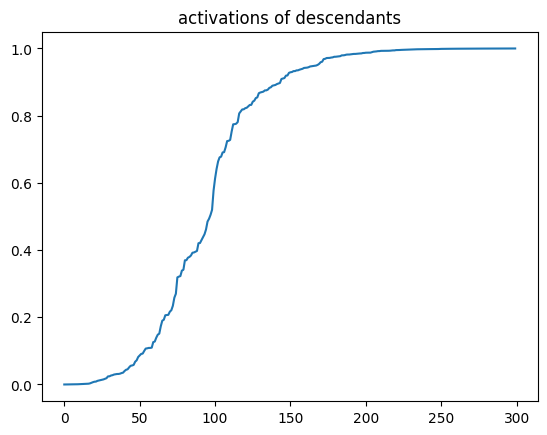

In [30]:
# Proto activations on leaf descendents - plot all activations of one particular prototype from one node, consider all descendant images of that prototype

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from matplotlib import pyplot as plt

topk = None

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_


for node in root.nodes_with_children():
    
    if node.name != '004+086':
        continue
        
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            pfs, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            pfs = pfs[node.name].squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], pooled[p].item())
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], pooled[p].item())

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    activations = []
    activations_not_desc = []
    p = 17
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        if p in class_and_prototypes[child_classname]:
            for leaf_descendent in proto_mean_activations[p]:
                activations += [round(_, 4) for _ in proto_mean_activations[p][leaf_descendent]]
    activations = sorted(activations)
    plt.plot(activations)
    plt.title('activations of descendants')
    plt.show()
                
#         for p in class_and_prototypes[child_classname]:
#             logstr = '\t'*2 + f'Proto:{p} '
#             if p != 17:
#                 continue
#             activations = []
#             for leaf_descendent in proto_mean_activations[p]:
#                 mean_activation = round(np.mean(proto_mean_activations[p][leaf_descendent]), 4)
#                 activations += [round(_, 4) for _ in proto_mean_activations[p][leaf_descendent]]
#                 num_images = len(proto_mean_activations[p][leaf_descendent])
#                 logstr += f'{leaf_descendent}:({mean_activation}) '
#             print(logstr)

        


0.9853
values above 66% 103


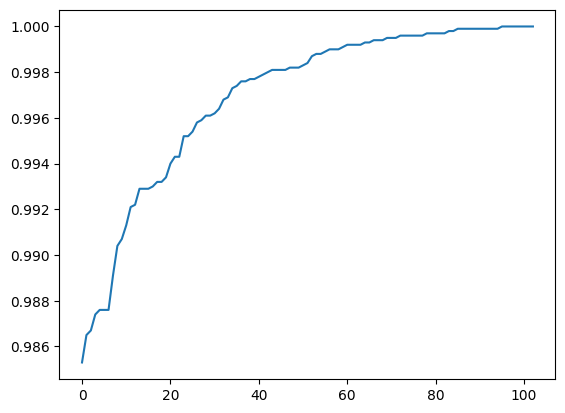

In [31]:
percentile = 66
closest_val = np.percentile(activations, percentile, method='closest_observation')
print(closest_val)
idx_closest_val = np.where(np.array(activations, np.float64) == closest_val)[0][0]
print(f'values above {percentile}%', len(activations) - idx_closest_val)
# print(idx_closest_val)
plt.plot(activations[idx_closest_val:])


In [32]:
# Proto activations on leaf descendents - relevant weights of each prototype

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb

topk = 10

def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_


for node in root.nodes_with_children():
    if node.name == 'root':
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))
    
    # maps proto_number -> classification weights
    proto_classification_weights = {}

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        if coarse_label2name[ys.item()] not in non_leaf_children_names:
            continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            pfs, pooled, _ = net(xs, inference=False)
            pooled = pooled[node.name].squeeze(0) 
            pfs = pfs[node.name].squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                proto_classification_weights[p] = classification_weights[:,p]
                
                if len(relevant_proto_class_names) == 0:
                    continue
                
                if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
                    continue
                
                if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                    child_node = root.get_node(coarse_label2name[ys.item()])
                    leaf_descendent = label2name[orig_y.item()][4:7]
                    if topk and (len(proto_mean_activations[p][leaf_descendent]) > topk):
                        heapq.heappushpop(proto_mean_activations[p][leaf_descendent], pooled[p].item())
                    else:
                        heapq.heappush(proto_mean_activations[p][leaf_descendent], pooled[p].item())

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    
    print('Node', node.name)
    for child_classname in class_and_prototypes:
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            logstr = '\t'*2 + f'Proto:{p} '
            logstr += str(proto_classification_weights[p])
#             for leaf_descendent in proto_mean_activations[p]:
#                 mean_activation = round(np.mean(proto_mean_activations[p][leaf_descendent]), 4)
#                 num_images = len(proto_mean_activations[p][leaf_descendent])
#                 logstr += f'{leaf_descendent}:({mean_activation}) '
            print(logstr)


Node 052+053
	 Child: 053+050
		Proto:3 tensor([0.0000, 2.7507], device='cuda:0', requires_grad=True)
		Proto:4 tensor([0.0000, 2.0495], device='cuda:0', requires_grad=True)
		Proto:9 tensor([0.0000, 2.8243], device='cuda:0', requires_grad=True)
		Proto:13 tensor([0.0000, 1.7485], device='cuda:0', requires_grad=True)
		Proto:16 tensor([0.0000, 3.2713], device='cuda:0', requires_grad=True)
		Proto:17 tensor([0.0000, 1.2852], device='cuda:0', requires_grad=True)
		Proto:19 tensor([0.0000, 4.1273], device='cuda:0', requires_grad=True)


Node 004+086
	 Child: 086+045
		Proto:1 tensor([0.0000, 4.3319], device='cuda:0', requires_grad=True)
		Proto:18 tensor([0.0000, 2.5111], device='cuda:0', requires_grad=True)
		Proto:11 tensor([0.0000, 3.2857], device='cuda:0', requires_grad=True)
		Proto:17 tensor([0.0000, 4.8782], device='cuda:0', requires_grad=True)
	 Child: 004+032
		Proto:3 tensor([3.1388, 0.0000], device='cuda:0', requires_grad=True)
		Proto:6 tensor([0.0577, 0.0000], device='cuda:0', requires_grad=True)
		Proto:8 tensor([0.2559, 0.0000], device='cuda:0', requires_grad=True)
		Proto:9 tensor([3.9704, 0.0000], device='cuda:0', requires_grad=True)
		Proto:14 tensor([2.7296, 0.0000], device='cuda:0', requires_grad=True)


Node 053+050
	 Child: 050+051
		Proto:0 tensor([0.0000, 2.3671], device='cuda:0', requires_grad=True)
		Proto:3 tensor([0.0000, 3.1122], device='cuda:0', requires_grad=True)
		Proto:6 tensor([0.0000, 3.3047], device='cuda:0', requires_grad=True)
		Proto:16 tensor([0.0000, 2.3511], device='cuda:0', requires_grad=True)
		Proto:18 tensor([0.0000, 0.1159], device='cuda:0', requires_grad=True)
		Proto:19 tensor([0.0000, 3.7443], device='cuda:0', requires_grad=True)


Node 004+032
	 Child: 032+033
		Proto:0 tensor([0.0000, 1.0593], device='cuda:0', requires_grad=True)
		Proto:2 tensor([0.0000, 0.7110], device='cuda:0', requires_grad=True)
		Proto:4 tensor([0.0000, 3.3837], device='cuda:0', requires_grad=True)
		Proto:6 tensor([0.0000, 3.5011], device='cuda:0', requires_grad=True)
		Proto:8 tensor([0.0000, 1.4647], device='cuda:0', requires_grad=True)
		Proto:12 tensor([0.0000, 2.8666], device='cuda:0', requires_grad=True)
		Proto:18 tensor([0.0000, 2.7044], device='cuda:0', requires_grad=True)
		Proto:19 tensor([0.0000, 3.4991], device='cuda:0', requires_grad=True)


Node 086+045
	 Child: 045+101
		Proto:1 tensor([0.0000, 2.3559], device='cuda:0', requires_grad=True)
		Proto:3 tensor([0.0000, 2.6002], device='cuda:0', requires_grad=True)
		Proto:5 tensor([0.0000, 3.9472], device='cuda:0', requires_grad=True)
		Proto:7 tensor([0.0000, 1.0077], device='cuda:0', requires_grad=True)
		Proto:8 tensor([0.0000, 3.2147], device='cuda:0', requires_grad=True)
		Proto:10 tensor([0.0000, 3.7773], device='cuda:0', requires_grad=True)
		Proto:12 tensor([0.0000, 2.1987], device='cuda:0', requires_grad=True)
		Proto:13 tensor([0.0000, 3.0346], device='cuda:0', requires_grad=True)
		Proto:14 tensor([0.0000, 3.2442], device='cuda:0', requires_grad=True)
		Proto:15 tensor([0.0000, 3.1790], device='cuda:0', requires_grad=True)
		Proto:16 tensor([0.0000, 2.2836], device='cuda:0', requires_grad=True)
		Proto:18 tensor([0.0000, 2.4896], device='cuda:0', requires_grad=True)
		Proto:19 tensor([0.0000, 2.7937], device='cuda:0', requires_grad=True)


Node 032+033
	 Child: 033+031
		Proto:0 tensor([0.0000, 3.0051], device='cuda:0', requires_grad=True)
		Proto:1 tensor([0.0000, 1.2554], device='cuda:0', requires_grad=True)
		Proto:3 tensor([0.0000, 3.8950], device='cuda:0', requires_grad=True)
		Proto:19 tensor([0.0000, 2.1860], device='cuda:0', requires_grad=True)


Node 045+101
	 Child: 101+023
		Proto:1 tensor([0.0000, 3.1944], device='cuda:0', requires_grad=True)
		Proto:2 tensor([0.0000, 2.2051], device='cuda:0', requires_grad=True)
		Proto:6 tensor([0.0000, 3.7047], device='cuda:0', requires_grad=True)
		Proto:7 tensor([0.0000, 0.1995], device='cuda:0', requires_grad=True)
		Proto:8 tensor([0.0000, 3.2273], device='cuda:0', requires_grad=True)
		Proto:19 tensor([0.0000, 1.4763], device='cuda:0', requires_grad=True)
	 Child: 045+003
		Proto:5 tensor([3.2268, 0.0000], device='cuda:0', requires_grad=True)
		Proto:9 tensor([2.2783, 0.0000], device='cuda:0', requires_grad=True)
		Proto:10 tensor([2.4777, 0.0000], device='cuda:0', requires_grad=True)
		Proto:13 tensor([3.1175, 0.0000], device='cuda:0', requires_grad=True)
		Proto:16 tensor([1.4063, 0.0000], device='cuda:0', requires_grad=True)


Node 045+003
	 Child: 003+002
		Proto:1 tensor([0.0000, 1.6834], device='cuda:0', requires_grad=True)
		Proto:2 tensor([0.0000, 1.8176], device='cuda:0', requires_grad=True)
		Proto:6 tensor([0.0000, 0.5305], device='cuda:0', requires_grad=True)
		Proto:7 tensor([0.0000, 0.1318], device='cuda:0', requires_grad=True)
		Proto:9 tensor([0.0000, 2.0412], device='cuda:0', requires_grad=True)
		Proto:11 tensor([0.0000, 2.0561], device='cuda:0', requires_grad=True)
		Proto:13 tensor([0.0000, 2.5633], device='cuda:0', requires_grad=True)
		Proto:17 tensor([0.0000, 4.3478], device='cuda:0', requires_grad=True)
		Proto:18 tensor([0.0000, 2.5620], device='cuda:0', requires_grad=True)


Node 101+023
	 Child: 023+025
		Proto:4 tensor([0.0000, 2.0026], device='cuda:0', requires_grad=True)
		Proto:9 tensor([0.0000, 1.5009], device='cuda:0', requires_grad=True)
		Proto:10 tensor([0.0000, 1.4211], device='cuda:0', requires_grad=True)
		Proto:11 tensor([0.0000, 2.6654], device='cuda:0', requires_grad=True)
		Proto:12 tensor([0.0000, 0.1736], device='cuda:0', requires_grad=True)
		Proto:13 tensor([0.0000, 2.9452], device='cuda:0', requires_grad=True)
		Proto:18 tensor([0.0000, 3.3243], device='cuda:0', requires_grad=True)
	 Child: 101+100
		Proto:15 tensor([2.0474, 0.0000], device='cuda:0', requires_grad=True)
		Proto:5 tensor([1.4804, 0.0000], device='cuda:0', requires_grad=True)
		Proto:6 tensor([3.6834, 0.0000], device='cuda:0', requires_grad=True)
		Proto:7 tensor([3.7679, 0.0000], device='cuda:0', requires_grad=True)


Node 003+002
	 Child: 002+001
		Proto:0 tensor([0.0000, 3.2075], device='cuda:0', requires_grad=True)
		Proto:9 tensor([0.0000, 0.2022], device='cuda:0', requires_grad=True)
		Proto:12 tensor([0.0000, 3.6557], device='cuda:0', requires_grad=True)
		Proto:13 tensor([0.0000, 3.5591], device='cuda:0', requires_grad=True)
		Proto:17 tensor([0.0000, 2.4840], device='cuda:0', requires_grad=True)


Node 023+025
	 Child: 025+024
		Proto:0 tensor([0.0000, 0.8786], device='cuda:0', requires_grad=True)
		Proto:6 tensor([0.0000, 0.5805], device='cuda:0', requires_grad=True)
		Proto:7 tensor([0.0000, 2.4203], device='cuda:0', requires_grad=True)
		Proto:9 tensor([0.0000, 2.9682], device='cuda:0', requires_grad=True)
		Proto:10 tensor([0.0000, 1.6679], device='cuda:0', requires_grad=True)
		Proto:11 tensor([0.0000, 1.7539], device='cuda:0', requires_grad=True)
		Proto:14 tensor([0.0000, 2.6830], device='cuda:0', requires_grad=True)


In [12]:
17 in class_and_prototypes['086+045']

True